# Data Analysis

## Table of Contents
- Load Data
- [Loans] Sample Description
- [User Purchasing Behavior] Sample Description
- [User Repayment Behavior] Sample Description
- Segment Purchasing Behavior
- Segment Repayment Behavior
- Segment Loan Eligibility

In [3]:
from copy import deepcopy
import numpy as np
import pandas as pd

# visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# plotly config
import plotly.io as pio
pio.renderers.default = "browser"

template = "plotly_white"
colors = {
    "red": "rgb(255,0,0)",
    "dark_blue": "rgb(30,144,255)",
    "medium_blue": "rgb(0,191,255)",
    "light_blue": "rgb(135,206,250)",
    "dark_purple": "rgb(202, 105, 157)",
    "medium_purple": "rgb(221, 136, 172)",
    "light_purple": "rgb(234, 169, 189)",
    "dark_gray": "rgb(169,169,169)",
    "medium_gray": "rgb(192,192,192)",
    "light_gray": "rgb(211,211,211)",
    "dark_green": "rgb(3,115,140)",
    "medium_green": "rgb(63,168,191)",
    "light_green": "rgb(150,210,217)"
}
title_font_size = 22
font_size = 18

# Load Data

In [6]:
df_loans = pd.read_pickle("../data/processed/df_loans.pkl")

df_loans

id  user_id  amount  total_amount  due_amount   due_date  \
3        3     2585  6000.0       6045.28     6459.00 2022-05-02   
5        5      806  6000.0       6045.28     6459.00 2022-05-02   
6        6     1920  6000.0       6045.28     6459.00 2022-05-02   
13      13     2323  6000.0       6045.28     6459.00 2022-05-02   
14      14     1838  6000.0       6045.28     6459.00 2022-05-02   
...    ...      ...     ...           ...         ...        ...   
5042  6740     1315  6000.0       6045.28     7749.16 2023-01-01   
5043  6741     2130  2500.0       2518.87     3228.82 2023-01-01   
5044  6742      549  6000.0       6045.28     7749.16 2023-01-01   
5045  6743     1414  6000.0       6045.28     7749.16 2023-01-01   
5046  6745      898  6000.0       6045.28     8208.84 2023-01-01   

               status created_at status_cleaned  loan_term  ...  rate_default  \
3     debt_collection 2022-02-01           debt         90  ...      0.000000   
5         debt_repaid 2022-02-01           debt         90  ...      1.000000   
6     debt_collection 2022-02-01           debt         90  ...      0.000000   
13        debt_repaid 2022-02-01           debt         90  ...      0.000000   
14    debt_collection 2022-02-01           debt         90  ...      0.000000   
...               ...        ...            ...        ...  ...           ...   
5042           repaid 2022-10-03         repaid         90  ...      0.025641   
5043           repaid 2022-10-03         repaid         90  ...      0.062500   
5044           repaid 2022-10-03         repaid         90  ...      0.000000   
5045           repaid 2022-10-03         repaid         90  ...      0.047619   
5046           repaid 2022-10-03         repaid         90  ...      0.017857   

     num_repayments  avg_repayment_amount avg_lag_repayment  \
3                 5                  32.0              10.0   
5                 1                 403.0               6.0   
6                 2                  80.0               5.0   
13               44                  27.0               3.0   
14                1                1350.0               1.0   
...             ...                   ...               ...   
5042             39                 184.0               3.0   
5043             16                 186.0               2.0   
5044              5                1291.0               6.0   
5045             21                 383.0               2.0   
5046             56                 126.0               2.0   

      due_date_exceeded  max_repayment_delay  pct_repaid  pct_debt  \
3                     0                    0    0.026798  0.973202   
5                     0                    0    0.000000  1.000000   
6                     0                    0    0.026302  0.973698   
13                    1                   14    0.197911  0.802089   
14                    0                    0    0.223340  0.776660   
...                 ...                  ...         ...       ...   
5042                  0                    0    1.000000  0.000000   
5043                  0                    0    1.000000  0.000000   
5044                  0                    0    1.000000  0.000000   
5045                  0                    0    1.000000  0.000000   
5046                  0                    0    1.000000  0.000000   

      rate_manual_repayments  loan_quality  
3                   0.166667   low_quality  
5                   2.000000   low_quality  
6                   0.333333   low_quality  
13                  0.022222   low_quality  
14                  0.500000   low_quality  
...                      ...           ...  
5042                0.051282  high_quality  
5043                0.200000  high_quality  
5044                0.750000  high_quality  
5045                0.045455  high_quality  
5046                0.035714  high_quality  

[6588 rows x 24 columns]

In [7]:
df_user_repayments = pd.read_pickle("../data/processed/df_user_repayment_history.pkl")

df_user_repayments

id  user_id created_at  user_num_loans  user_pct_loans_small  \
81      86        1 2022-02-02               1                   0.0   
211    223        2 2022-02-04               1                   0.0   
1677  1744        3 2022-04-18               1                   0.0   
3880  3984        4 2022-06-20               1                   0.0   
5683  5824        4 2022-08-26               2                   0.0   
...    ...      ...        ...             ...                   ...   
1136  1186     3153 2022-03-15               2                   0.0   
3017  3111     3153 2022-05-04               3                   0.0   
3752  3856     3153 2022-06-15               4                   0.0   
4247  4358     3153 2022-07-04               5                   0.0   
5432  5568     3153 2022-08-20               6                   0.0   

      user_pct_loans_medium  user_pct_loans_large  user_pct_int_rate_small  \
81                      0.0                   1.0                     1.00   
211                     0.0                   1.0                     1.00   
1677                    0.0                   1.0                     1.00   
3880                    0.0                   1.0                     1.00   
5683                    0.0                   1.0                     0.50   
...                     ...                   ...                      ...   
1136                    0.0                   1.0                     1.00   
3017                    0.0                   1.0                     1.00   
3752                    0.0                   1.0                     1.00   
4247                    0.0                   1.0                     1.00   
5432                    0.0                   1.0                     0.83   

      user_pct_int_rate_medium  user_pct_int_rate_large  \
81                         0.0                     0.00   
211                        0.0                     0.00   
1677                       0.0                     0.00   
3880                       0.0                     0.00   
5683                       0.0                     0.50   
...                        ...                      ...   
1136                       0.0                     0.00   
3017                       0.0                     0.00   
3752                       0.0                     0.00   
4247                       0.0                     0.00   
5432                       0.0                     0.17   

      user_ratio_unpaid_loans  user_avg_pct_debt  user_avg_num_repayments  \
81                        1.0               0.99                      1.0   
211                       1.0               0.79                      2.0   
1677                      0.0               0.00                     19.0   
3880                      0.0               0.00                     26.0   
5683                      0.0               0.00                     19.0   
...                       ...                ...                      ...   
1136                      0.0               0.00                     25.0   
3017                      0.0               0.00                     21.0   
3752                      0.0               0.00                     19.0   
4247                      0.0               0.00                     19.0   
5432                      0.0               0.00                     20.0   

      user_avg_repayment_amount  user_avg_lag_repayment  \
81                    39.000000                     1.0   
211                  647.000000                     3.0   
1677                 646.000000                     5.0   
3880                 285.000000                     3.0   
5683                 427.000000                     3.0   
...                         ...                     ...   
1136                 270.000000                     7.0   
3017                 360.333333                     5.0   
3752                 404.500000          

In [8]:
df_user_transactions = pd.read_pickle("../data/processed/df_user_purchasing_behavior.pkl")

df_user_transactions

user_id  recency  frequency   monetary  avg_spending  avg_intallments  \
0           1      346         10   25154.18   2515.418000         4.500000   
1           2      340         35   66491.00   1899.742857         8.257143   
2           3      191         78  117555.00   1507.115385         5.551282   
3           4       15        286  423169.31   1479.612972         2.646853   
4           5       54        793  440568.44    555.571803         1.952081   
...       ...      ...        ...        ...           ...              ...   
3038     3149      216        231   96516.80    417.821645         1.935065   
3039     3150        8        849  395379.93    465.700742         1.618375   
3040     3151      140        227   73475.80    323.681938         2.687225   
3041     3152       39       1118  359051.73    321.155394         3.213775   
3042     3153       61        434  483916.07   1115.013986         4.815668   

      avg_lag_transaction  rate_denied preference_installment  \
0                6.111111     0.300000                    0.7   
1                1.852941     0.057143               0.971429   
2                1.740260     0.115385                    1.0   
3                0.884211     0.090909                0.41958   
4                0.334596     0.083228               0.480454   
...                   ...          ...                    ...   
3038             0.682609     0.069264               0.333333   
3039             0.459906     0.174323               0.398115   
3040             1.137168     0.092511               0.568282   
3041             0.317816     0.135063               0.952594   
3042             0.787529     0.278802               0.647465   

      preference_credit  preference_purchase_online  preference_card_brazil  \
0              5.000000                    0.000000                0.222222   
1             17.500000                    0.000000                1.117647   
2             79.000000                    0.012821                0.112676   
3              1.666667                    0.003497                0.083019   
4            131.500000                    0.000000                0.008895   
...                 ...                         ...                     ...   
3038           2.065789                    0.004329                0.094340   
3039           2.590717                    0.289833                0.119895   
3040           2.271429                    0.017857                0.085714   
3041          61.222222                    0.028493                0.072867   
3042           3.791209                    0.013986                0.098485   

     rfm_segment_desc  
0            Inactive  
1            Inactive  
2            Inactive  
3           Promising  
4           Promising  
...               ...  
3038         Inactive  
3039        Champions  
3040         Inactive  
3041        Promising  
3042        Promising  

[3043 rows x 13 columns]

# [Loans] Sample Description

In [10]:
df_loans["loan_quality"] = df_loans["loan_quality"].replace({"high_quality": "high", "low_quality": "low"})

In [11]:
df_loans["due_date_exceeded"] = df_loans["due_date_exceeded"].replace({0: "not exceeded", 1: "exceeded"})

## Quality

**Note:** 29% of loans have posed a significant risk to the lender

In [13]:
fig = go.Figure([
    go.Bar(
        y=["high"],
        x=[df_loans[df_loans['loan_quality'] == "high"].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_blue"],
    ),
    go.Bar(
        y=["low"],
        x=[df_loans[df_loans['loan_quality'] == "low"].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_purple"],
    )
])

fig.update_layout(
    title="<b>29% of loans have posed a significant risk to the lender</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="loan quality",
    xaxis_title="% of loans",
    template=template,
    showlegend=False,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate='%{x:,.0f}%',
    textposition='inside'
)

fig.show()

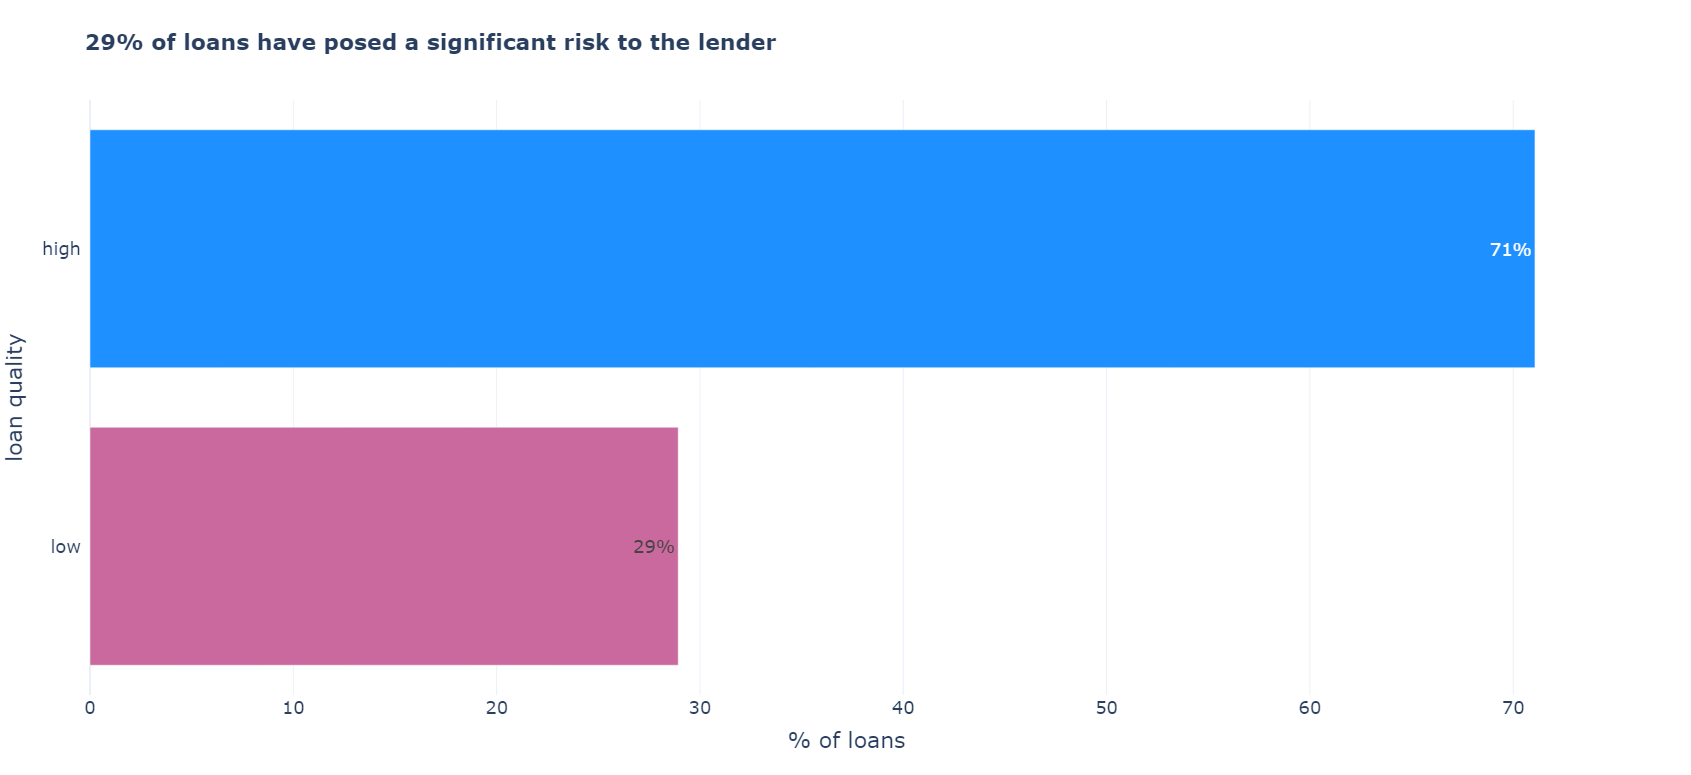

## Debt

**Note:** 
- 23% of the loans have resulted in debt
- Loans that have resulted in debt, typically have an unpaid balance ranging from 38%-87%

In [16]:
fig = go.Figure([
    go.Bar(
        y=["repaid"],
        x=[df_loans[df_loans['status_cleaned'] == "repaid"].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_blue"],
    ),
    go.Bar(
        y=["debt"],
        x=[df_loans[df_loans['status_cleaned'] == "debt"].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_purple"],
    )
])

fig.update_layout(
    title="<b>23% of the loans have resulted in debt</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="loan status",
    xaxis_title="% of loans",
    template=template,
    showlegend=False,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate='%{x:,.0f}%',
    textposition='inside'
)

fig.show()

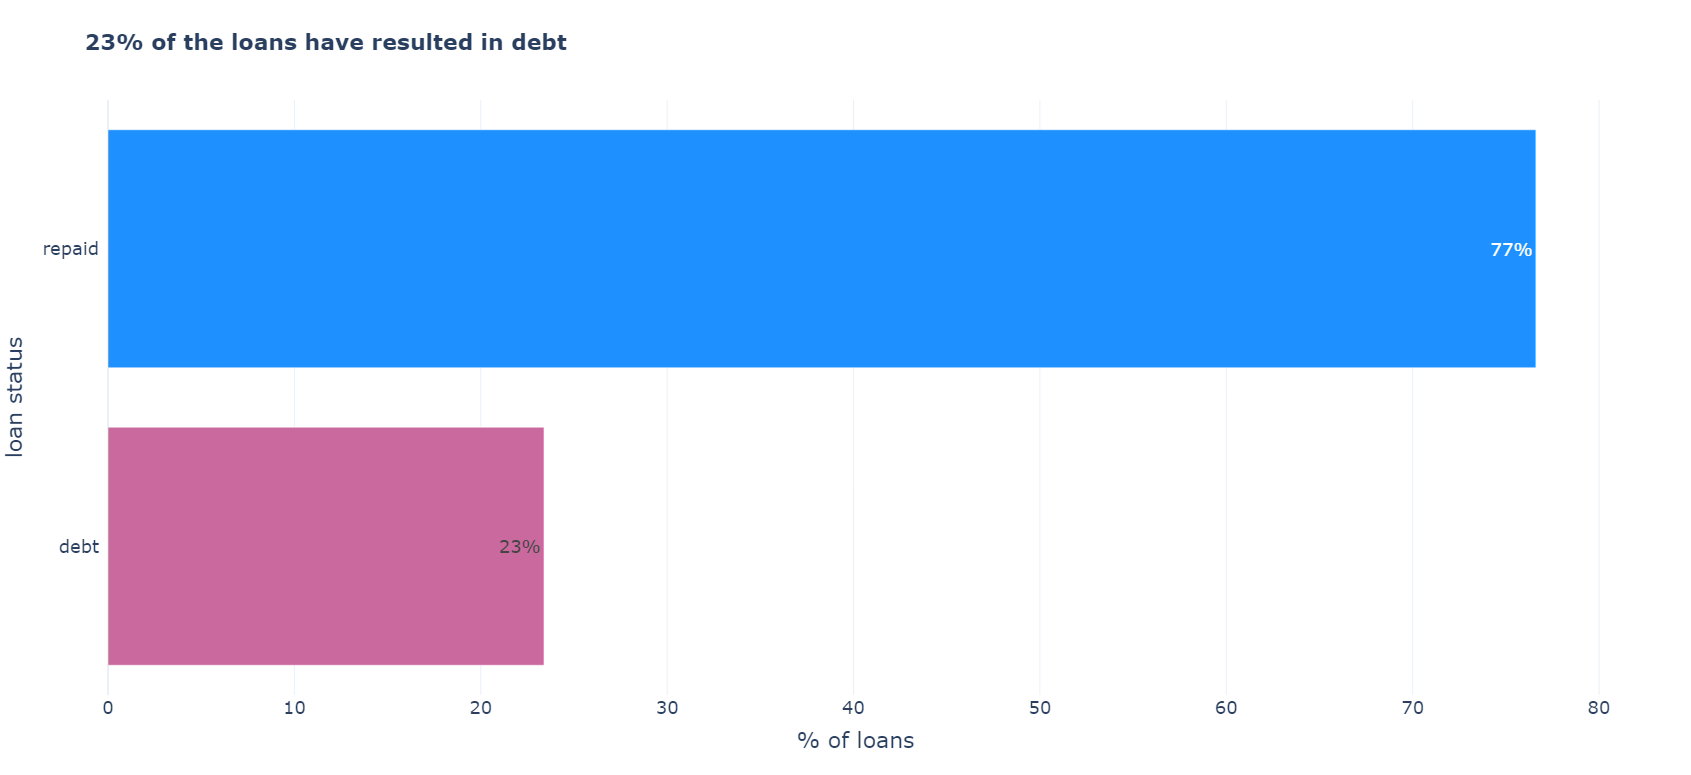

In [18]:
df_loans["pct_debt"] *= 100

fig = px.histogram(
    df_loans[df_loans["status_cleaned"] == "debt"],
    x="pct_debt",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Loans that have resulted in debt,<br>typically have an unpaid balance ranging from 38%-87%</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of debt",
    yaxis_title="% of loans",
    template=template,
)

fig.show()

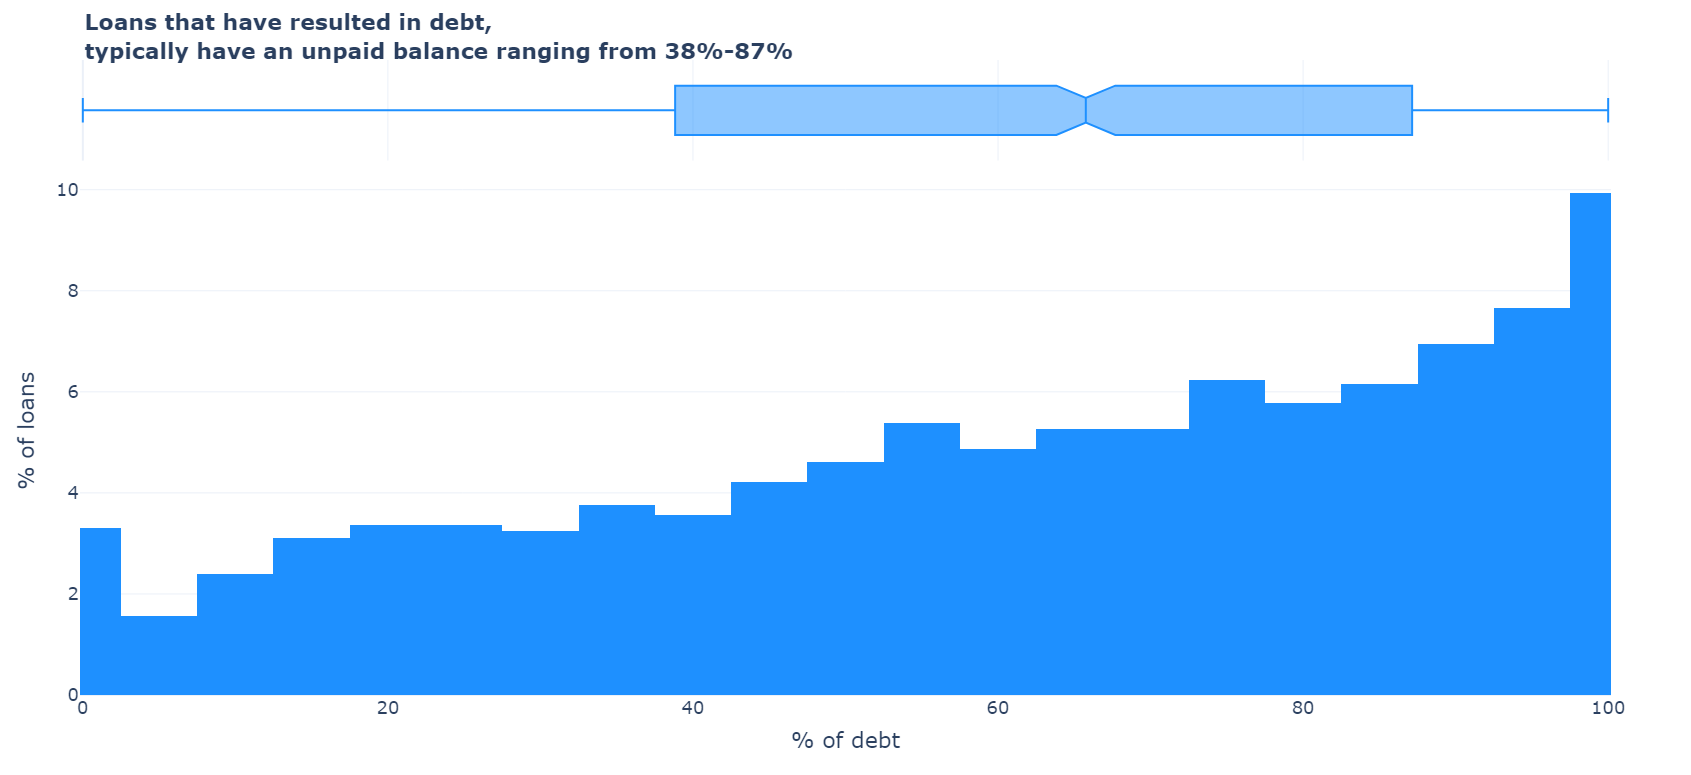

## Principal Amount

**Note:** Loans typically range from more than R$5k

In [21]:
fig = px.histogram(
    df_loans, 
    y='principal_amount_cat', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Loans typically range from more than R$5k<br><sub>small: < R&#36;3k, medium: R&#36;3k-5k, large: &#8805; R&#36;5k</sub></b>',
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="principal loan amount (R$)",
    xaxis_title="% of loans",
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=["small", "medium", "large"]
)
fig.update_traces(
    texttemplate="%{x:,.0f}%",
    textposition="inside"
)

fig.show()

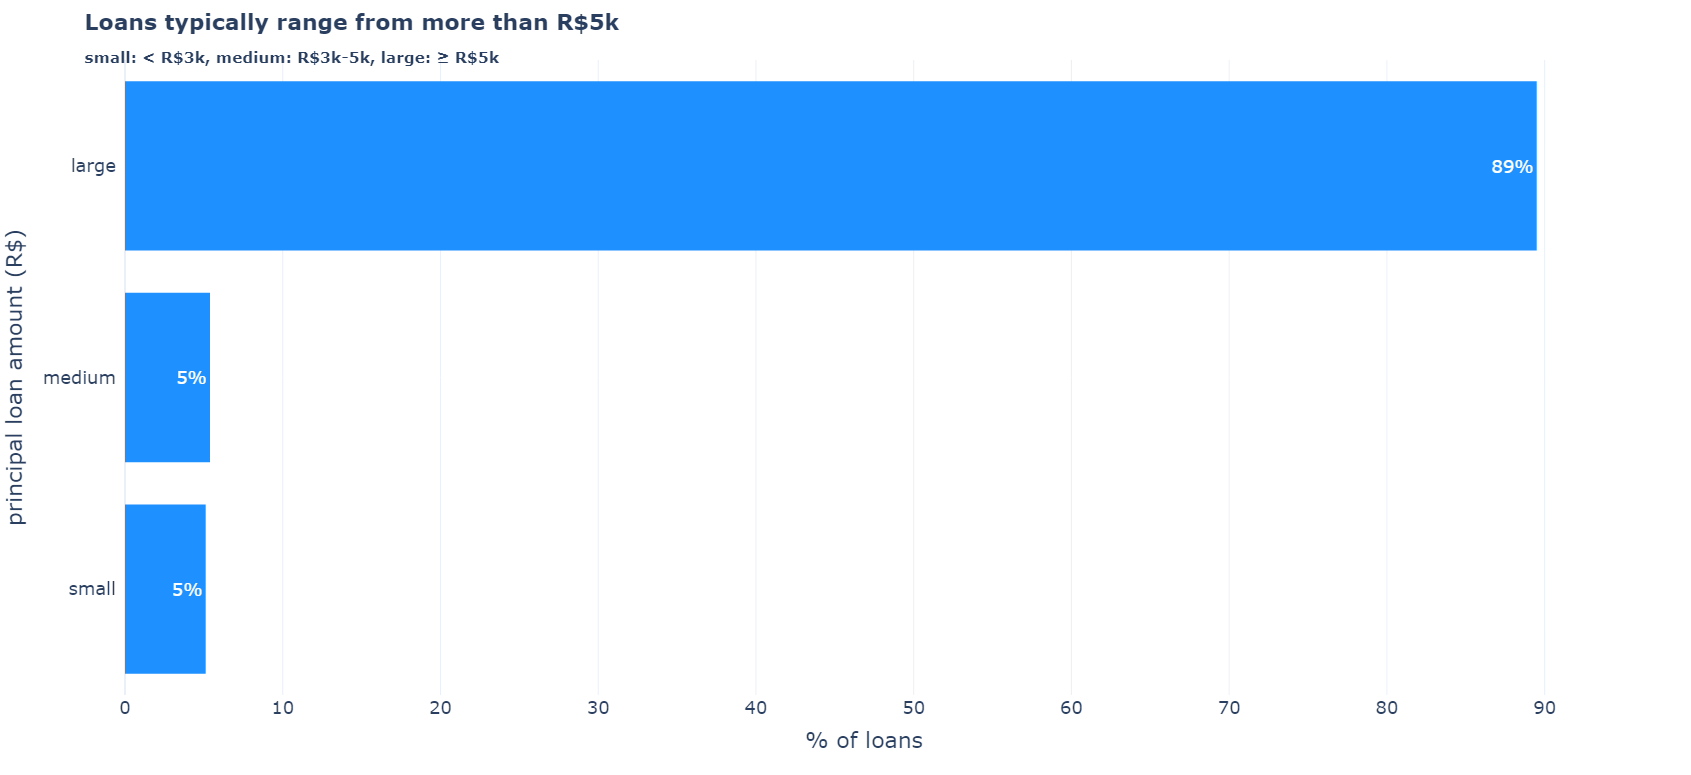

## Interest Rate

**Note:** Only 18% of the loans have high interest rates

In [24]:
fig = px.histogram(
    df_loans, 
    y='interest_rate_cat', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Only 18% of the loans have high interest rates<br><sub>small: < 40%, medium: 40-100%, large: &#8805; 100%</sub></b>',
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="loan interest rate (%)",
    xaxis_title="% of loans",
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=["small", "medium", "large"]
)
fig.update_traces(
    texttemplate="%{x:,.0f}%",
    textposition="inside"
)

fig.show()

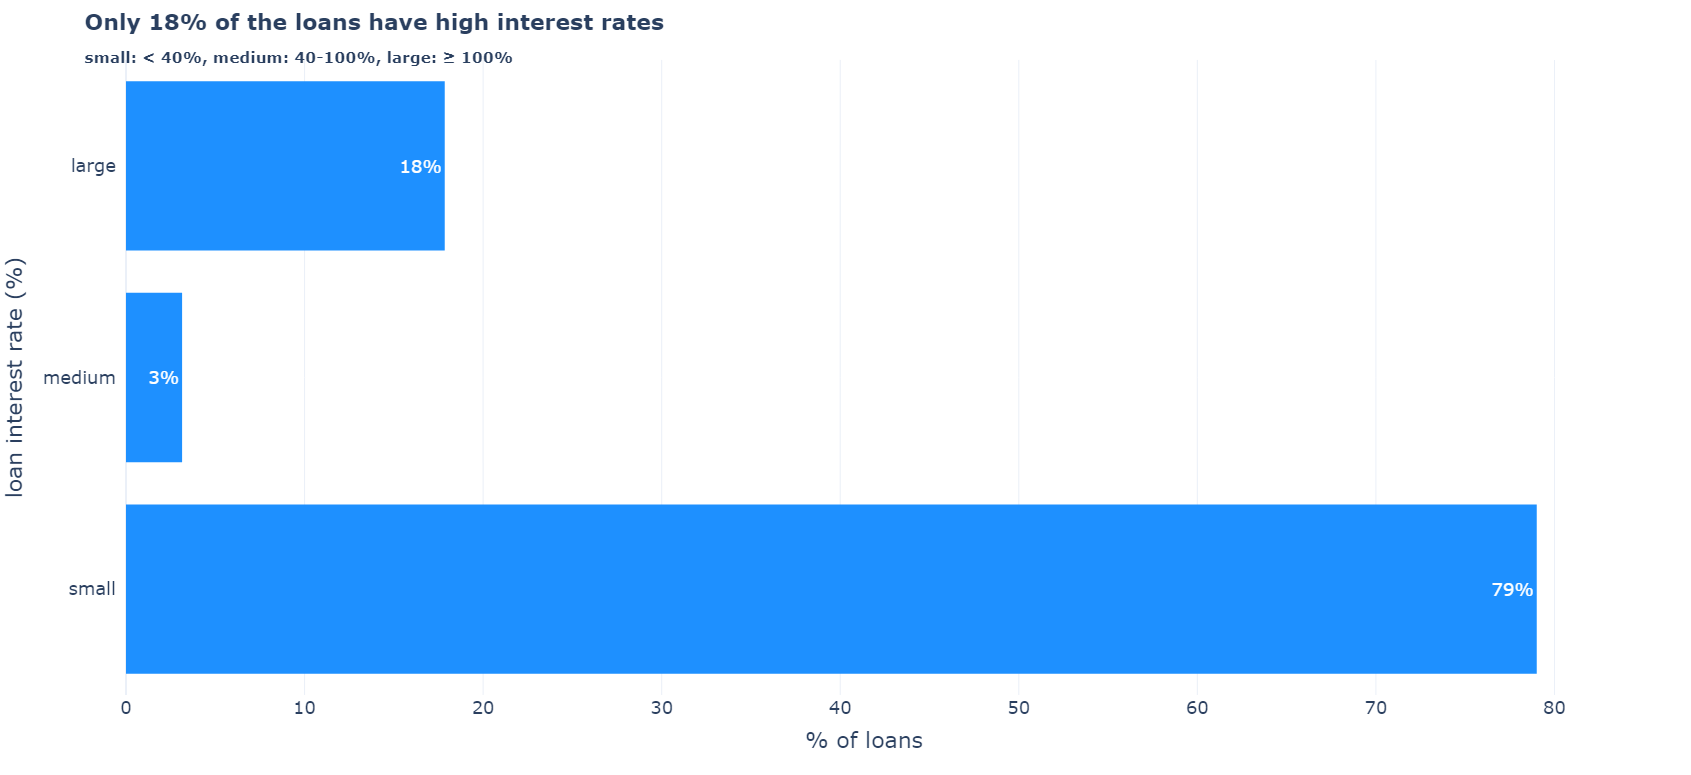

## Fees

**Note:** Virtually all loans have a fee of R$45

In [27]:
df_loans['loan_fees'].describe()

count    6588.000000
mean       42.135094
std         8.254637
min         8.000000
25%        45.000000
50%        45.000000
75%        45.000000
max        45.000000
Name: loan_fees, dtype: float64

## Term

**Note:** Virtually all loans have a repayment period of 3 months

In [29]:
df_loans['loan_term'].describe()

count    6588.000000
mean       90.068002
std         0.475215
min        90.000000
25%        90.000000
50%        90.000000
75%        90.000000
max       112.000000
Name: loan_term, dtype: float64

## Default Rate

**Note:** 
- 58% of loans have at least one defaulted repayment in their lifecycle
- Default rates for loans with defaulted repayments range from 4%-12%

In [31]:
fig = go.Figure([
    go.Bar(
        y=["don't include<br>defaulted<br>repayments"],
        x=[df_loans[df_loans['rate_default'] == 0].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_blue"],
    ),
    go.Bar(
        y=["include<br>defaulted<br>repayments"],
        x=[df_loans[df_loans['rate_default'] > 0].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_purple"],
    )
])

fig.update_layout(
    title="<b>58% of loans have at least one defaulted repayment in their lifecycle</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title=None,
    xaxis_title="% of loans",
    template=template,
    showlegend=False,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate='%{x:,.0f}%',
    textposition='inside'
)

fig.show()

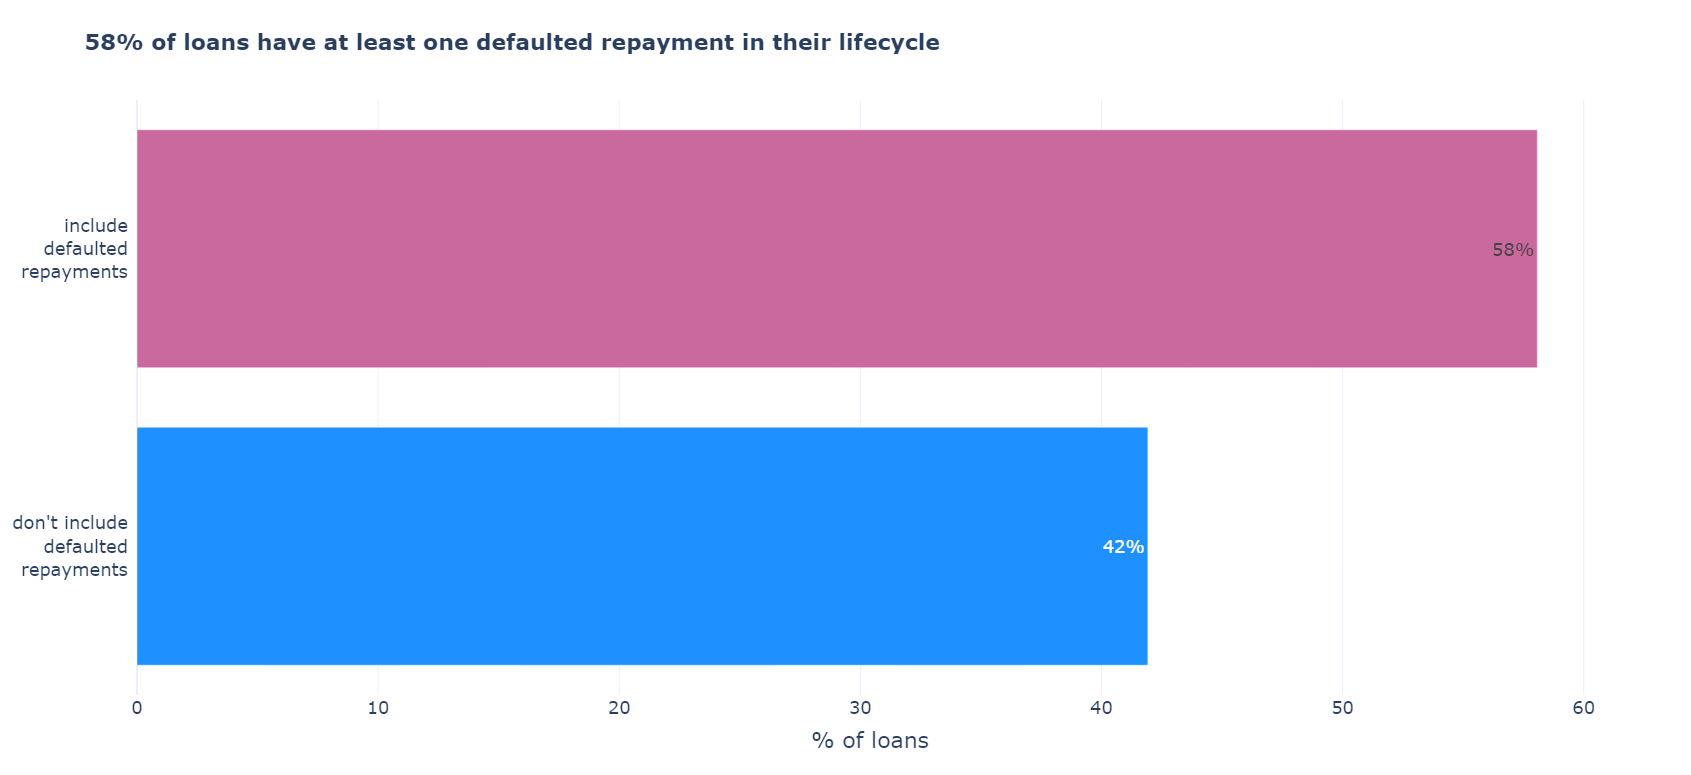

In [33]:
df_loans["rate_default"] *= 100

fig = px.histogram(
    df_loans[df_loans['rate_default'] > 0],
    x="rate_default",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Default rates for loans with defaulted repayments range from 4%-12%</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="default rate (%)",
    yaxis_title="% of loans",
    template=template,
)

fig.show()

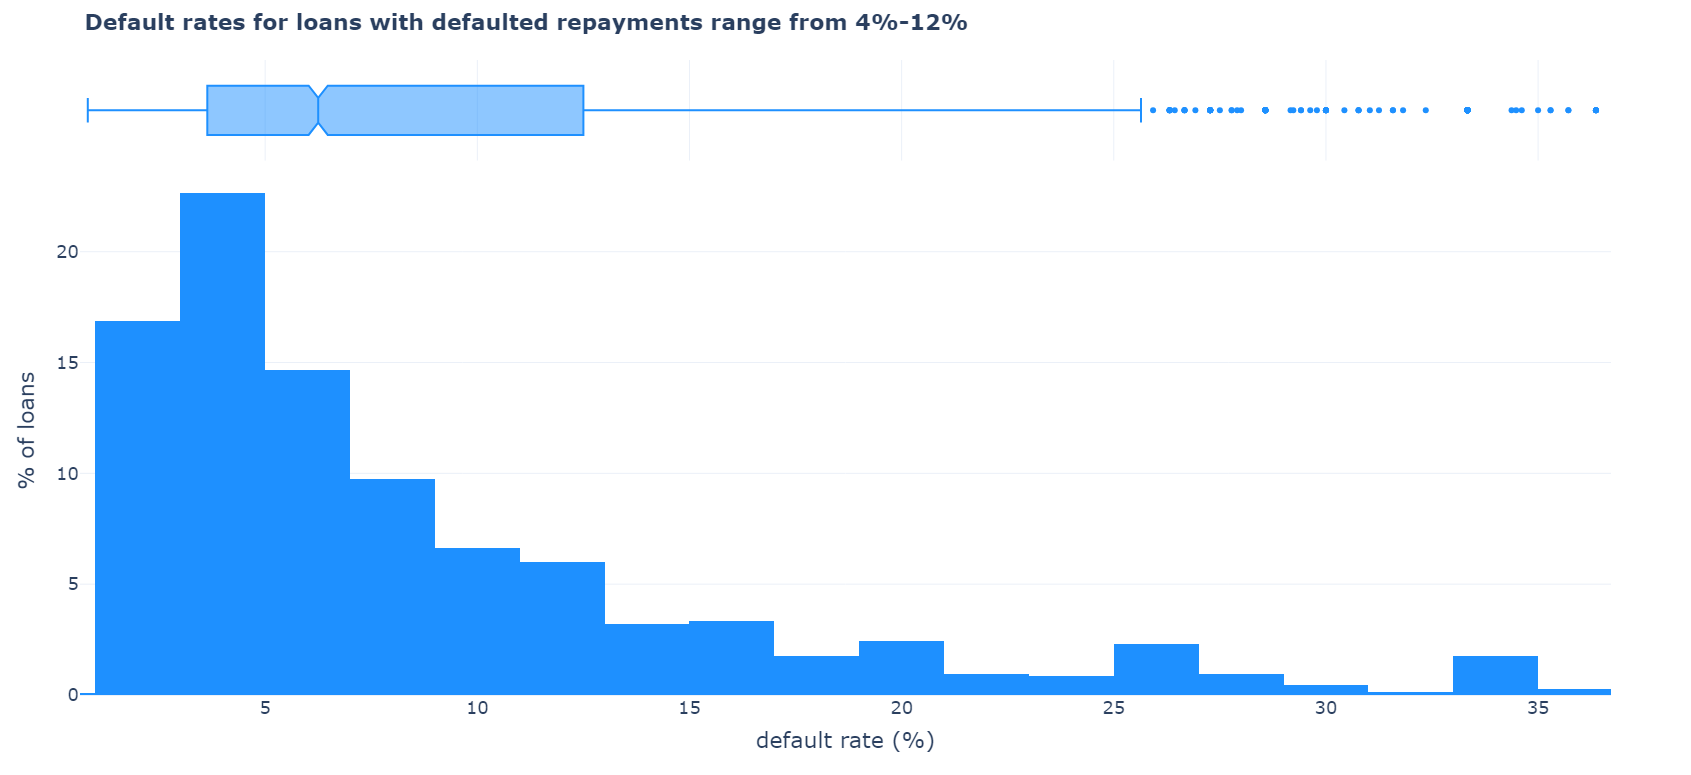

## Number of Repayments

**Note:** Loans are typically repaid in 10-40 repayments

In [36]:
fig = px.histogram(
    df_loans,
    x="num_repayments",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Loans are typically repaid in 10-40 repayments</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="number of repayments",
    yaxis_title="% of loans",
    template=template,
)

fig.show()

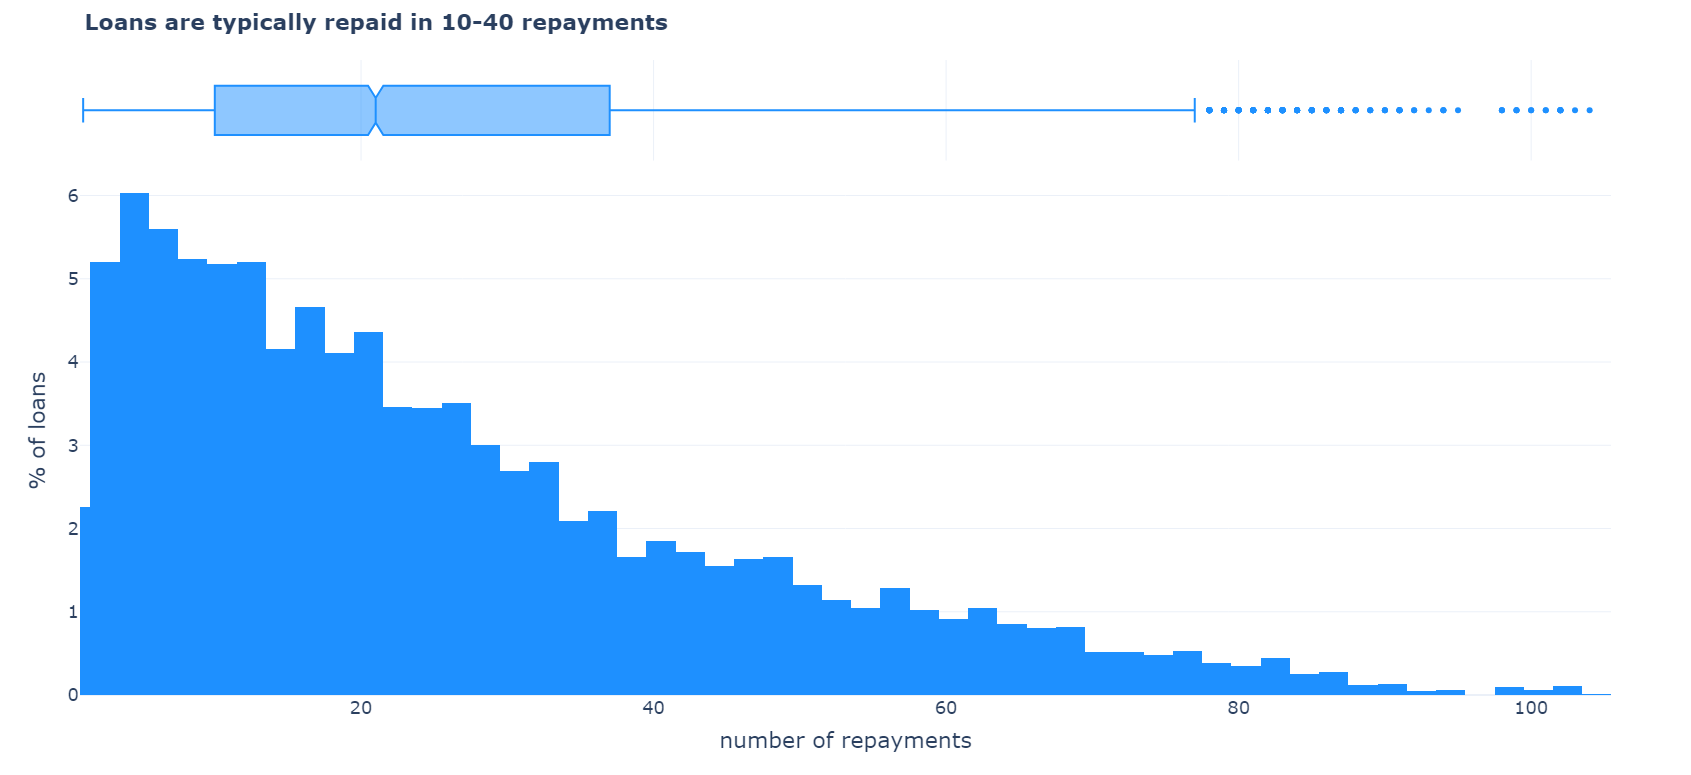

## Average Repayment Amount

**Note:** Average repayment amounts typically fall between R$140-500

In [39]:
fig = px.histogram(
    df_loans,
    x="avg_repayment_amount",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Average repayment amounts typically fall between R$140-500</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. repayment amount (R$)",
    yaxis_title="% of loans",
    template=template,
)

fig.show()

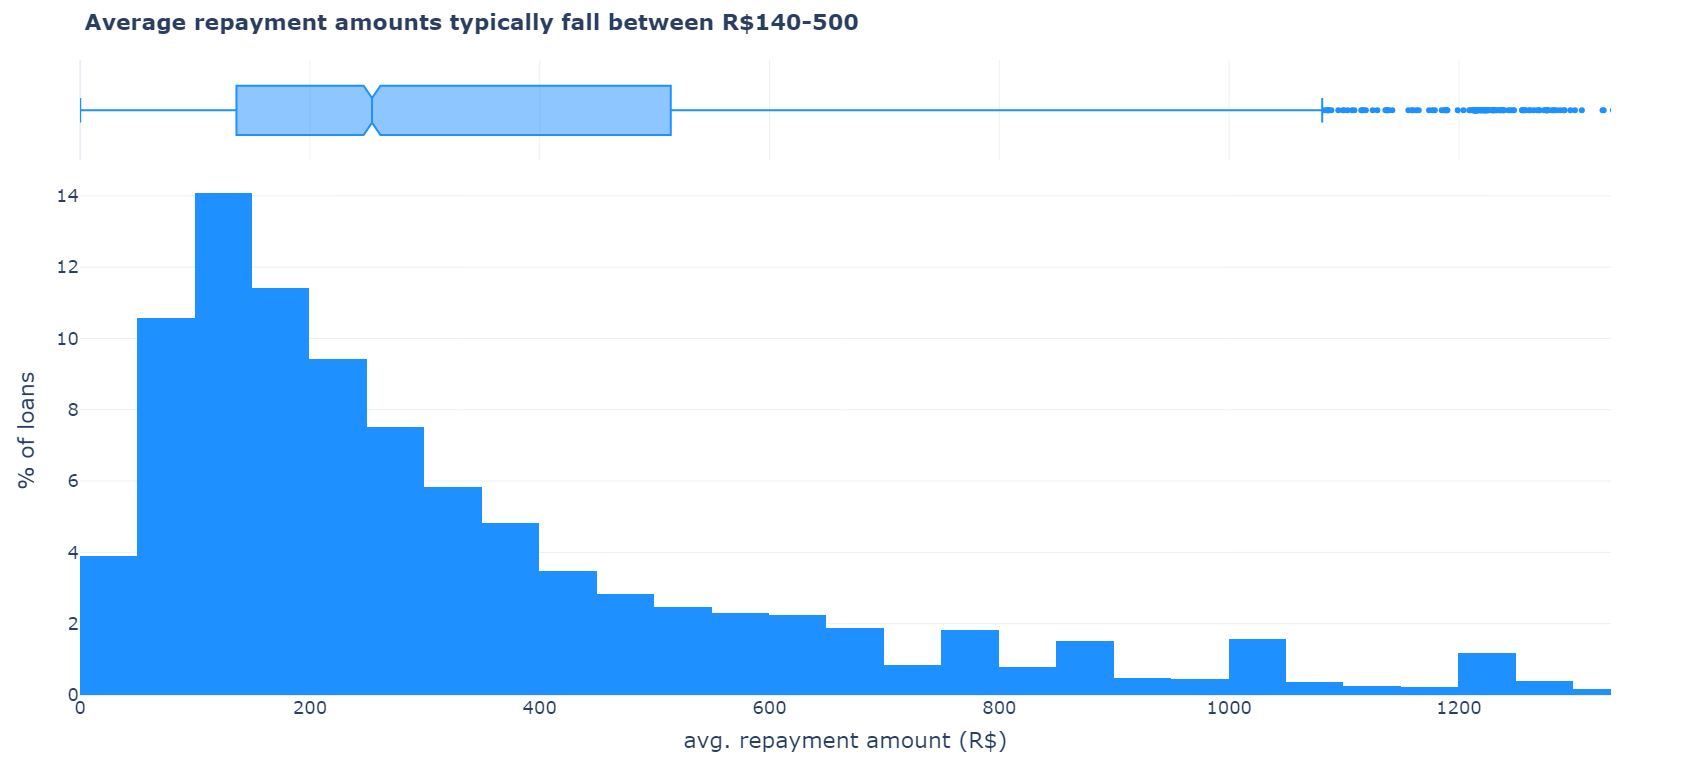

## Loan Repayment Lag

**Note:** On average, repayments happen every 2-5 days

In [42]:
df_loans['avg_lag_repayment'].describe()

count    6588.000000
mean        4.406497
std         7.118586
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max       241.000000
Name: avg_lag_repayment, dtype: float64

## Loan Overdue

**Note:** 
- 19% of the loans have exceeded the due date
- On average, the maximum repayment delay is about a week

In [44]:
fig = go.Figure([
    go.Bar(
        y=["not<br>exceeded"],
        x=[df_loans[df_loans['due_date_exceeded'] == "not exceeded"].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_blue"],
    ),
    go.Bar(
        y=["exceeded"],
        x=[df_loans[df_loans['due_date_exceeded'] == "exceeded"].shape[0]/df_loans.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_purple"],
    )
])

fig.update_layout(
    title="<b>19% of the loans have exceeded the due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="due date exceeded",
    xaxis_title="% of loans",
    template=template,
    showlegend=False,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate='%{x:,.0f}%',
    textposition='inside'
)

fig.show()

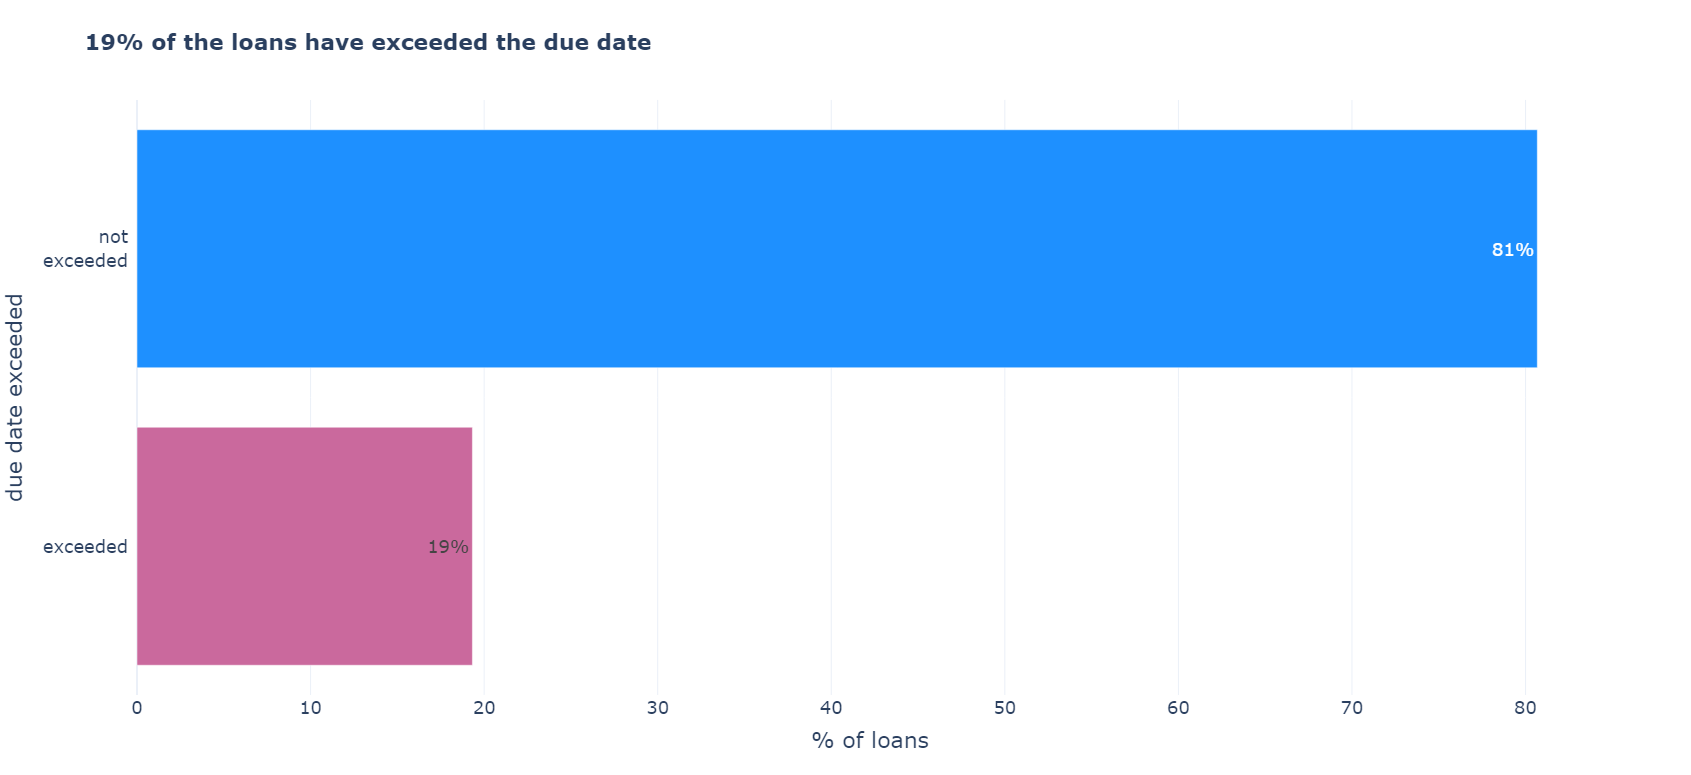

In [46]:
fig = px.histogram(
    df_loans[df_loans['due_date_exceeded'] == "exceeded"],
    x="max_repayment_delay",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>On average, the maximum repayment delay is about a week</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="max repayment delay (days)",
    yaxis_title="% of loans",
    template=template,
)

fig.show()

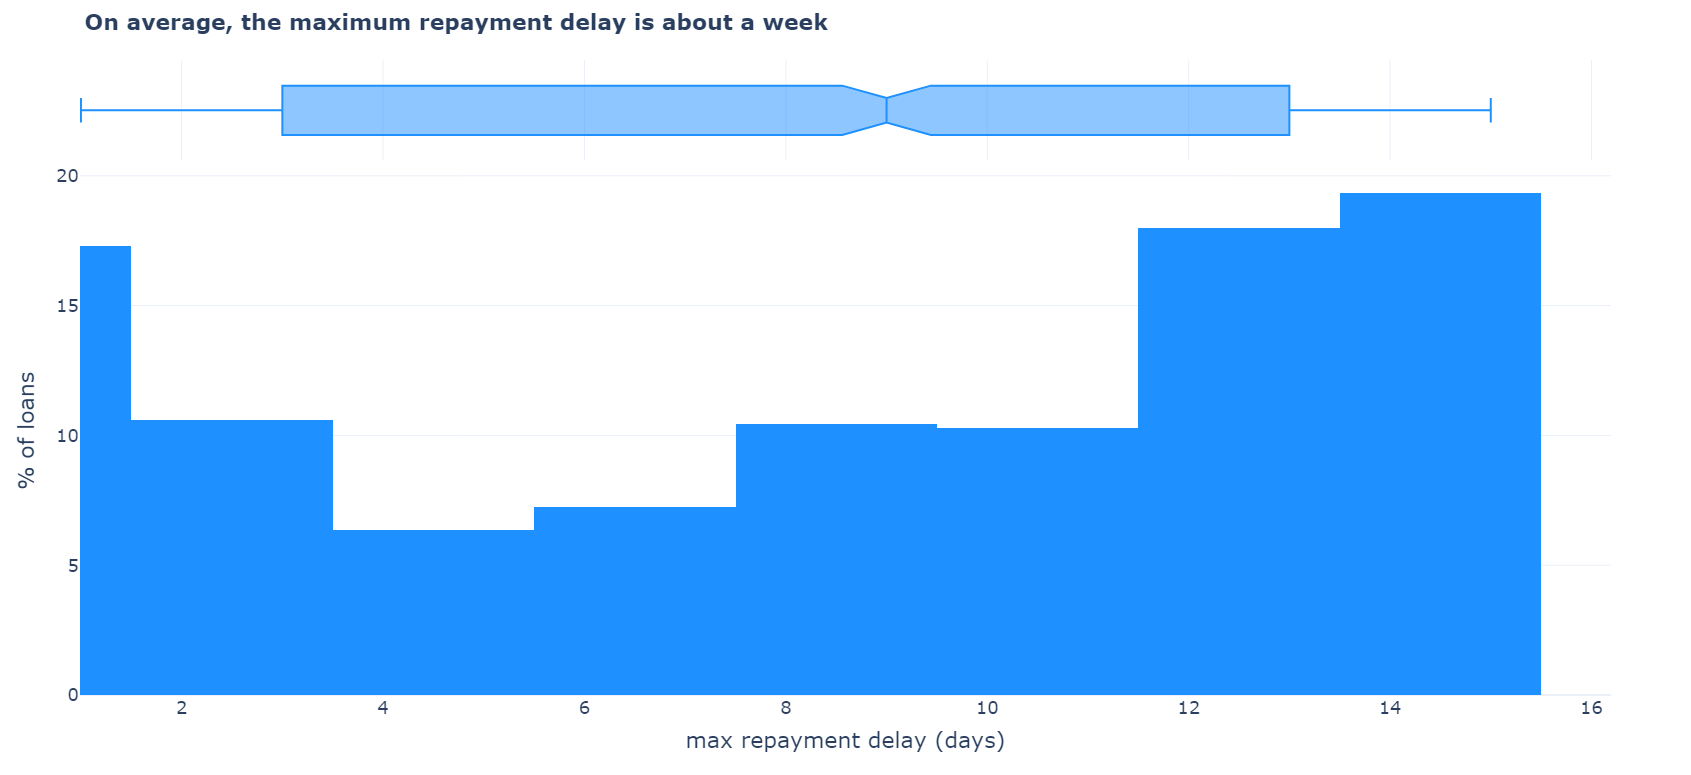

# [User Purchasing Behavior] Sample Description

In [49]:
df_user_transactions["preference_card_type"] = np.where(df_user_transactions['preference_credit'] <= 1, "debit", "credit")

In [50]:
df_user_transactions["preference_purchase_mode"] = np.where(df_user_transactions["preference_purchase_online"] <= 1, "in-person", "online")

In [51]:
df_user_transactions["preference_card_carrier"] = np.where(df_user_transactions["preference_card_brazil"] <= 1, "international", "brazil")

## RFM Segments

**Note:** 83% of the users have moderate to modest activity and spending habits

In [53]:
fig = px.histogram(
    df_user_transactions,
    y="rfm_segment_desc",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>83% of the users have moderate to modest activity and spending habits<br><sub>Promising and Inactive segments</sub></b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="user segment",
    xaxis_title="% of user",
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]
)
fig.update_traces(
    texttemplate="%{x:,.0f}%",
    textposition="inside"
)

fig.show()

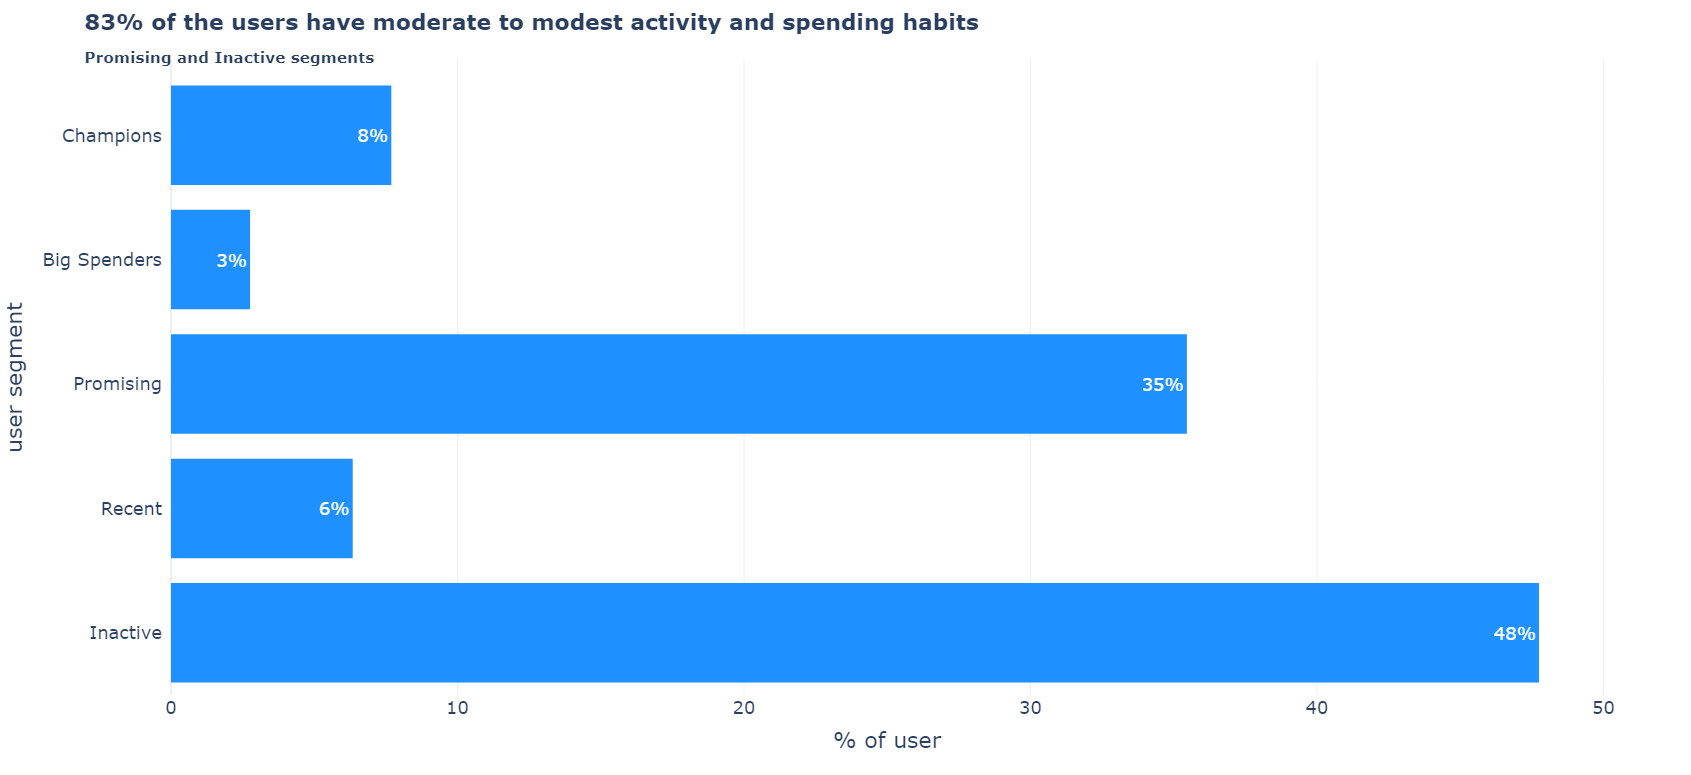

## Installment Plans Preference

**Note:** 
- Users typically finance 25% to 75% of their purchases through installment plans
- Users typically opt for 2-5 installment payments for their purchases

In [56]:
df_user_transactions["preference_installment"] *= 100

fig = px.histogram(
    df_user_transactions,
    x="preference_installment",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users typically finance 25% to 75% of their purchases through installment plans</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of transactions with installments",
    yaxis_title="% of users",
    template=template,
)

fig.show()

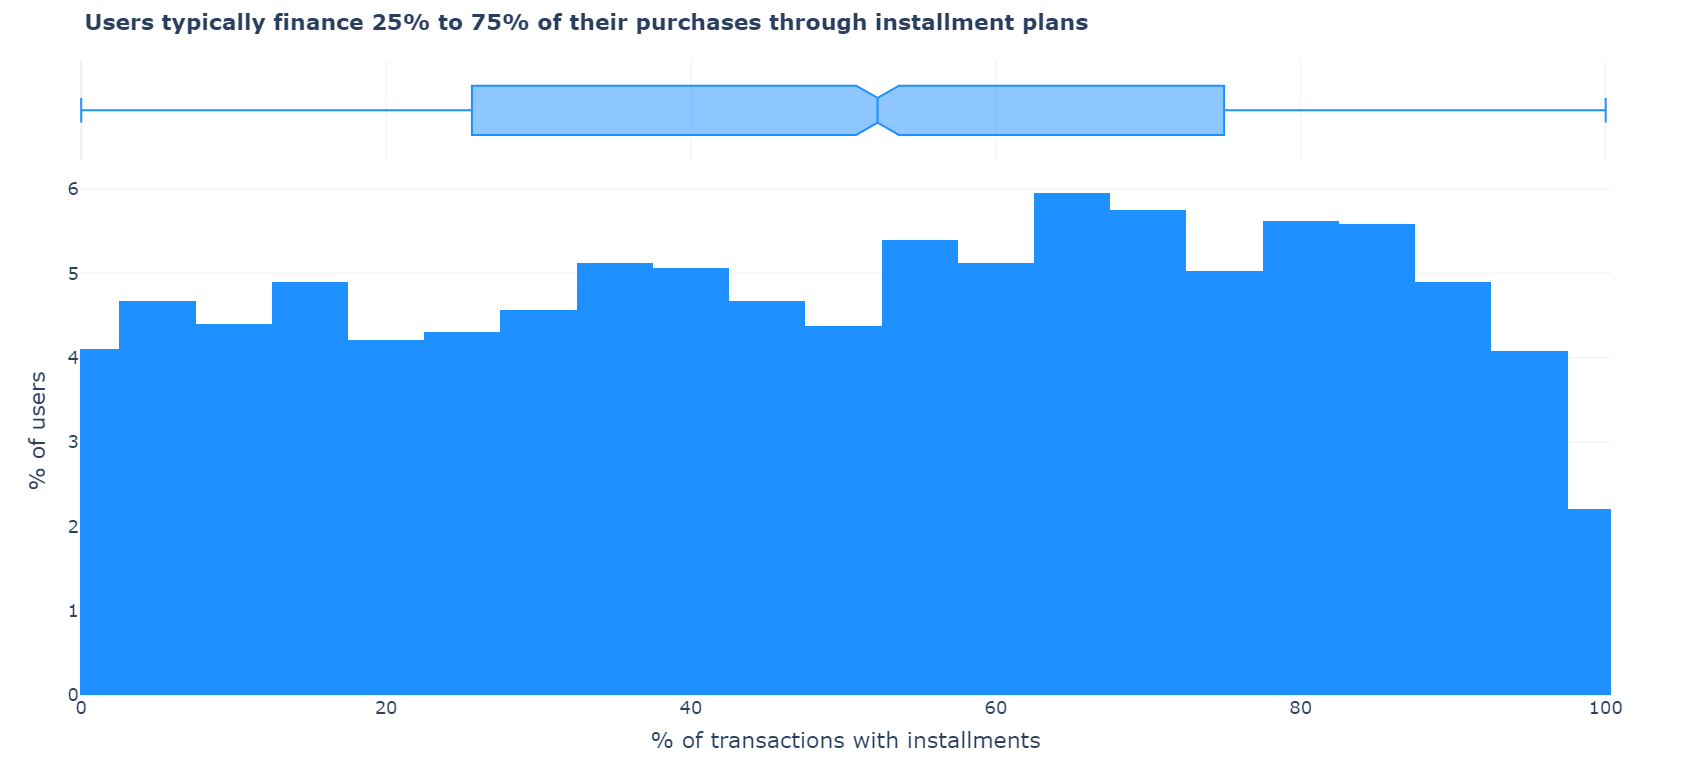

In [58]:
fig = px.histogram(
    df_user_transactions,
    x="avg_intallments",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users typically opt for 2-5 installment payments for their purchases</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. number of installments",
    yaxis_title="% of users",
    template=template,
)

fig.show()

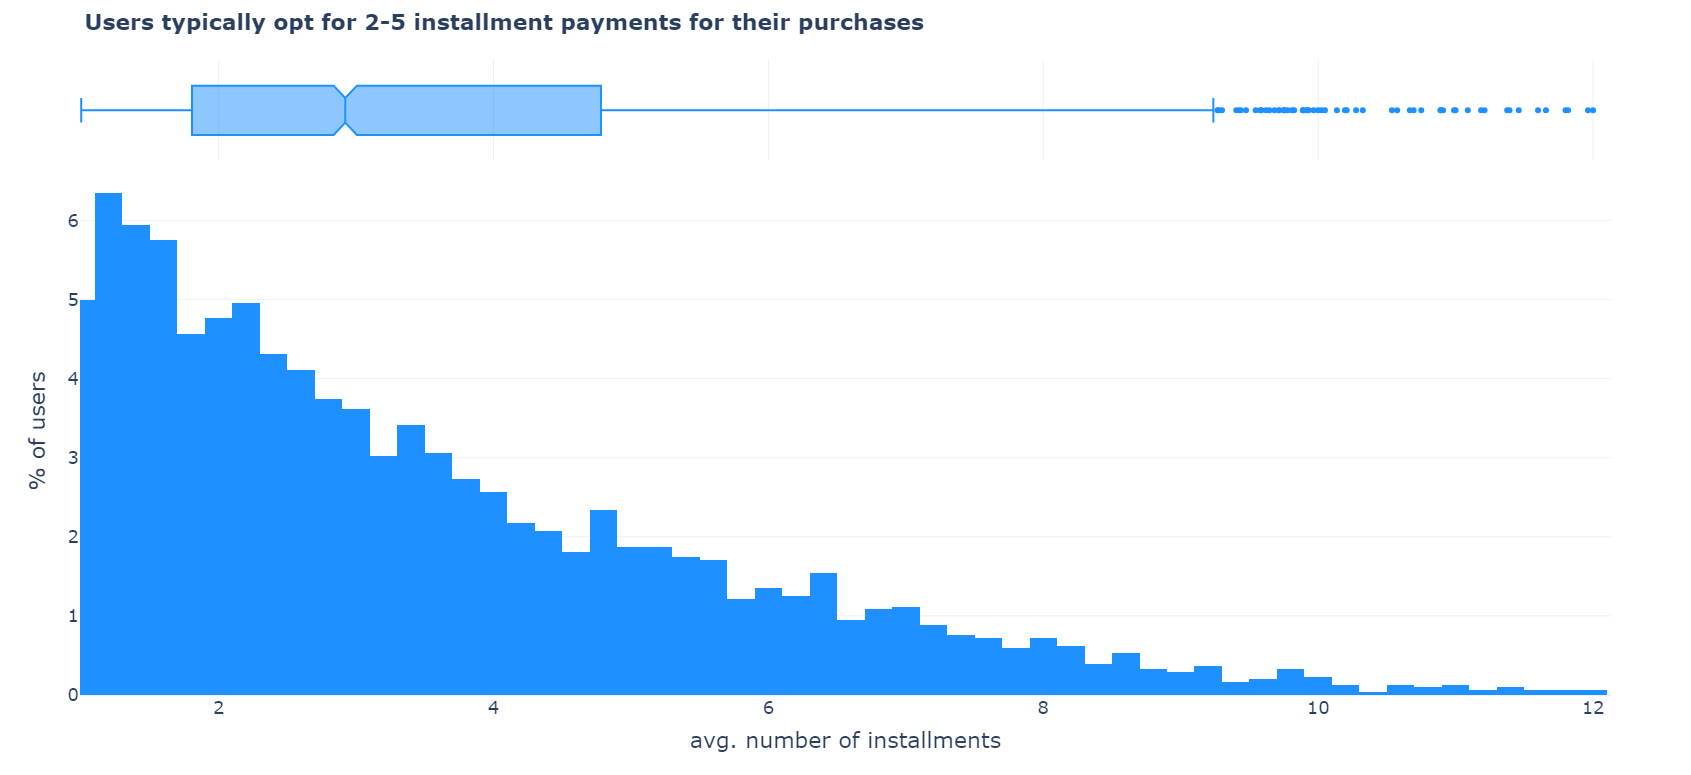

## Denied Transactions

**Note:** On average, users encounter denied transactions less than 20% of the time

In [61]:
df_user_transactions["rate_denied"] *= 100

fig = px.histogram(
    df_user_transactions,
    x="rate_denied",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>On average, users encounter denied transactions less than 20% of the time</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="denied transactions ratio (%)",
    yaxis_title="% of users",
    template=template,
)

fig.show()

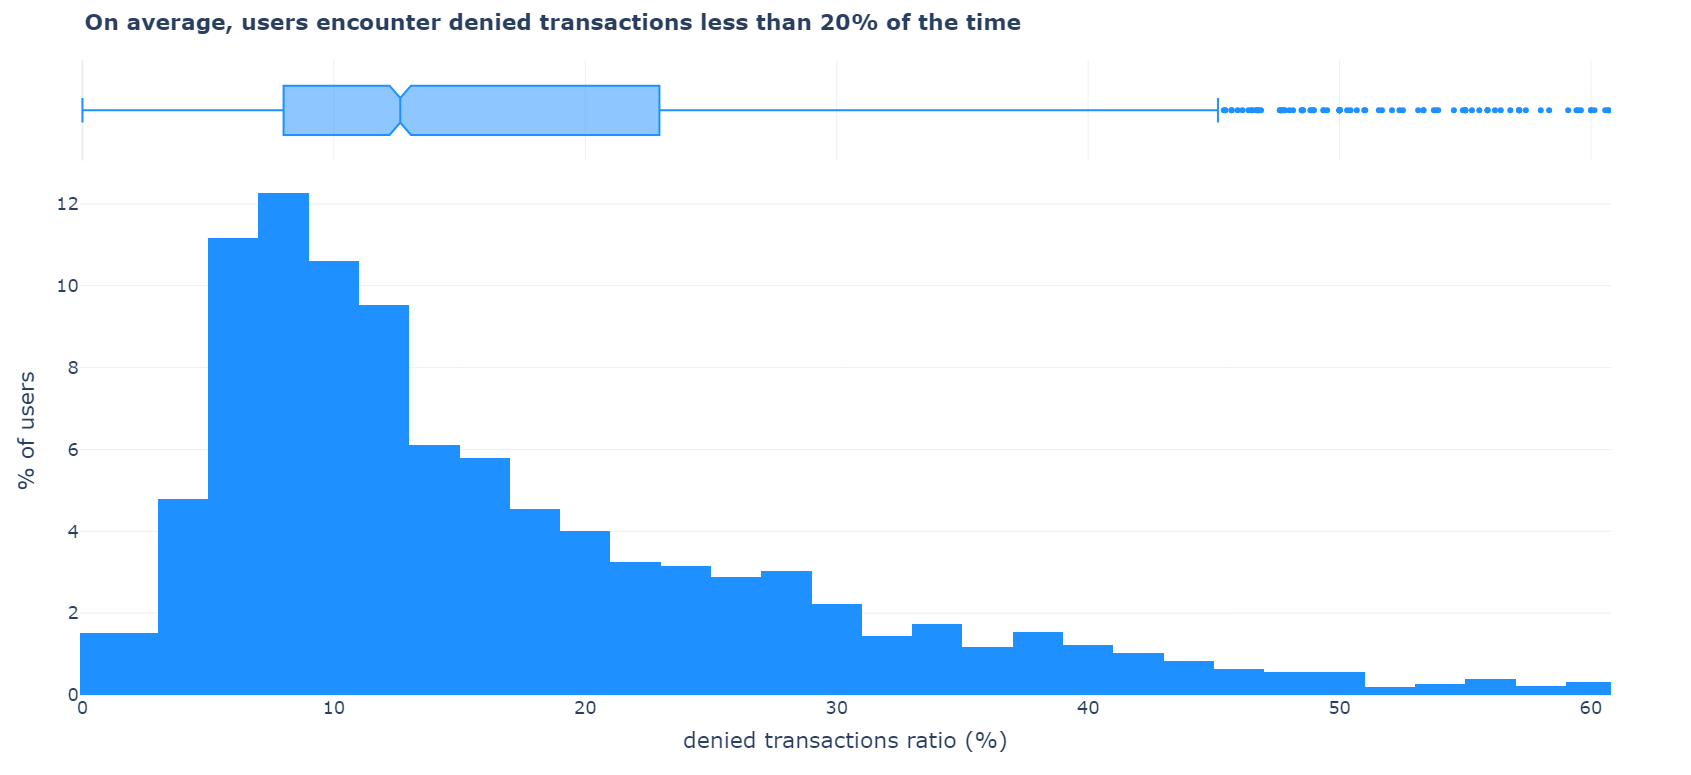

## Card Type Preference

**Note:** 82% of the users prefer to make purchases using a credit card

In [64]:
fig = px.histogram(
    df_user_transactions,
    y="preference_card_type",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>82% of the users prefer to make purchases using a credit card</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="card type preference",
    xaxis_title="% of users",
    template=template,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate="%{x:,.0f}%",
    textposition="inside"
)

fig.show()

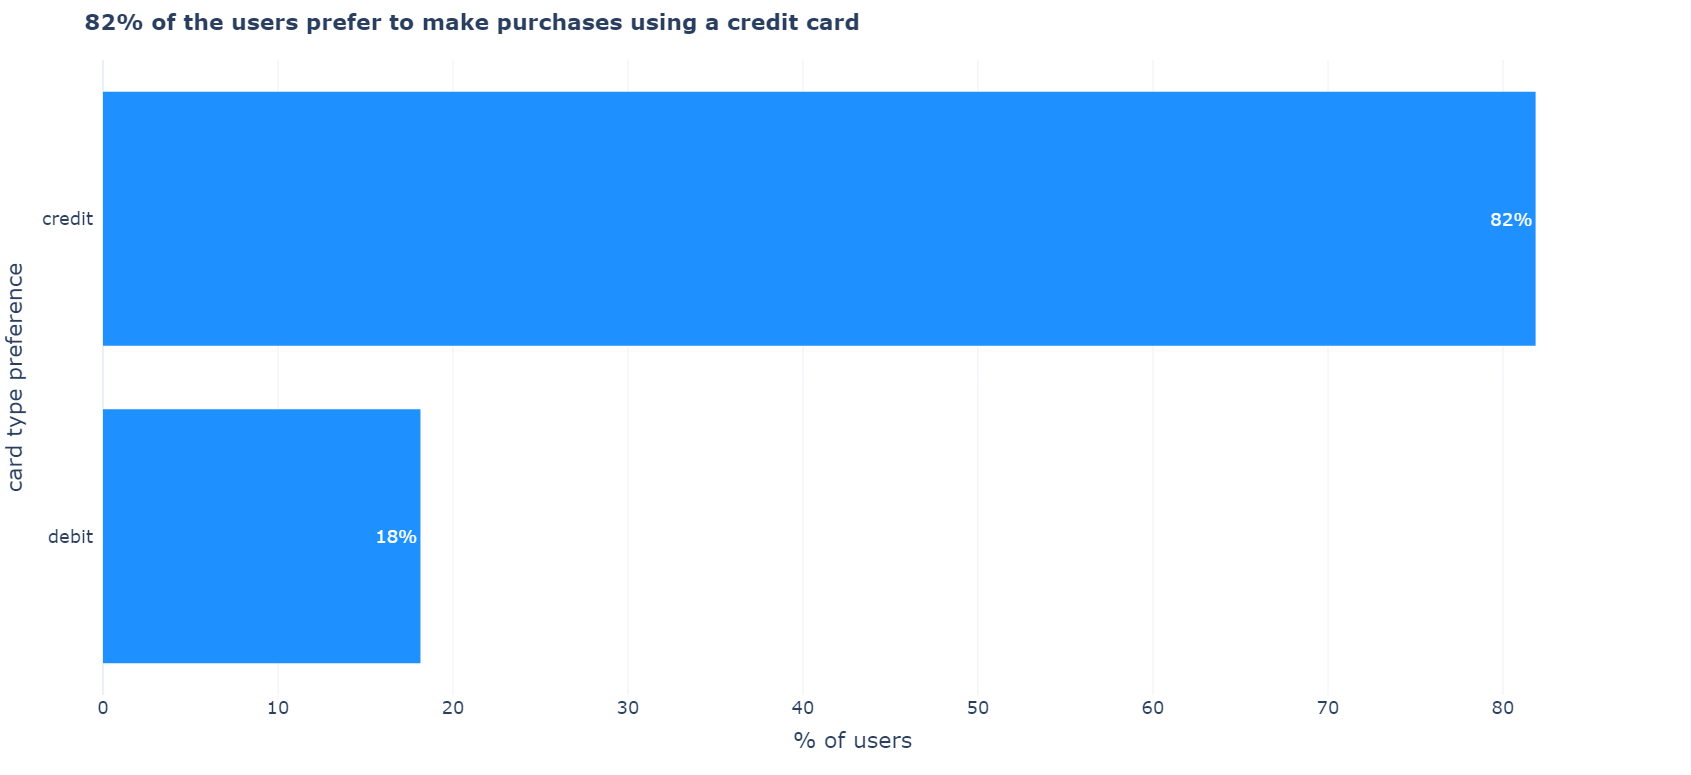

## Online Purchases Preference

**Note:** Our base consists of users who value in-person purchases

In [67]:
fig = px.histogram(
    df_user_transactions,
    y="preference_purchase_mode",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Our base consists of users who value in-person purchases</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="purchase type",
    xaxis_title="% of users",
    template=template,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate="%{x:,.0f}%",
    textposition="outside"
)

fig.show()

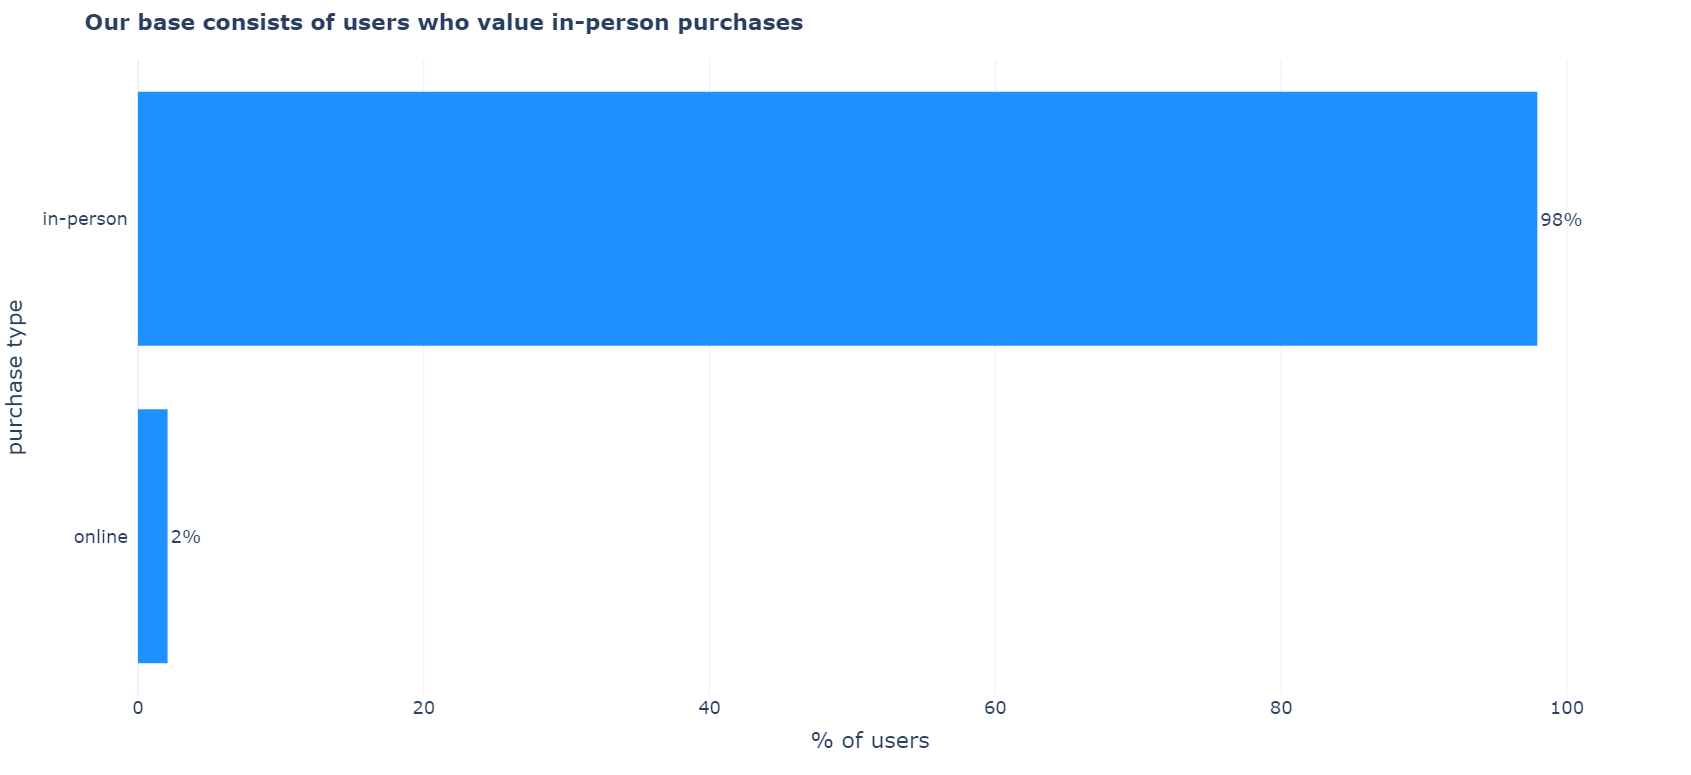

# [User Repayment Behavior] Sample Description

In [70]:
df_user_repayments_overall = (
    df_user_repayments
    .sort_values(by=['user_id', 'created_at'])
    .groupby(['user_id'], as_index=False)
    .last()
)

In [71]:
df_user_repayments_overall["has_defaulted"] = "hasn't defaulted"
df_user_repayments_overall.loc[df_user_repayments_overall["user_avg_rate_default"] > 0, "has_defaulted"] = "has defaulted"

In [72]:
df_user_repayments_overall["has_exceeded_due_date"] = "on time"
df_user_repayments_overall.loc[df_user_repayments_overall["user_rate_due_date_exceeded"] > 0, "has_exceeded_due_date"] = "overdue"

In [73]:
df_user_repayments_overall["preference_repayment_type"] = "manual"
df_user_repayments_overall.loc[df_user_repayments_overall["user_avg_rate_manual_repayments"] <= 1, "preference_repayment_type"] = "automated"

## Number of Loans

**Note:** The majority of the users have taken 1 to 3 loans

In [75]:
fig = px.histogram(
    df_user_repayments_overall,
    x="user_num_loans",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>The majority of the users have taken 1 to 3 loans</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="number of loans",
    yaxis_title="% of users",
    template=template,
)

fig.show()

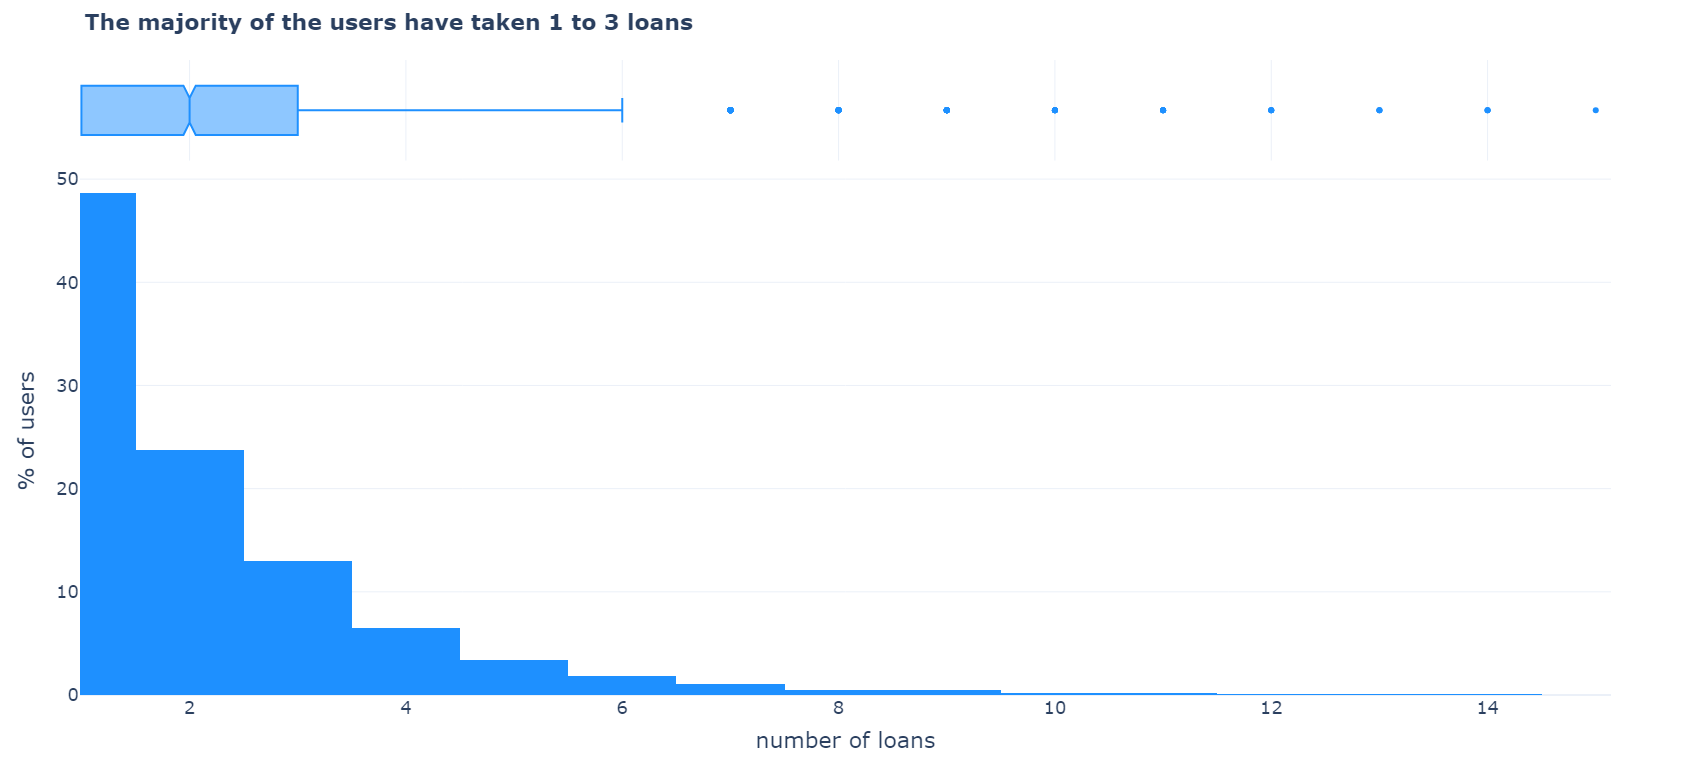

## Debt

**Note:** Users who default on their loans typically owe 26%-80% of the original loan amount

In [78]:
df_user_repayments_overall["user_avg_pct_debt"] *= 100

fig = px.histogram(
    df_user_repayments_overall[df_user_repayments_overall["user_avg_pct_debt"] > 0],
    x="user_avg_pct_debt",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users who default on their loans typically owe 26%-80% of the original loan amount</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. debt (%)",
    yaxis_title="% of users",
    template=template,
)

fig.show()

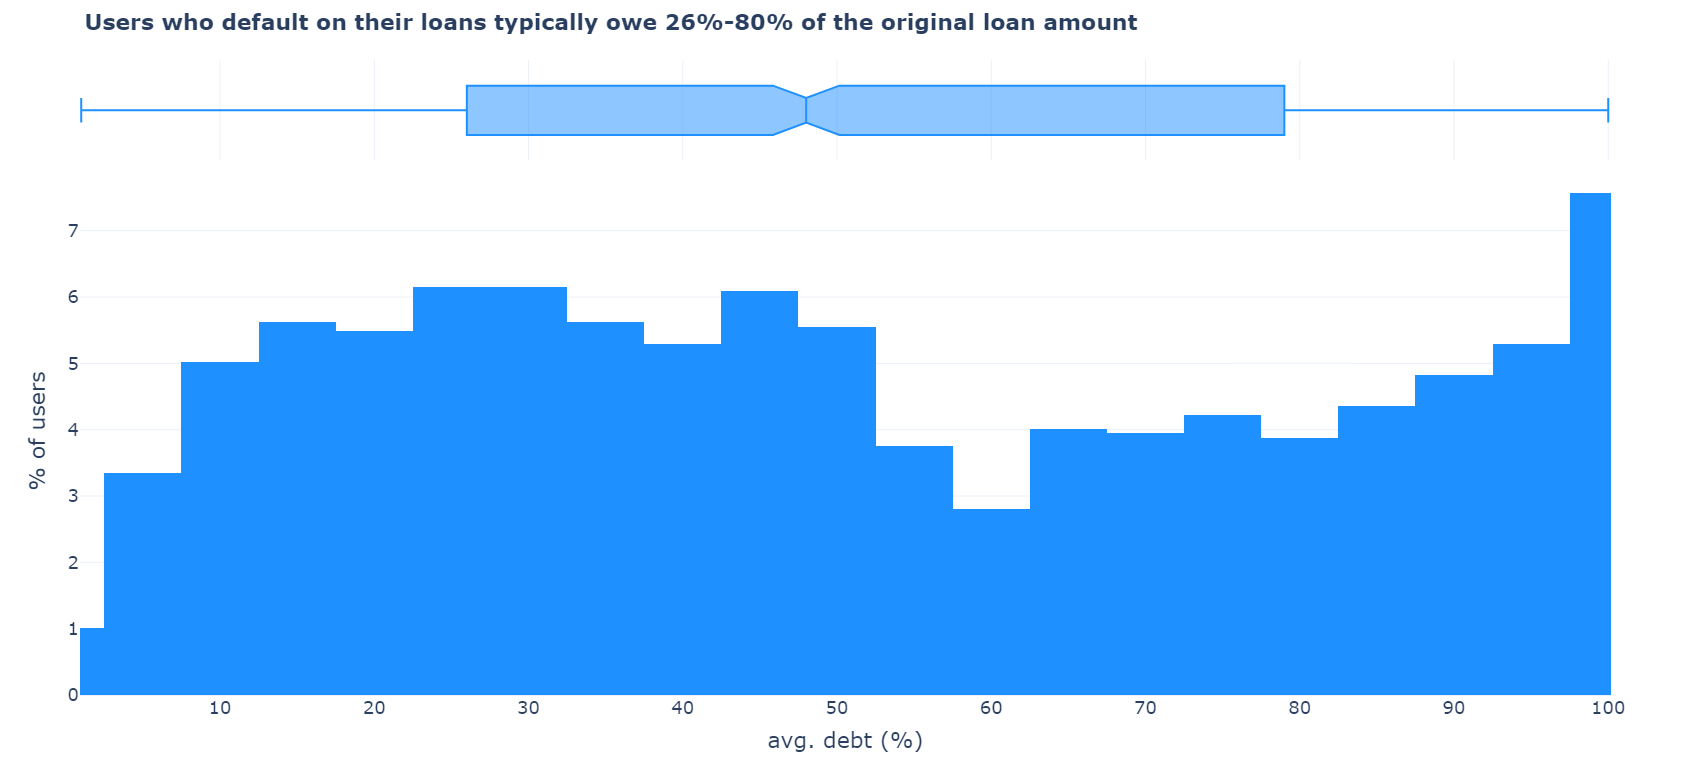

## Average Number of Repayments

**Note:** Users typically repay loans in 10-42 repayments

In [81]:
fig = px.histogram(
    df_user_repayments_overall,
    x="user_avg_num_repayments",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users typically repay loans in 10-42 repayments</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. number of repayments",
    yaxis_title="% of users",
    template=template,
)

fig.show()

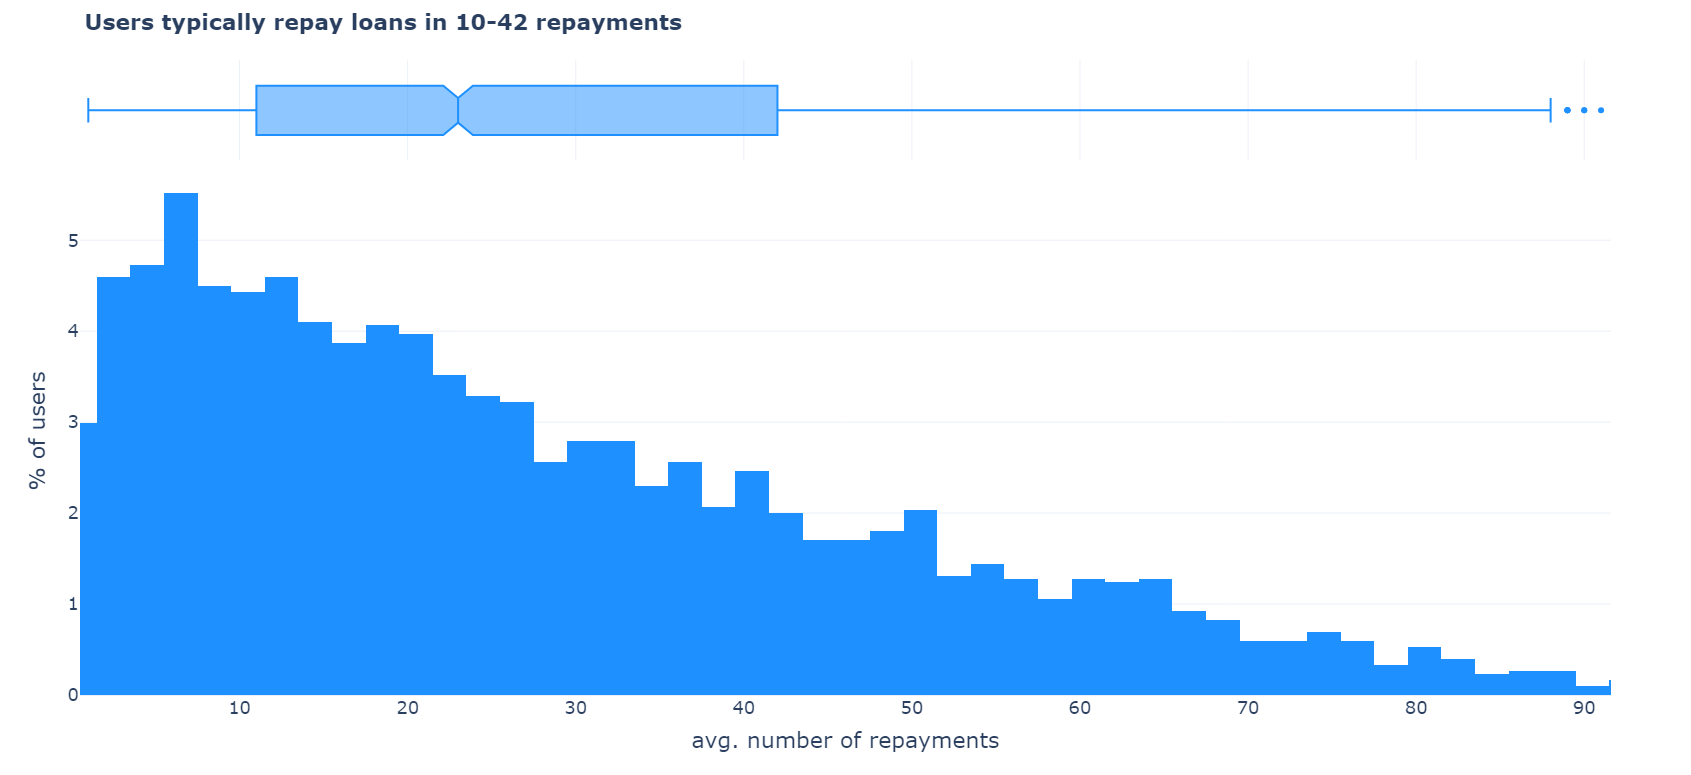

## Average Repayment Amount

**Note:** Average repayment amounts typically fall between R$115-415

In [84]:
fig = px.histogram(
    df_user_repayments_overall,
    x="user_avg_repayment_amount",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Average repayment amounts typically fall between R$115-415</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. repayment amount (R$)",
    yaxis_title="% of users",
    template=template,
)

fig.show()

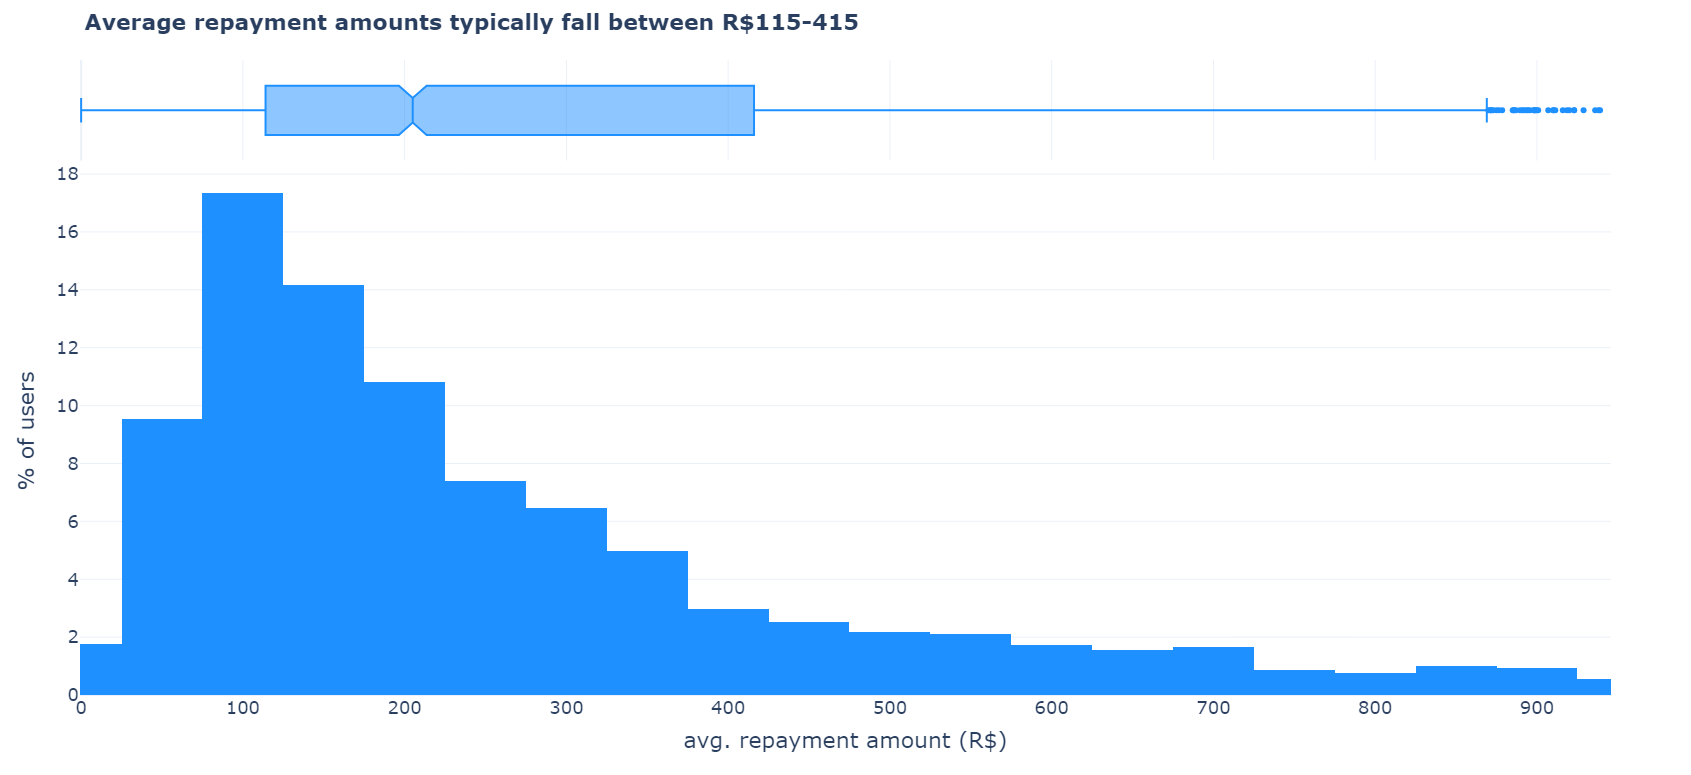

## Loan Repayment Lag

**Note:** On average, repayments happen every 2-6 days

In [87]:
fig = px.histogram(
    df_user_repayments_overall,
    x="user_avg_lag_repayment",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>On average, repayments happen every 2-6 days</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. repayment lag (days)",
    yaxis_title="% of users",
    template=template,
)

fig.show()

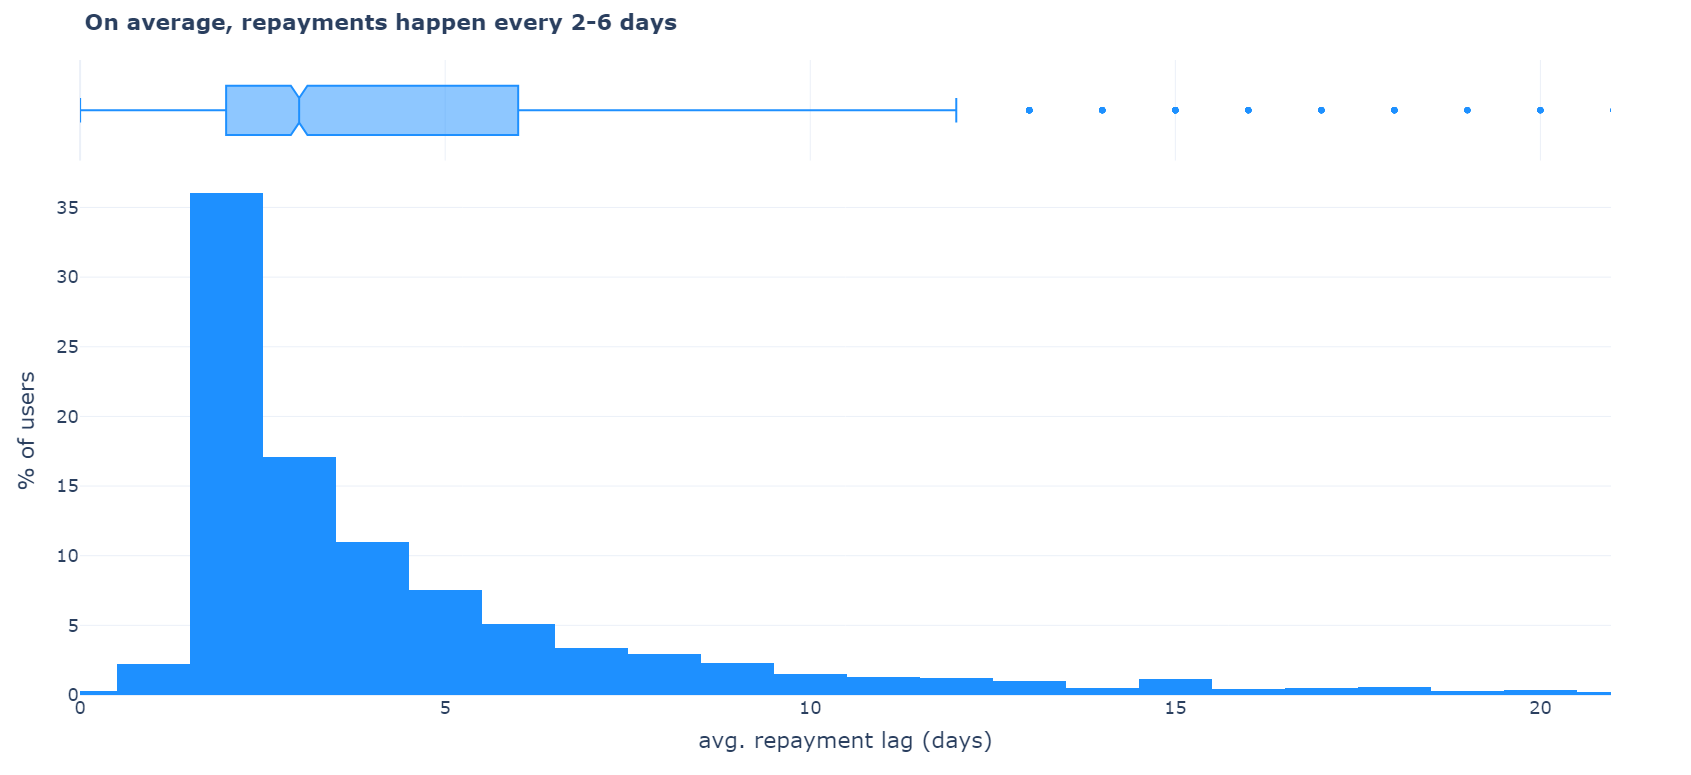

## User Default Rate

**Note:** 
- 77% of the users have defaulted at least once during the repayment process
- Users who have defaulted typically exhibit default rates ranging from 3%-10%

In [90]:
fig = go.Figure([
    go.Bar(
        y=["hasn't<br>defaulted"],
        x=[df_user_repayments_overall[df_user_repayments_overall['has_defaulted'] == "hasn't defaulted"].shape[0]/df_user_repayments_overall.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_blue"],
    ),
    go.Bar(
        y=["has<br>defaulted"],
        x=[df_user_repayments_overall[df_user_repayments_overall['has_defaulted'] == "has defaulted"].shape[0]/df_user_repayments_overall.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_purple"],
    )
])

fig.update_layout(
    title="<b>77% of the users have defaulted at least once during the repayment process</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title=None,
    xaxis_title="% of users",
    template=template,
    showlegend=False,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate='%{x:,.0f}%',
    textposition='inside'
)

fig.show()

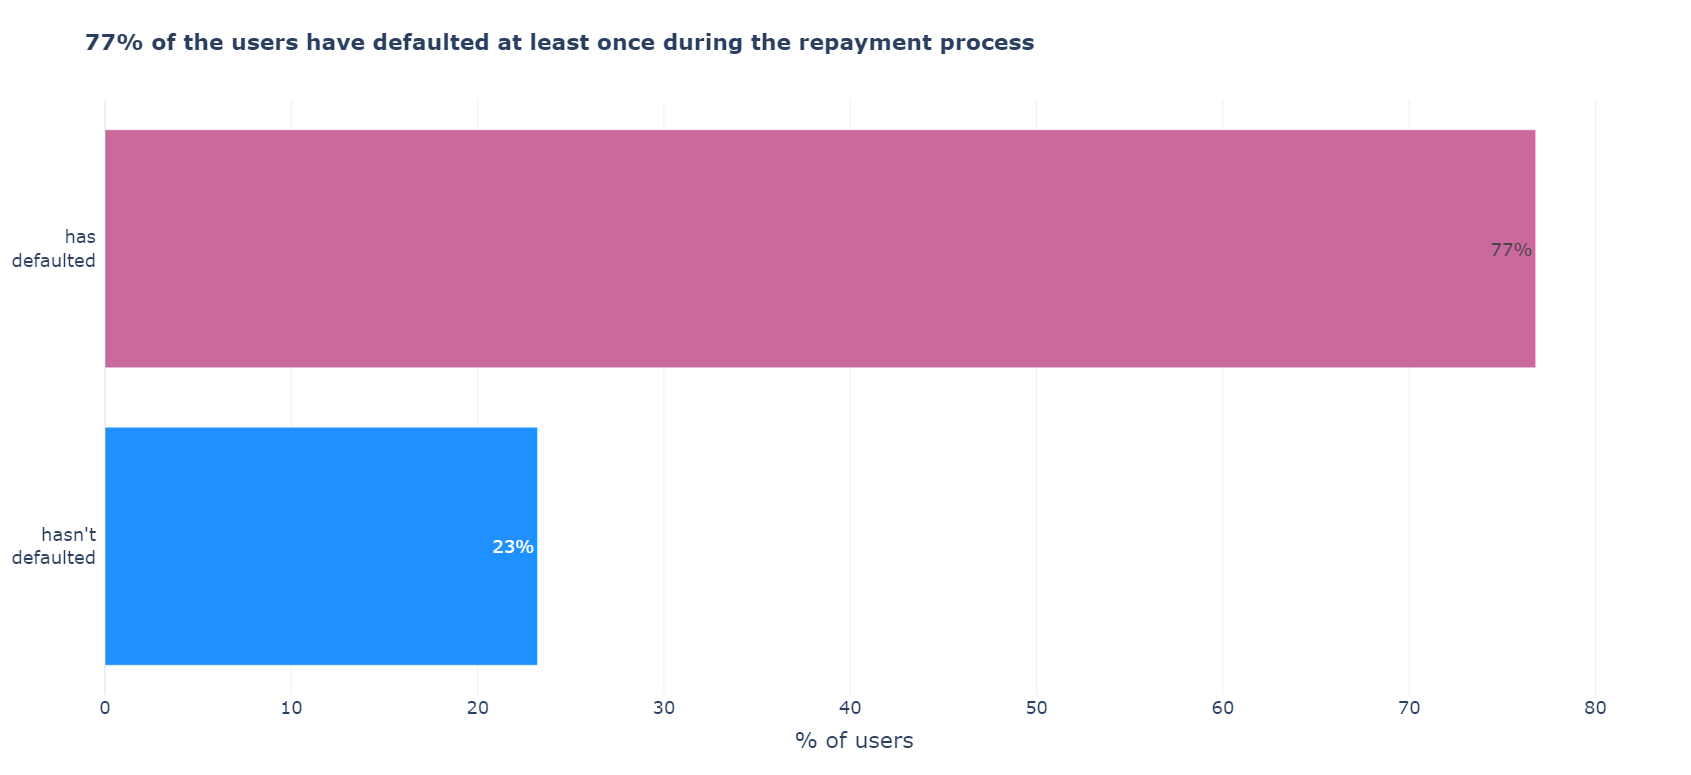

In [92]:
df_user_repayments_overall["user_avg_rate_default"] *= 100

fig = px.histogram(
    df_user_repayments_overall[df_user_repayments_overall['has_defaulted'] == "has defaulted"],
    x="user_avg_rate_default",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users who have defaulted typically exhibit default rates ranging from 3%-10%</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="default rate (%)",
    yaxis_title="% of users (default)",
    template=template,
)

fig.show()

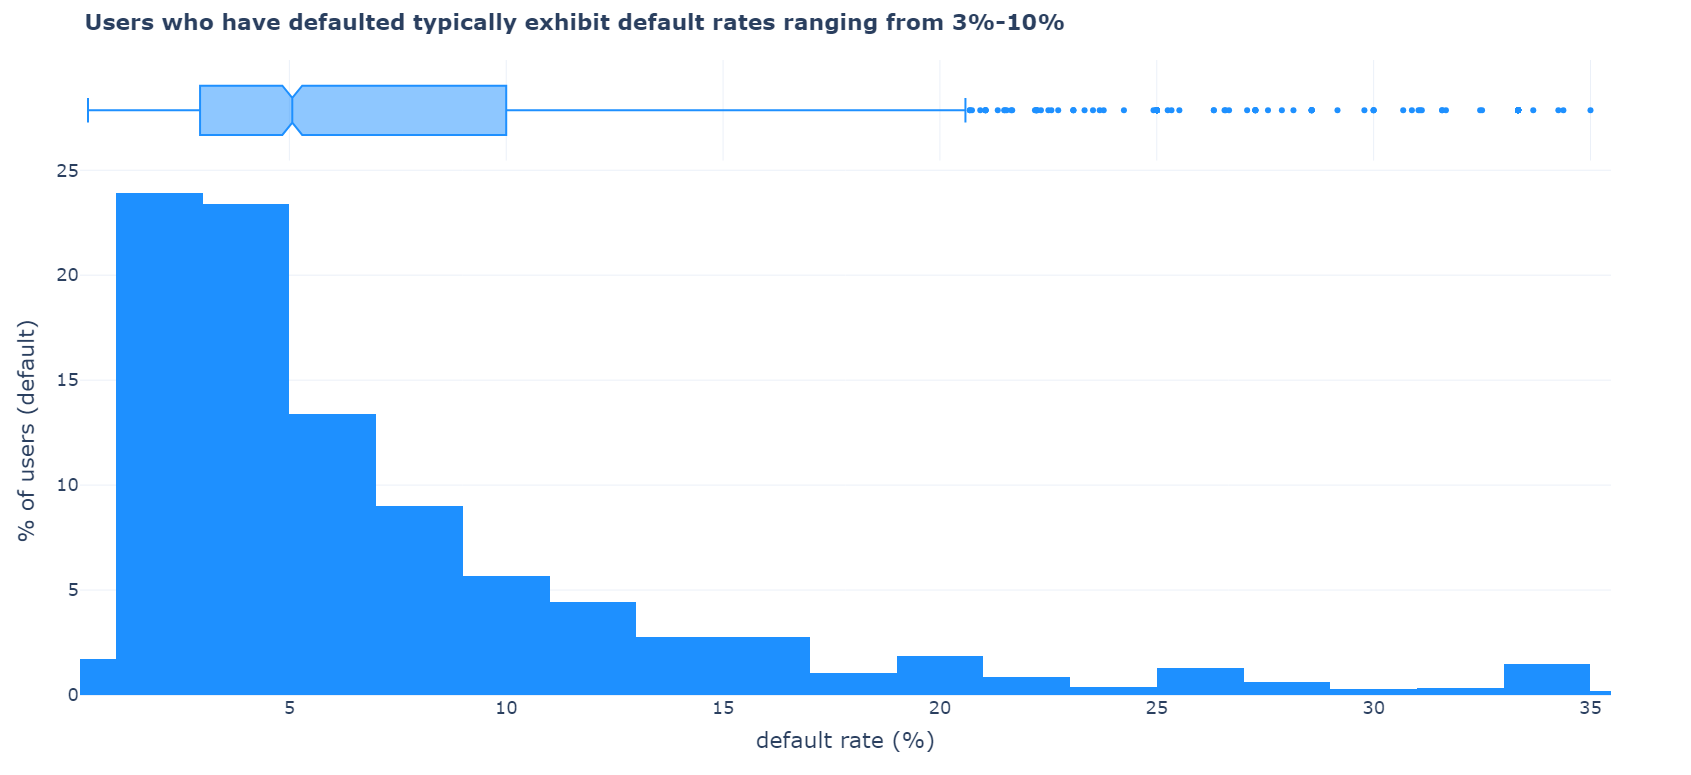

## User Overdue

**Note:**
- 38% of the users were overdue at least once during the repayment process
- On average, users who are overdue tend to delay their repayments by up to one week

In [95]:
fig = go.Figure([
    go.Bar(
        y=["on time"],
        x=[df_user_repayments_overall[df_user_repayments_overall['has_exceeded_due_date'] == "on time"].shape[0]/df_user_repayments_overall.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_blue"],
    ),
    go.Bar(
        y=["overdue"],
        x=[df_user_repayments_overall[df_user_repayments_overall['has_exceeded_due_date'] == "overdue"].shape[0]/df_user_repayments_overall.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_purple"],
    )
])

fig.update_layout(
    title="<b>38% of the users were overdue at least once during the repayment process</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title=None,
    xaxis_title="% of users",
    template=template,
    showlegend=False,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate='%{x:,.0f}%',
    textposition='inside'
)

fig.show()

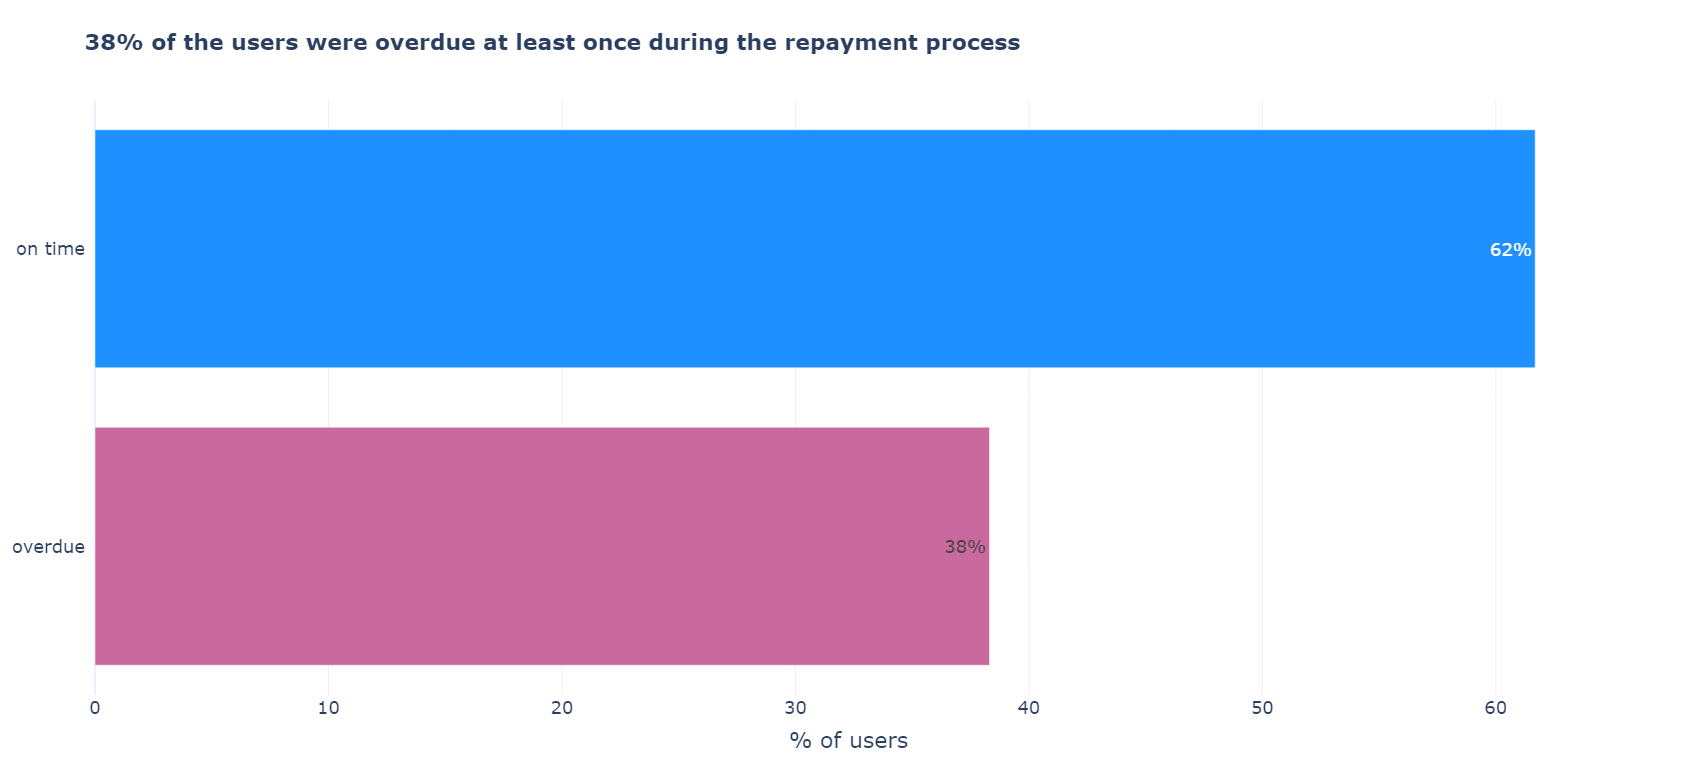

In [97]:
fig = px.histogram(
    df_user_repayments_overall[df_user_repayments_overall['has_exceeded_due_date'] == "overdue"],
    x="user_avg_max_repayment_delay",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>On average, users who are overdue tend to delay their repayments by up to one week</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. max repayment delay (days)",
    yaxis_title="% of users (overdue)",
    template=template,
)

fig.show()

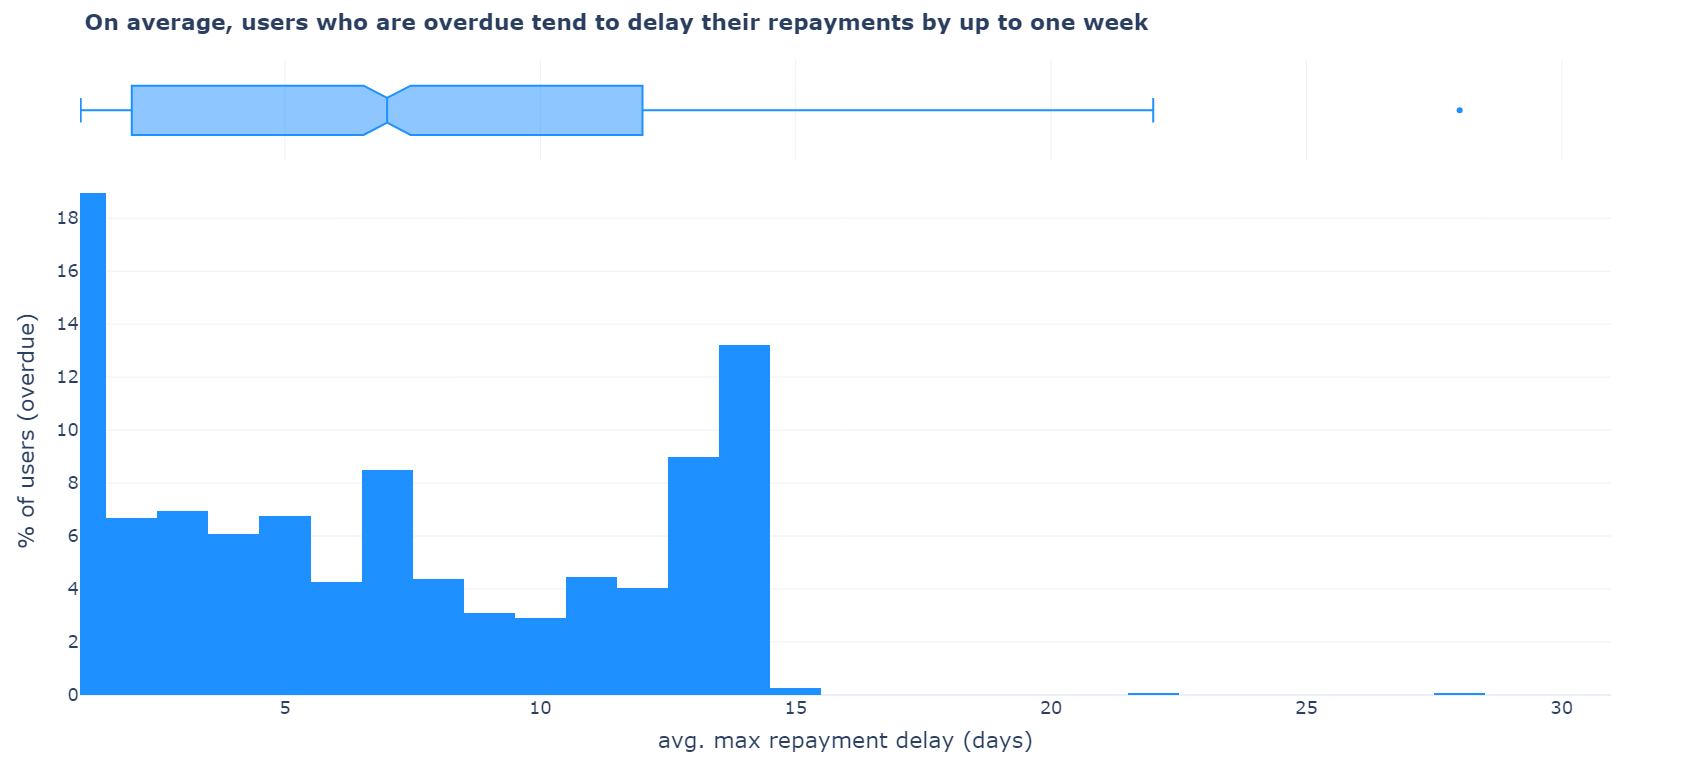

## Repayment Type Preference

**Note:** Only 7% of the users prefer manual repayments over an automated plan

In [100]:
fig = go.Figure([
    go.Bar(
        y=["automated"],
        x=[df_user_repayments_overall[df_user_repayments_overall['preference_repayment_type'] == "automated"].shape[0]/df_user_repayments_overall.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_blue"],
    ),
    go.Bar(
        y=["manual"],
        x=[df_user_repayments_overall[df_user_repayments_overall['preference_repayment_type'] == "manual"].shape[0]/df_user_repayments_overall.shape[0] * 100,],
        orientation="h",
        marker_color=colors["dark_purple"],
    )
])

fig.update_layout(
    title="<b>Only 7% of the users prefer manual repayments over an automated plan</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="repayment type",
    xaxis_title="% of users",
    template=template,
    showlegend=False,
)
fig.update_yaxes(
    categoryorder="total ascending"
)
fig.update_traces(
    texttemplate='%{x:,.0f}%',
    textposition='inside'
)

fig.show()

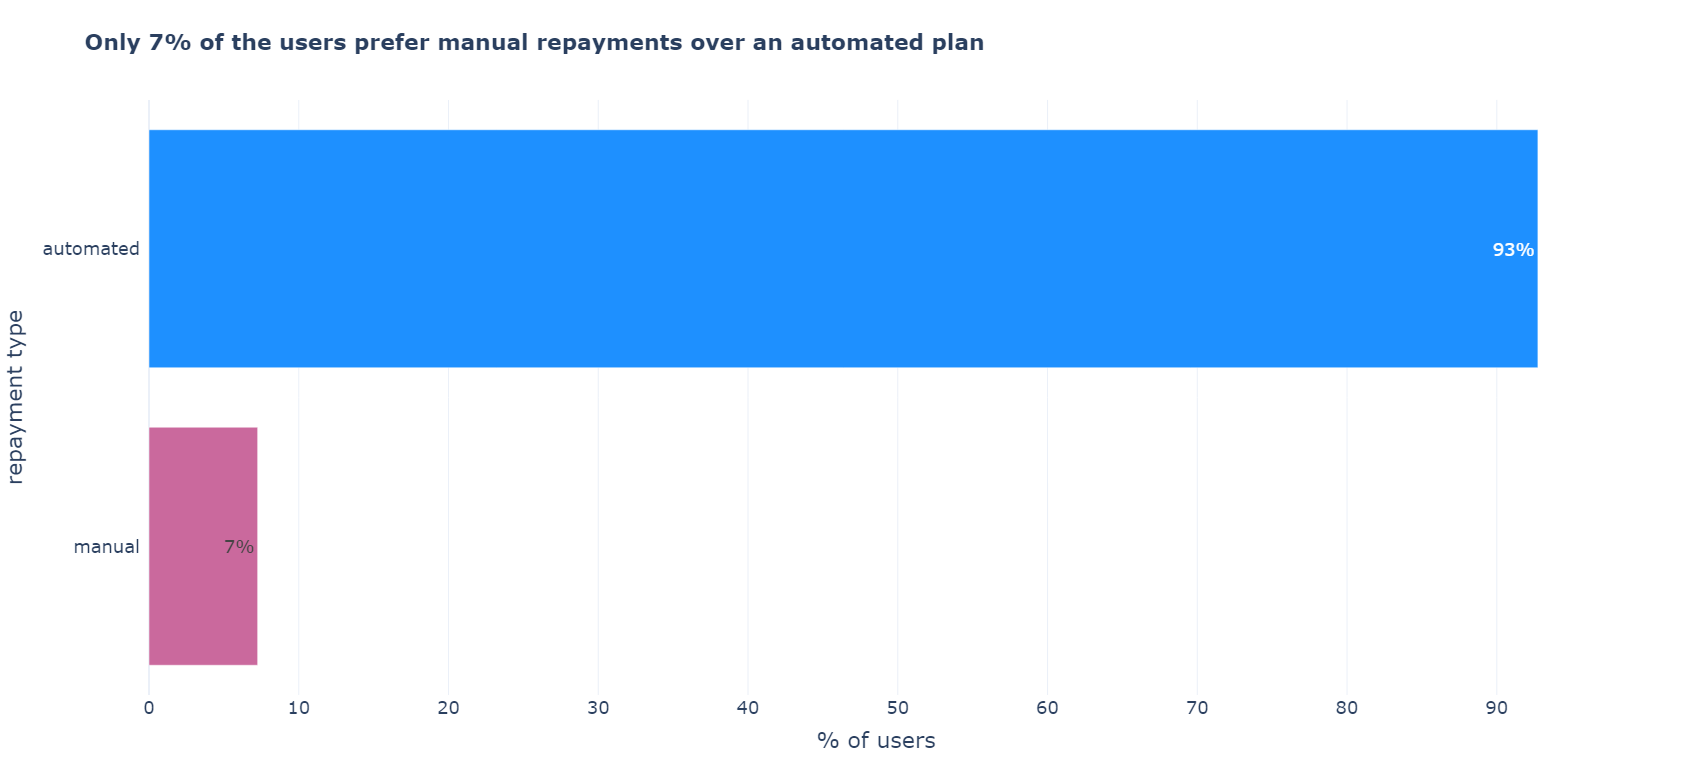

# Segment Purchasing Behavior

In [103]:
df_user_transactions["preference_installment"] = df_user_transactions["preference_installment"].astype(float)

## Installment Plans Preference

**Notes:** 
- Big Spenders, Recent and Inactive customers consistently opt for installment plans for their purchases
- Big Spenders, Recent and Inactive users opt for the longest installment plans for their purchases

In [105]:
fig = px.box(
    df_user_transactions, 
    x="preference_installment", 
    y="rfm_segment_desc",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive customers consistently opt for installment plans for their purchases</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="preference of installment plans (%)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)

fig.show()

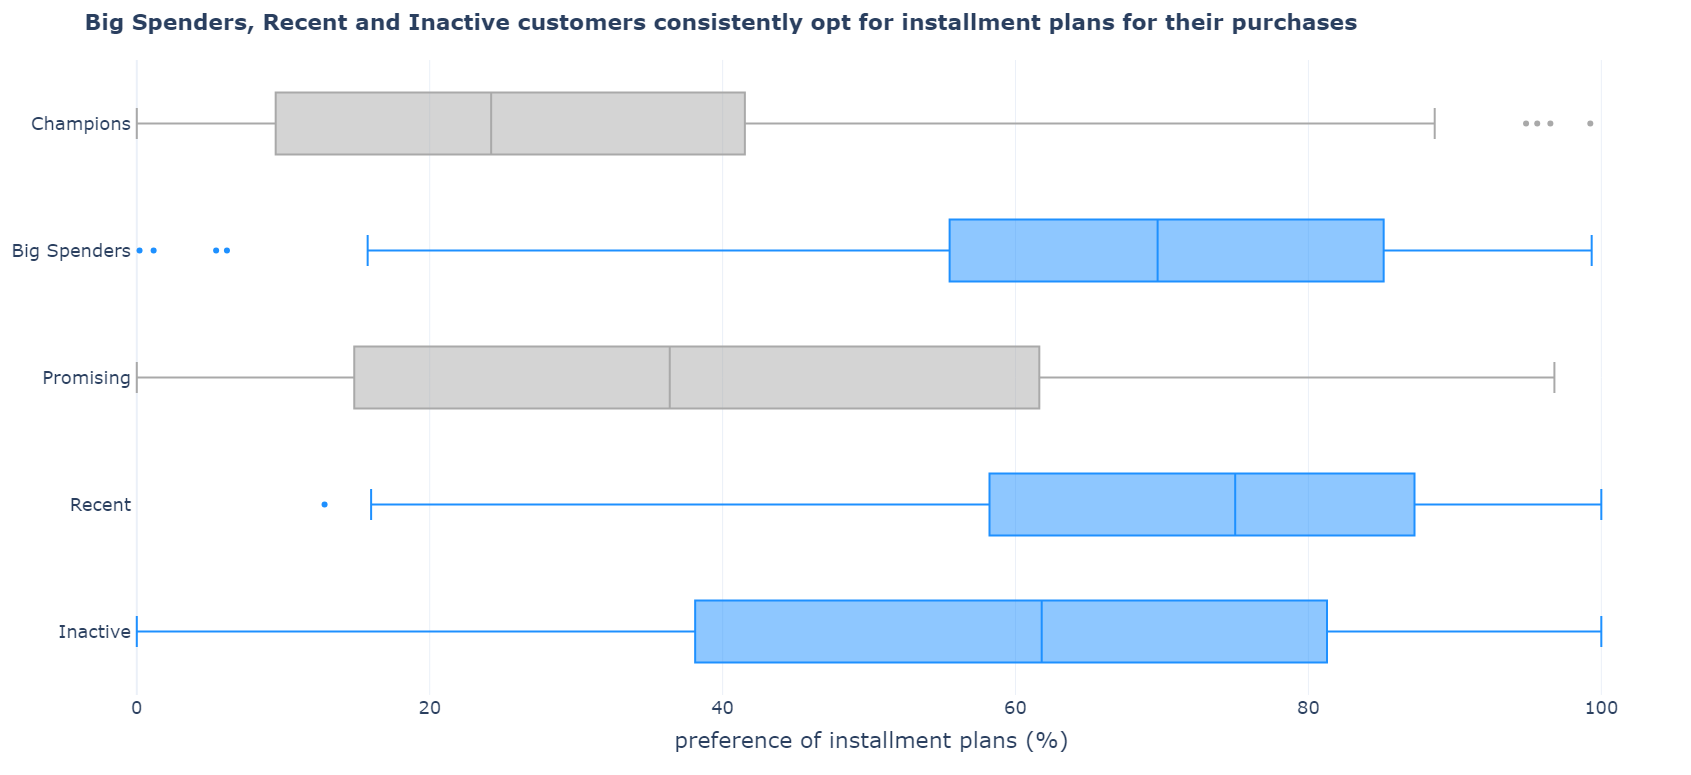

In [107]:
df = (
    df_user_transactions
    .groupby('rfm_segment_desc', as_index=False)
    .agg(avg_preference_installment=("preference_installment", "mean"))
)

fig = px.bar(
    df,
    y="rfm_segment_desc",
    x="avg_preference_installment",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive customers consistently opt for installment plans for their purchases</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. preference of installment plans (%)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)
fig.update_traces(
    texttemplate='%{x:.0f}%',
    textposition='inside'
)

fig.show()

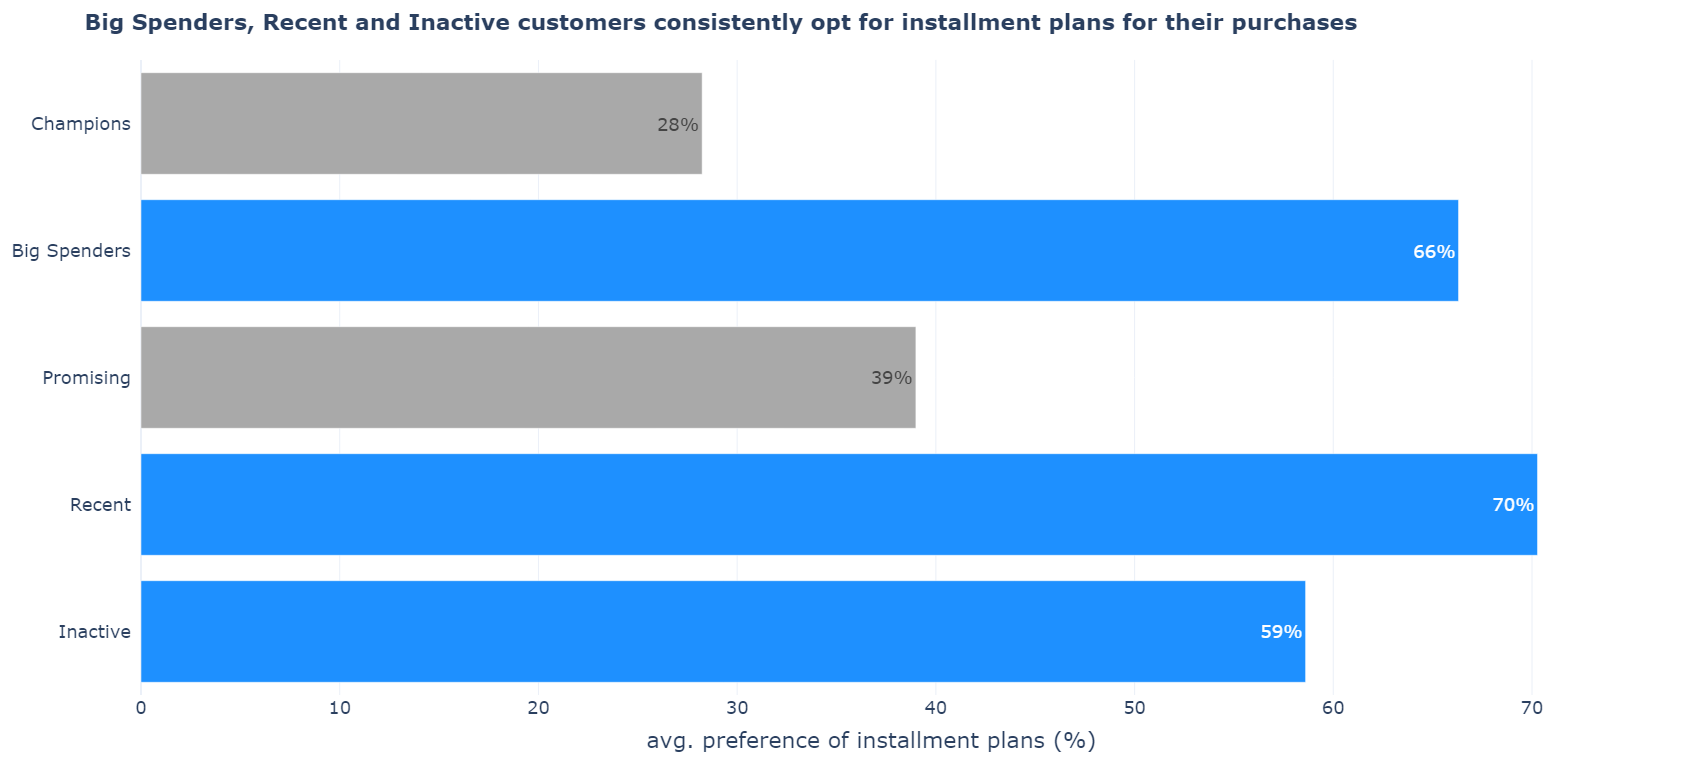

In [109]:
fig = px.box(
    df_user_transactions, 
    x="avg_intallments", 
    y="rfm_segment_desc",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive users opt for the longest installment plans for their purchases</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="number of installments",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)

fig.show()

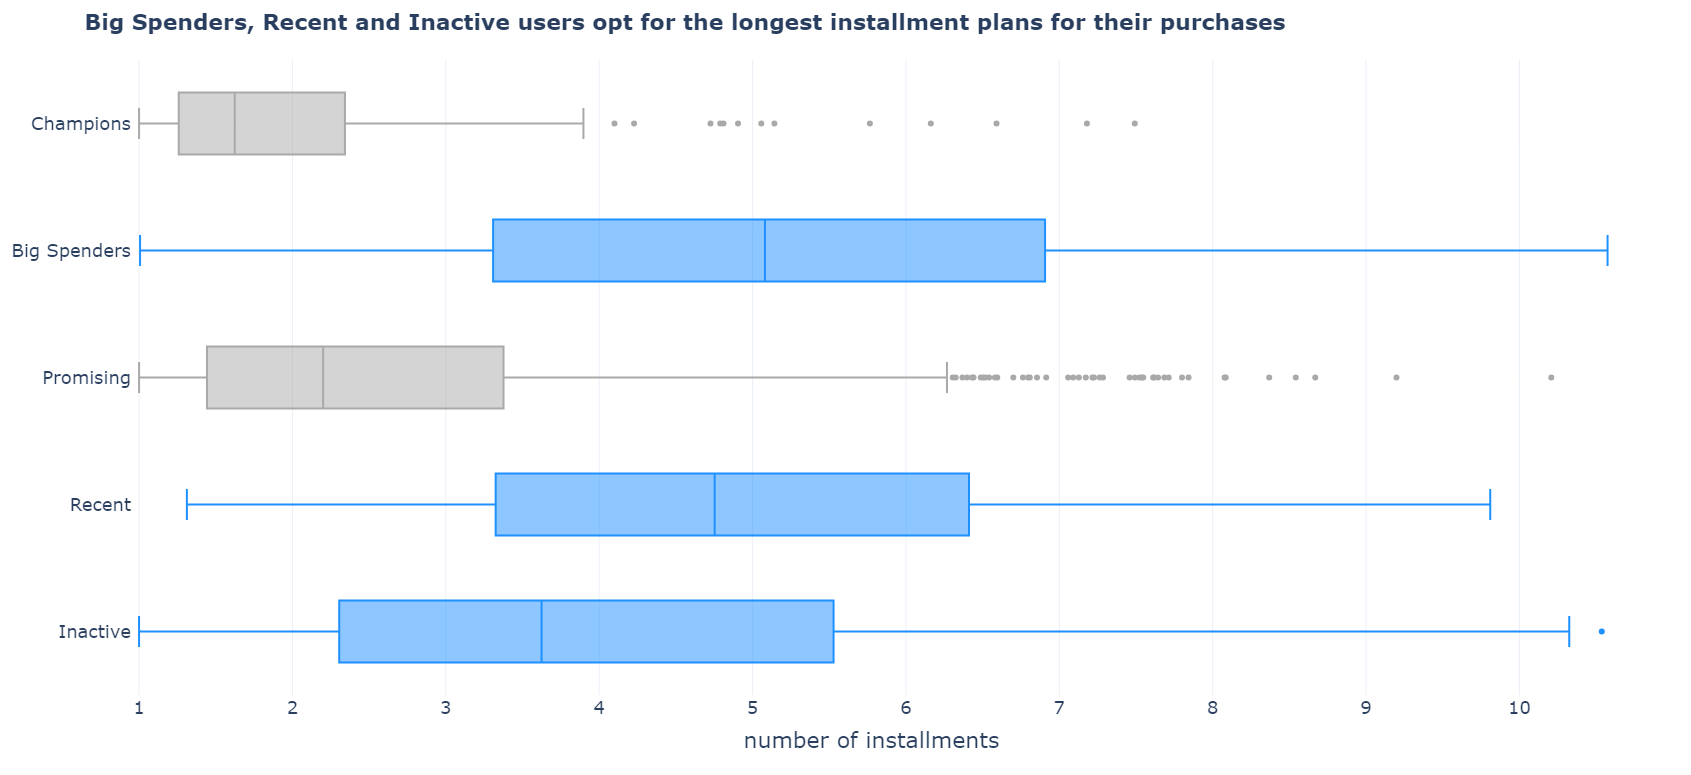

In [111]:
df = (
    df_user_transactions
    .groupby('rfm_segment_desc', as_index=False)
    .agg(avg_intallments=("avg_intallments", "mean"))
)
df["avg_intallments"] = np.ceil(df["avg_intallments"])

fig = px.bar(
    df,
    y="rfm_segment_desc",
    x="avg_intallments",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive users opt for the longest installment plans for their purchases</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. number of installments",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)
fig.update_traces(
    texttemplate='%{x:.0f}',
    textposition='inside'
)

fig.show()

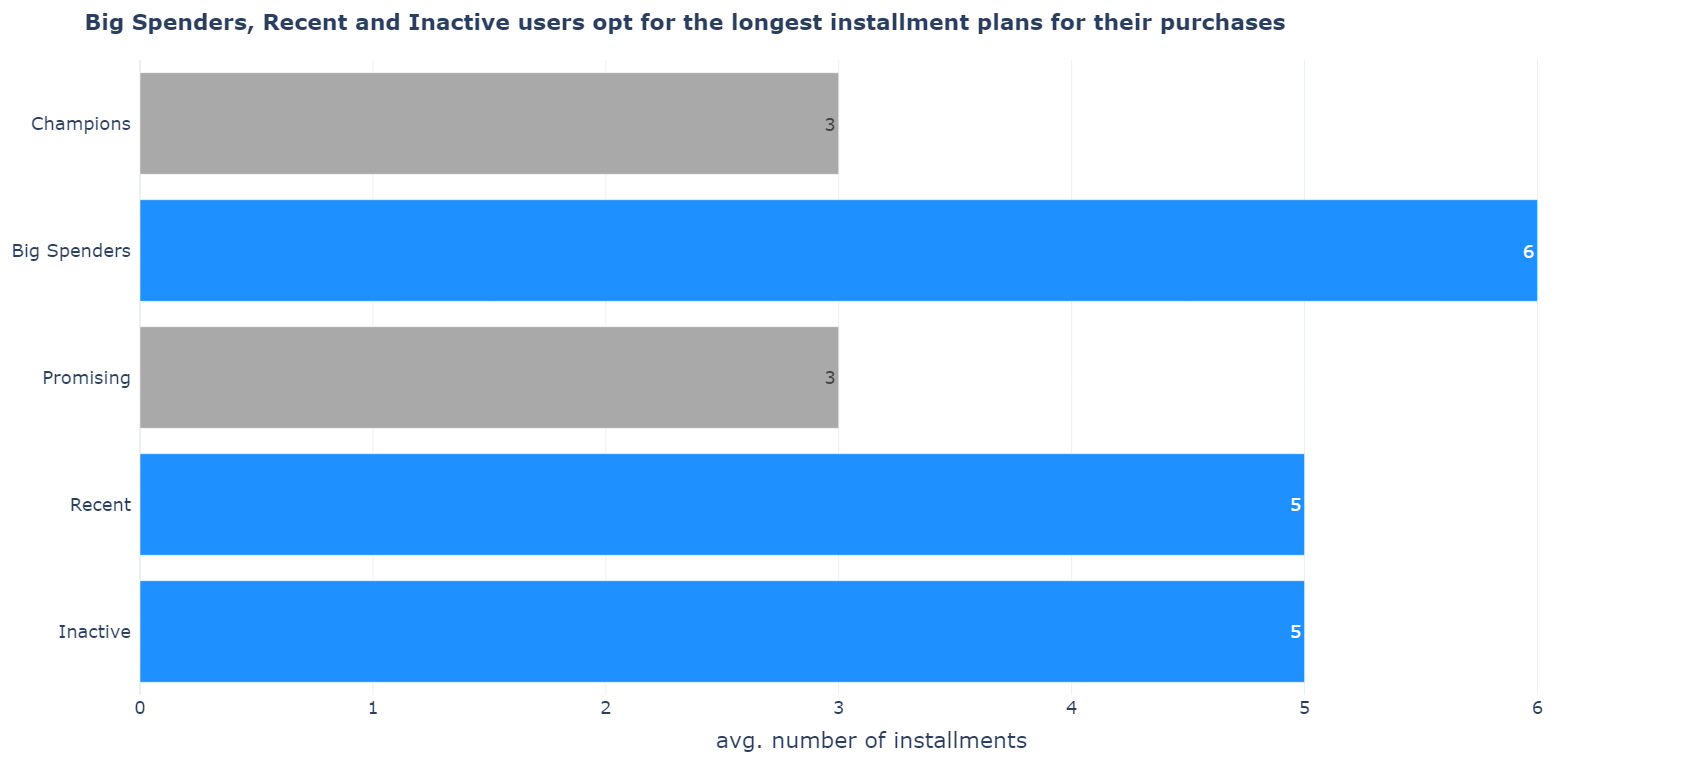

## Denied Transactions

**Notes:** Big Spenders, Recent and Inactive customers have a higher likelihood of transaction rejection

In [114]:
fig = px.box(
    df_user_transactions, 
    x="rate_denied", 
    y="rfm_segment_desc",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_purple"], colors["dark_blue"], colors["dark_purple"], colors["dark_blue"], colors["dark_purple"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive customers have a higher likelihood of transaction rejection</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="transactions rejection rate (%)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)

fig.show()

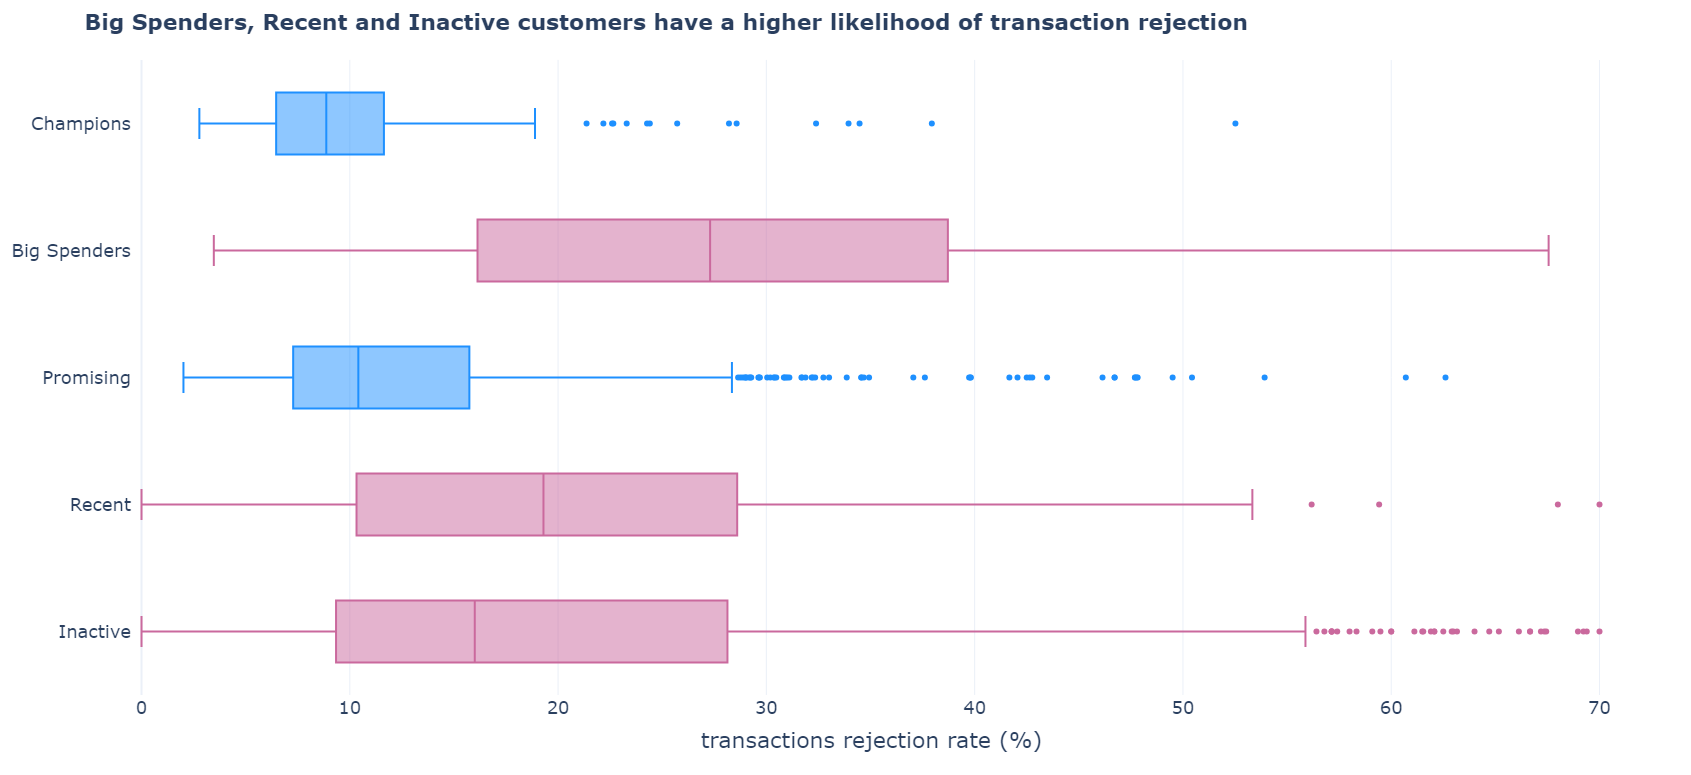

In [116]:
df = (
    df_user_transactions
    .groupby('rfm_segment_desc', as_index=False)
    .agg(avg_rate_denied=("rate_denied", "mean"))
)

fig = px.bar(
    df,
    y="rfm_segment_desc",
    x="avg_rate_denied",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_purple"], colors["dark_blue"], colors["dark_purple"], colors["dark_blue"], colors["dark_purple"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive customers have a higher likelihood of transaction rejection</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. transactions rejection rate (%)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)
fig.update_traces(
    texttemplate='%{x:.0f}%',
    textposition='inside'
)

fig.show()

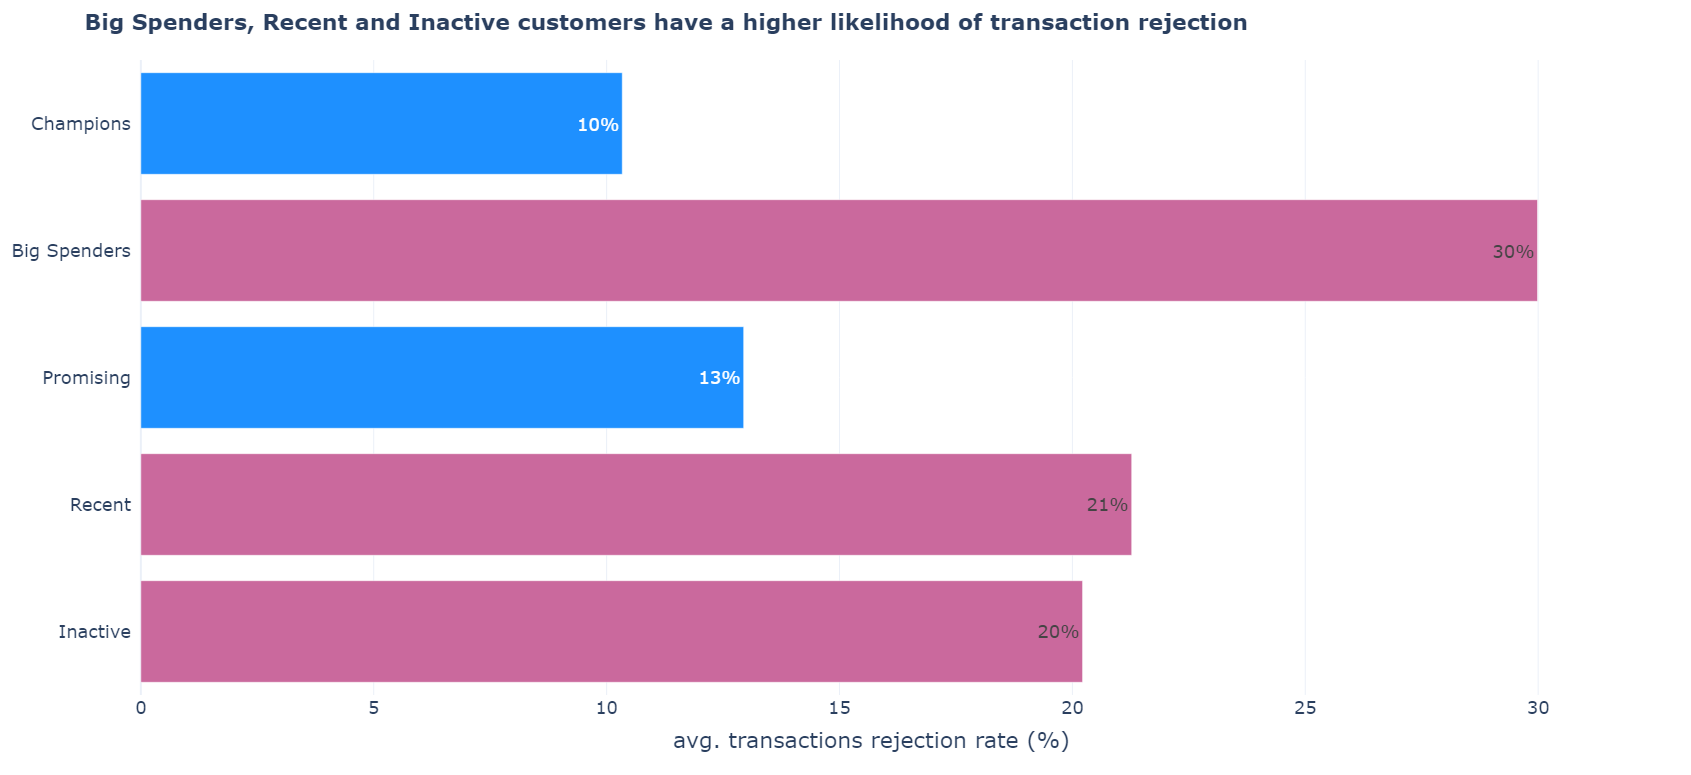

## Card Type Preference

**Notes:** All user segments, except for Champions, show a preference for using credit cards over debit cards for their purchases

In [119]:
labels = ["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]

fig = go.Figure([
    go.Bar(y=labels,
           x=[
               df_user_transactions[(df_user_transactions["rfm_segment_desc"] == label) & (df_user_transactions["preference_card_type"] == "credit")]["user_id"].count() \
               / df_user_transactions[df_user_transactions["rfm_segment_desc"] == label]["user_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_green"],
           orientation="h",
           name="credit card"),
    go.Bar(y=labels,
           x=[
               df_user_transactions[(df_user_transactions["rfm_segment_desc"] == label) & (df_user_transactions["preference_card_type"] == "debit")]["user_id"].count() \
               / df_user_transactions[df_user_transactions["rfm_segment_desc"] == label]["user_id"].count() 
               for label in labels
           ],
           marker_color=colors["medium_green"],
           orientation="h",
           name="debit card")
])

fig.update_layout(
    title="<b>All user segments, except for Champions,<br>show a preference for using credit cards over debit cards for their purchases</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of users",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0%}",
    textposition="outside"
)

fig.show()

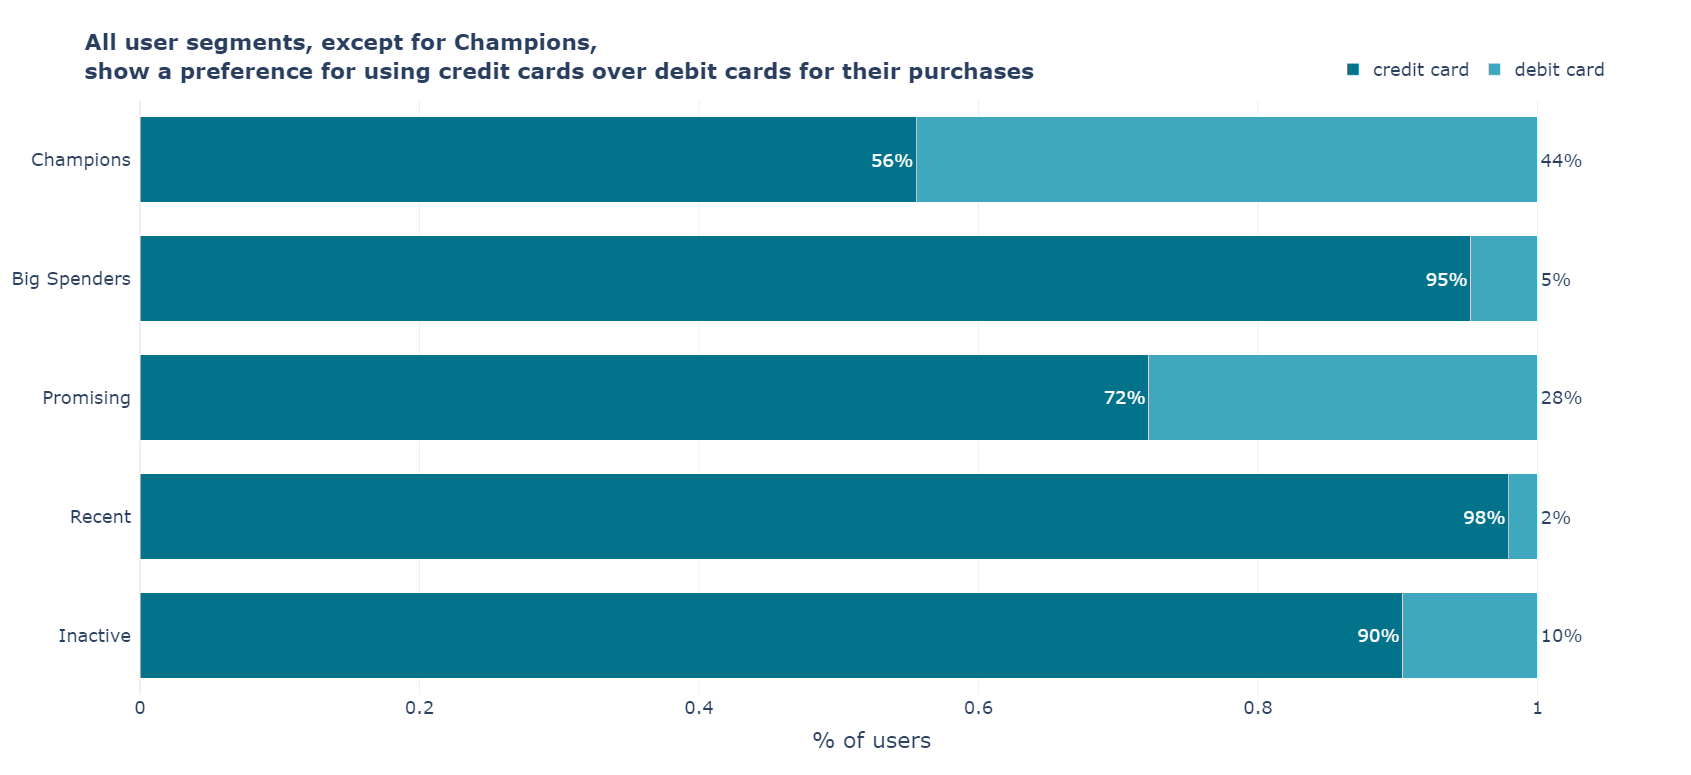

## Purchases Mode

**Notes:** Big Spenders have a slight preference for online purchases

In [122]:
labels = ["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]

fig = go.Figure([
    go.Bar(y=labels,
           x=[
               df_user_transactions[(df_user_transactions["rfm_segment_desc"] == label) & (df_user_transactions["preference_purchase_mode"] == "in-person")]["user_id"].count() \
               / df_user_transactions[df_user_transactions["rfm_segment_desc"] == label]["user_id"].count() 
               for label in labels
           ],
           marker_color=colors["medium_green"],
           orientation="h",
           name="in-person purchases"),
    go.Bar(y=labels,
           x=[
               df_user_transactions[(df_user_transactions["rfm_segment_desc"] == label) & (df_user_transactions["preference_purchase_mode"] == "online")]["user_id"].count() \
               / df_user_transactions[df_user_transactions["rfm_segment_desc"] == label]["user_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_green"],
           orientation="h",
           name="online purchases")
])

fig.update_layout(
    title="<b>Big Spenders have a slight preference for online purchases</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of users",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0%}",
    textposition="outside"
)

fig.show()

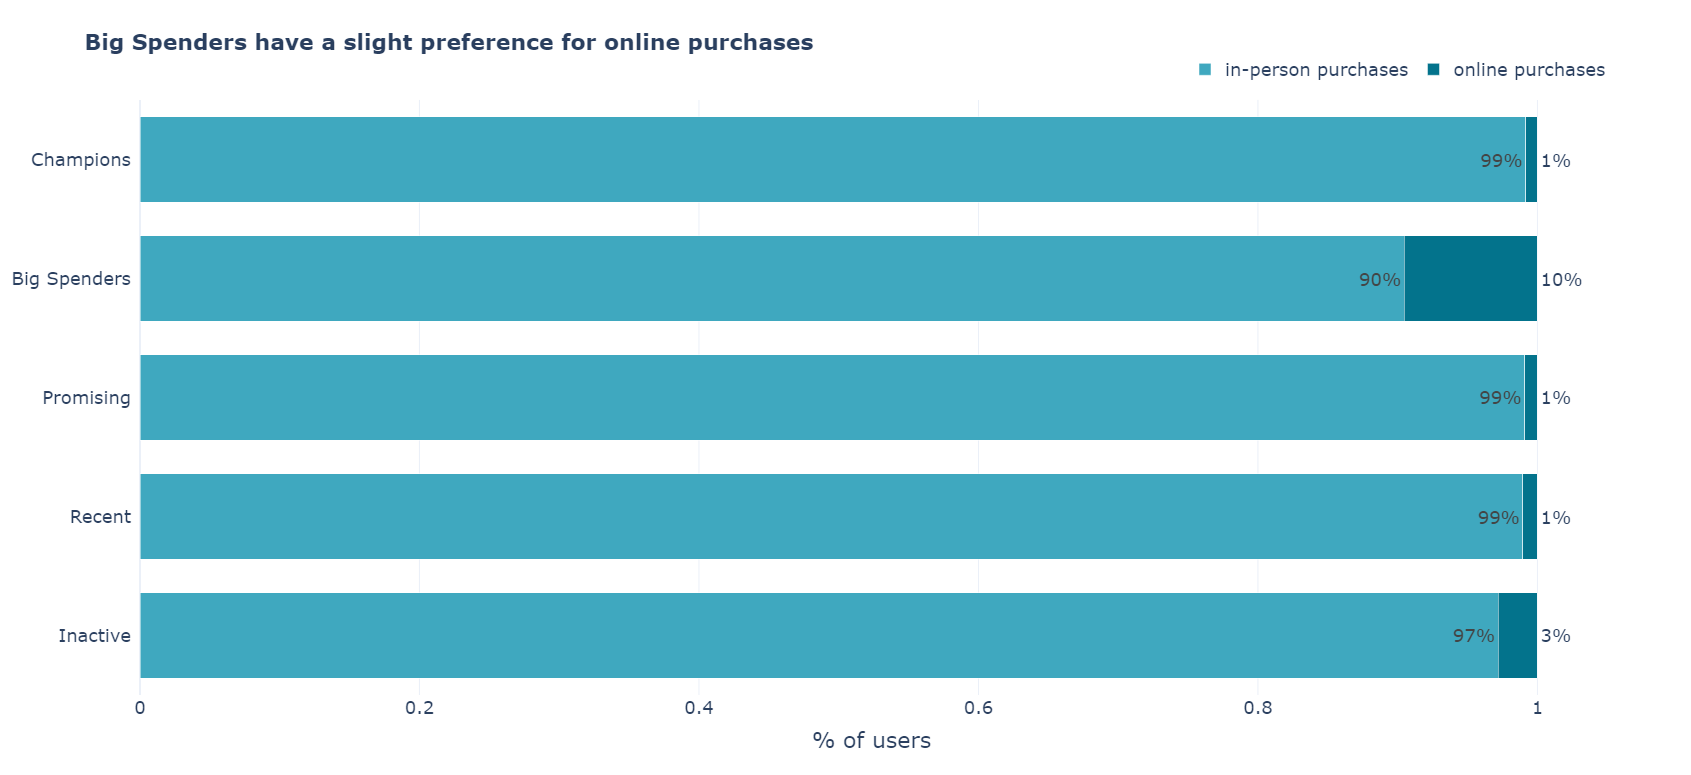

# Segment Repayment Behavior

In [125]:
df_user_repayments_overall = df_user_repayments_overall.merge(df_user_transactions[['user_id', 'rfm_segment_desc']], how="left", on="user_id")

## Loan Portfolio

**Notes:** 
- Compared to other segments, Recent users show a stronger preference for small and medium-sized loans
- Compared to other segments, Inactive users exclusively take loans with small interest rates

In [127]:
df_user_repayments_overall["user_pct_loans_small"] *= 100
df_user_repayments_overall["user_pct_loans_medium"] *= 100
df_user_repayments_overall["user_pct_loans_large"] *= 100

labels = ["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]

fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[df_user_repayments_overall["rfm_segment_desc"] == label]["user_pct_loans_small"].mean()
            for label in labels
        ],
        marker_color=colors["light_blue"],
        orientation="h",
        name="small-size loans"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[df_user_repayments_overall["rfm_segment_desc"] == label]["user_pct_loans_medium"].mean()
            for label in labels
        ],
        marker_color=colors["medium_blue"],
        orientation="h",
        name="medium-size loans"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[df_user_repayments_overall["rfm_segment_desc"] == label]["user_pct_loans_large"].mean()
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="large-size loans"
    ),
])

fig.update_layout(
    title="<b>Compared to other segments, Recent users<br>show a stronger preference for small and medium-sized loans</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. % of loans",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

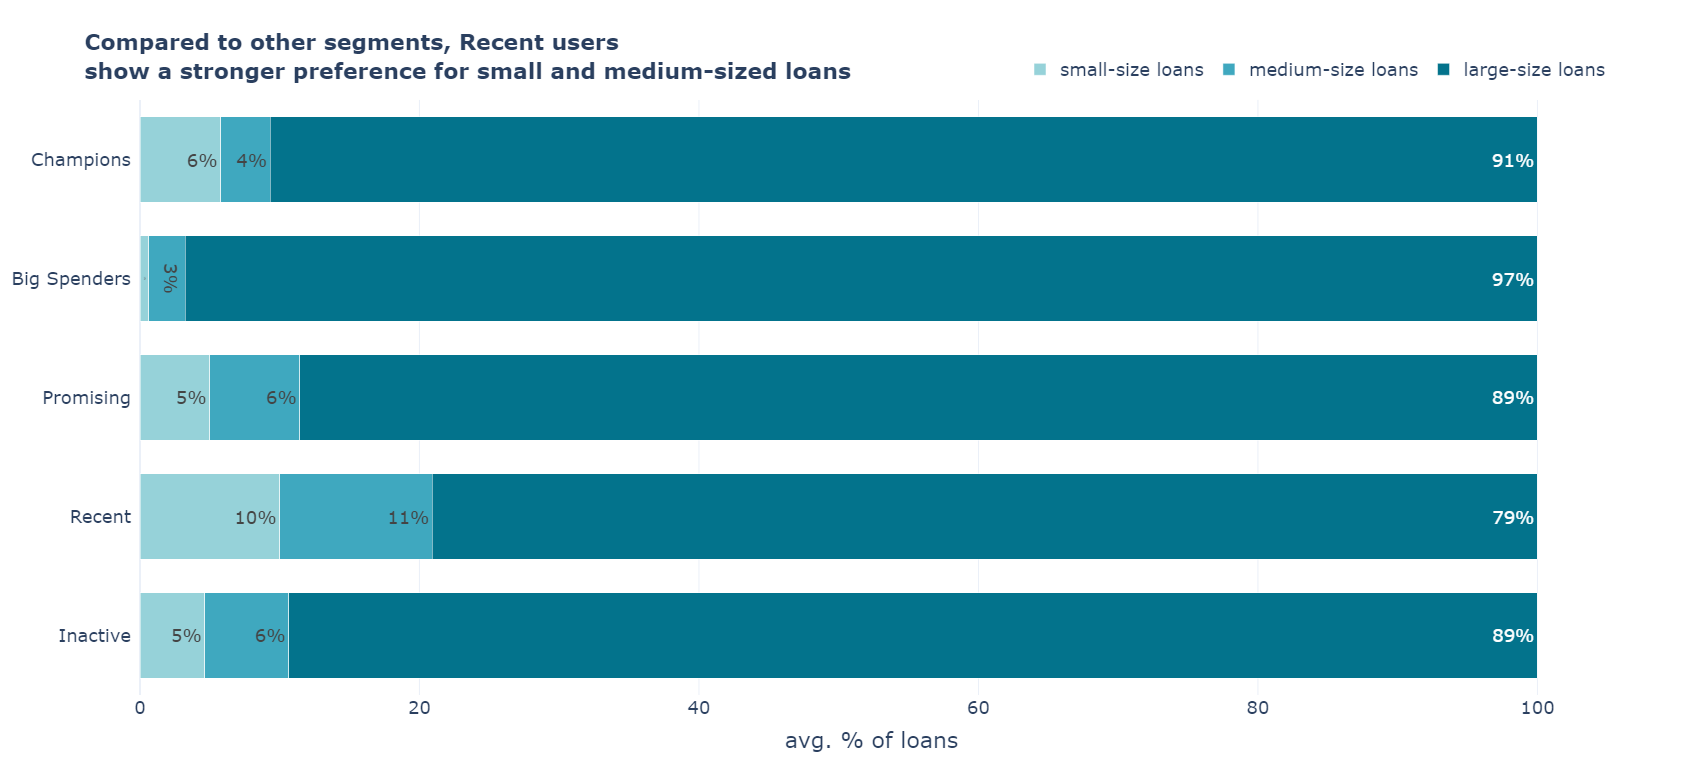

In [129]:
df_user_repayments_overall["user_pct_int_rate_small"] *= 100
df_user_repayments_overall["user_pct_int_rate_medium"] *= 100
df_user_repayments_overall["user_pct_int_rate_large"] *= 100
 
labels = ["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]

fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[df_user_repayments_overall["rfm_segment_desc"] == label]["user_pct_int_rate_small"].mean()
            for label in labels
        ],
        marker_color=colors["light_green"],
        orientation="h",
        name="small interest rate"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[df_user_repayments_overall["rfm_segment_desc"] == label]["user_pct_int_rate_medium"].mean()
            for label in labels
        ],
        marker_color=colors["medium_green"],
        orientation="h",
        name="medium interest rate"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[df_user_repayments_overall["rfm_segment_desc"] == label]["user_pct_int_rate_large"].mean()
            for label in labels
        ],
        marker_color=colors["dark_green"],
        orientation="h",
        name="large interest rate"
    ),
])

fig.update_layout(
    title="<b>Compared to other segments, Inactive users<br>exclusively take loans with small interest rates</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. % of loans",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

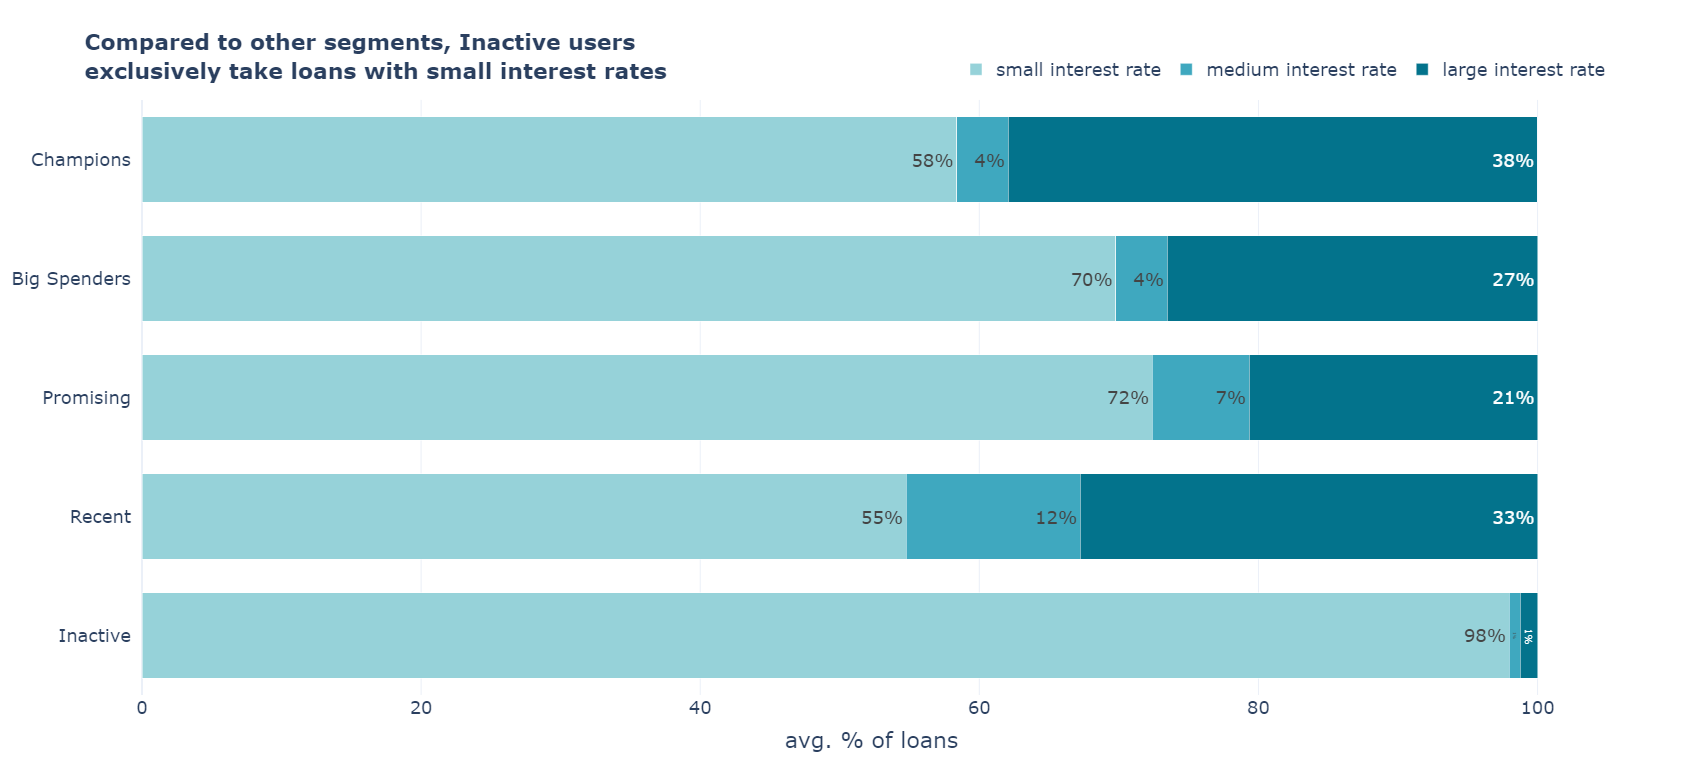

## Debt

**Notes:** 
- Inactive users present a greater risk of incurring loan debt
- Recent and Inactive users in debt, can potentially owe more than 50% of the loan amount

In [132]:
df_user_repayments_overall["loan_debt"] = "paid"
df_user_repayments_overall.loc[df_user_repayments_overall["user_ratio_unpaid_loans"] > 0, "loan_debt"] = "debt"

In [133]:
fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["loan_debt"] == "debt")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_purple"],
        orientation="h",
        name="unpaid loans"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["loan_debt"] == "paid")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="paid loans"
    ),
])

fig.update_layout(
    title="<b>Inactive users present a greater risk of incurring loan debt</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of loans",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

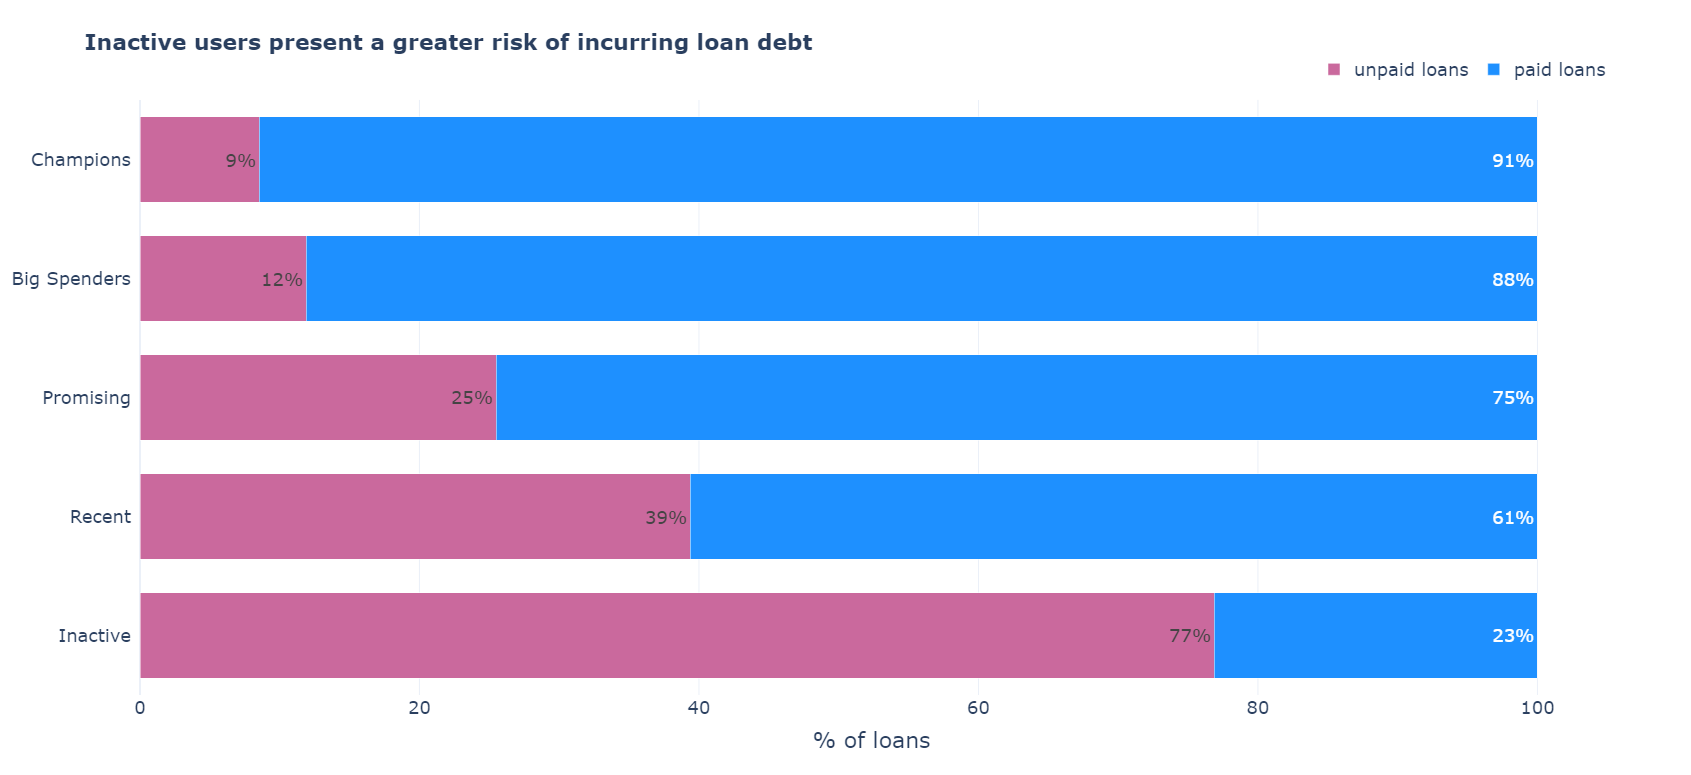

In [135]:
fig = px.box(
    df_user_repayments_overall[(df_user_repayments_overall["loan_debt"] == "debt") & (df_user_repayments_overall["user_avg_pct_debt"] > 0)], 
    x="user_avg_pct_debt", 
    y="rfm_segment_desc",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_purple"], colors["dark_blue"], colors["dark_blue"], colors["dark_purple"], colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Recent and Inactive users in debt, can potentially owe more than 50% of the loan amount</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. debt (%)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)

fig.show()

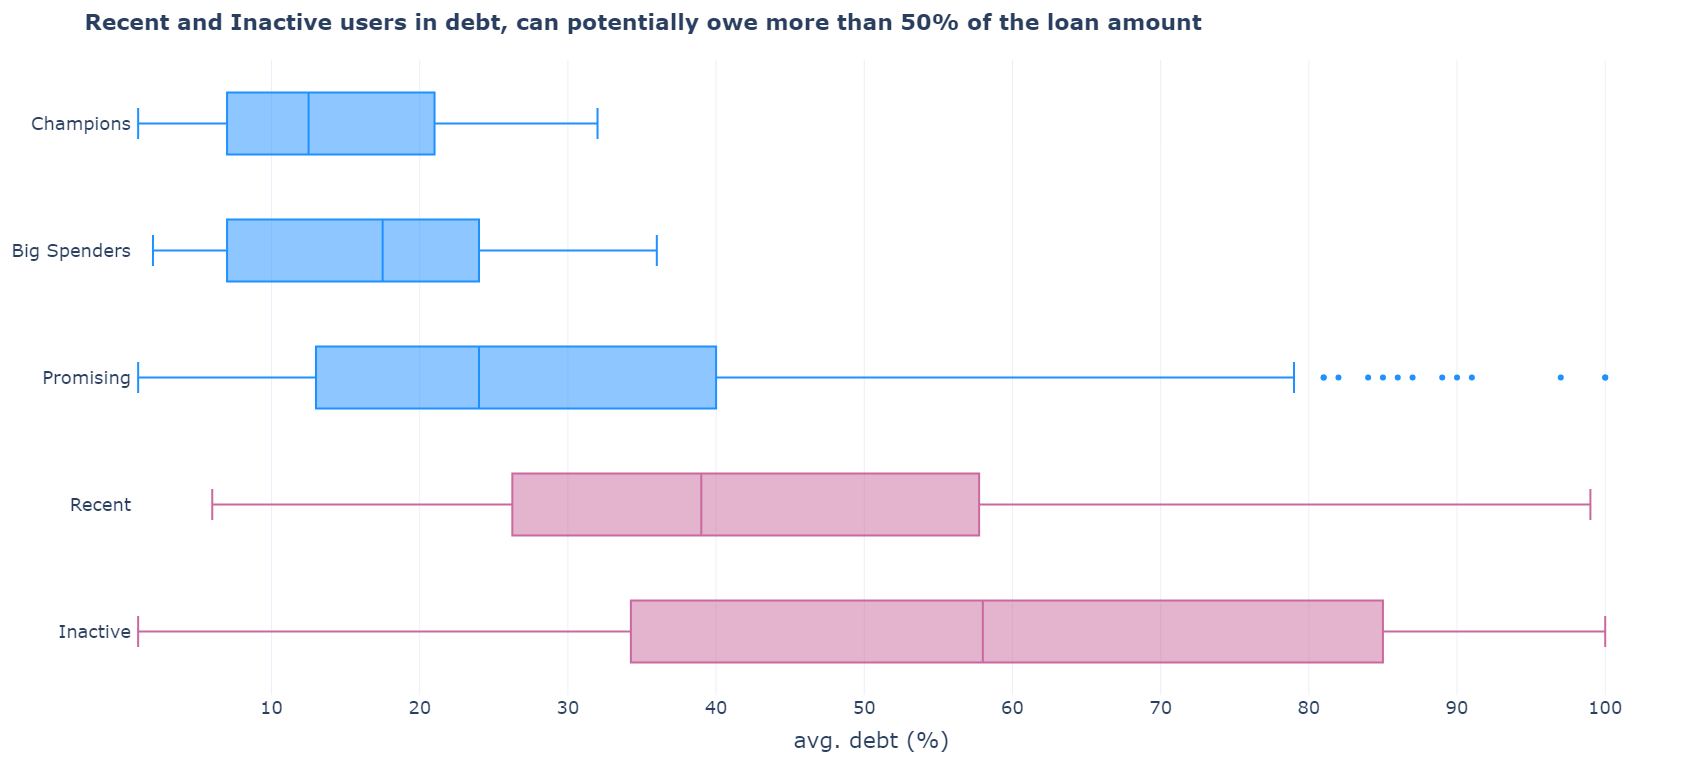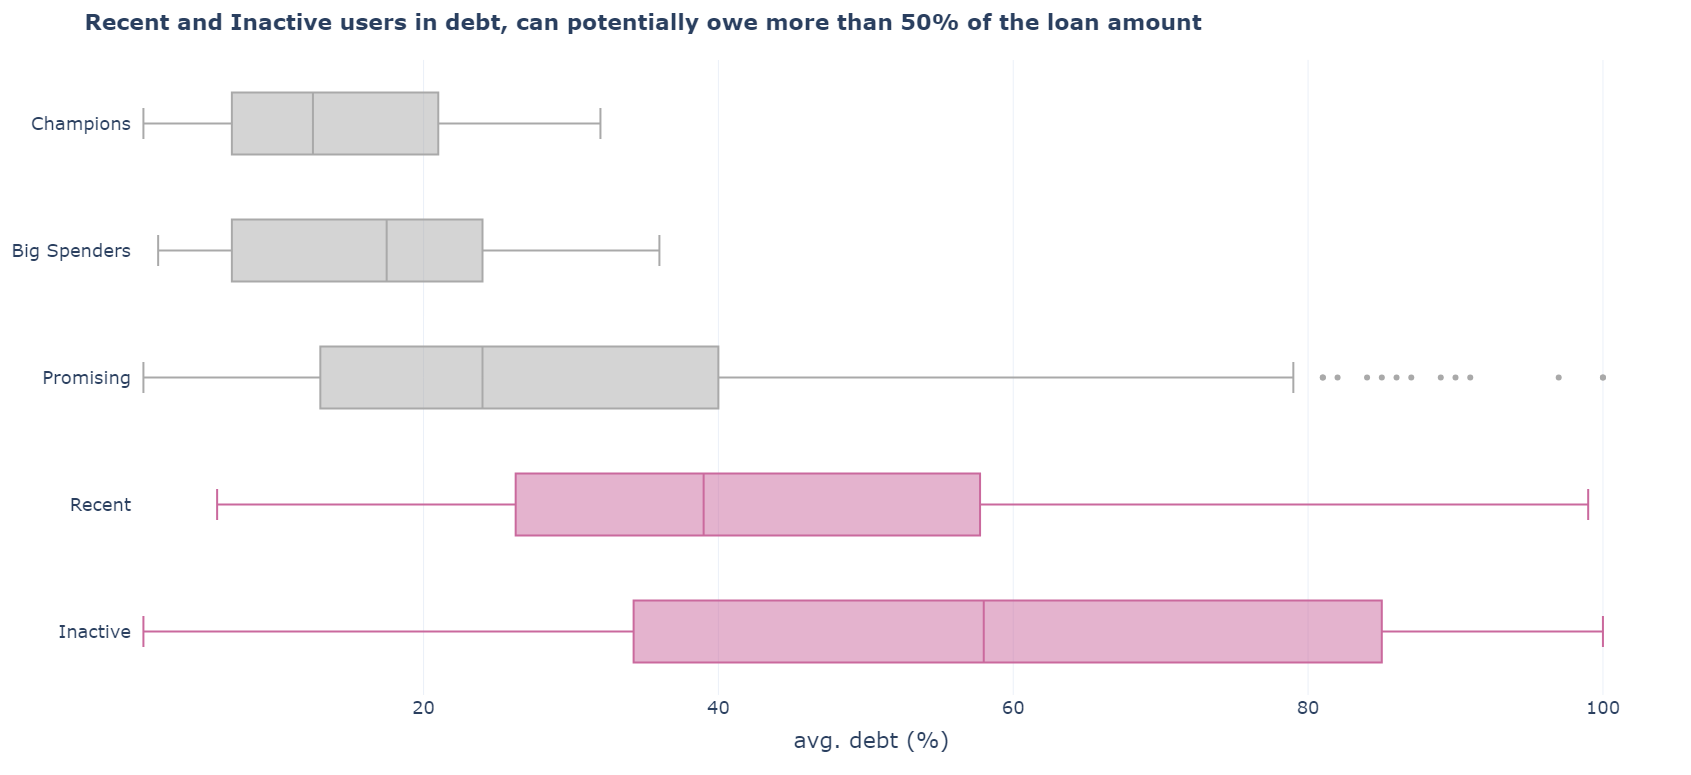

## Repayments

**Notes:** 
- Champions and Promising users typically break down their loan repayment into multiple small repayments over time
- Big Spenders, Recent and Inactive users typically break down their loan repayment into less and bigger repayments over time
- Users, regardles of the segment they belong to, have frequent repayments

In [138]:
fig = px.box(
    df_user_repayments_overall, 
    x="user_avg_num_repayments", 
    y="rfm_segment_desc",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"]]
)

fig.update_layout(
    title='<b>Champions and Promising users typically break down their loan repayment<br>into multiple repayments over time</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. number of repayments",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)

fig.show()

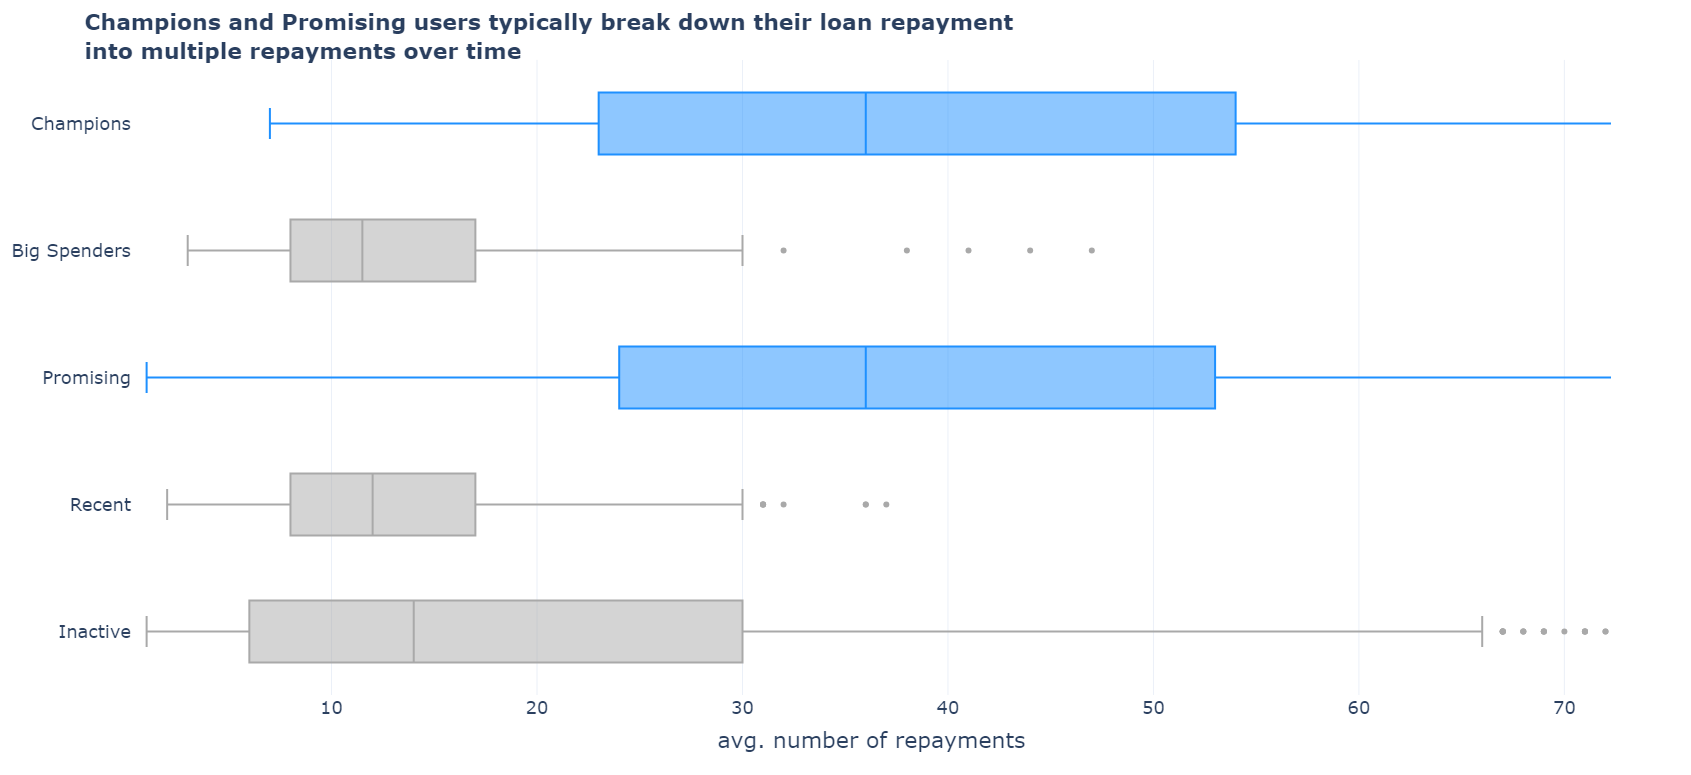

In [140]:
df = (
    df_user_repayments_overall
    .groupby('rfm_segment_desc', as_index=False)
    .agg(avg_num_repayments=("user_avg_num_repayments", "mean"))
)

fig = px.bar(
    df,
    y="rfm_segment_desc",
    x="avg_num_repayments",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"]]
)

fig.update_layout(
    title='<b>Champions and Promising users typically break down their loan repayment<br>into multiple repayments over time</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. number of repayments",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)
fig.update_traces(
    texttemplate='%{x:.0f}',
    textposition='inside'
)

fig.show()

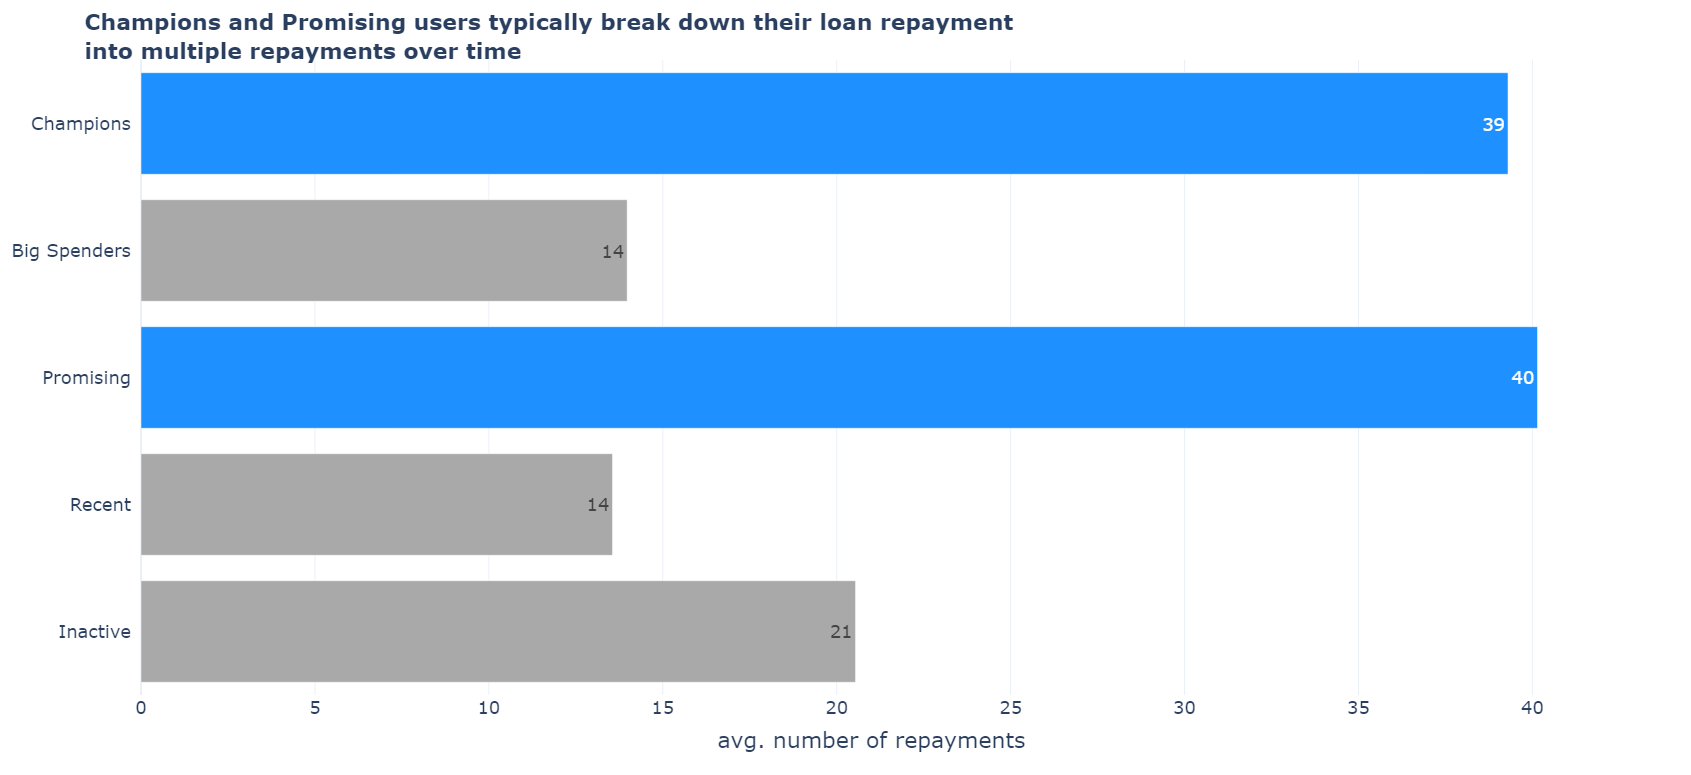

In [142]:
fig = px.box(
    df_user_repayments_overall, 
    x="user_avg_repayment_amount", 
    y="rfm_segment_desc",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive users typically<br>break down their loan repayment into bigger repayments over time</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. repayment amount (R$)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)

fig.show()

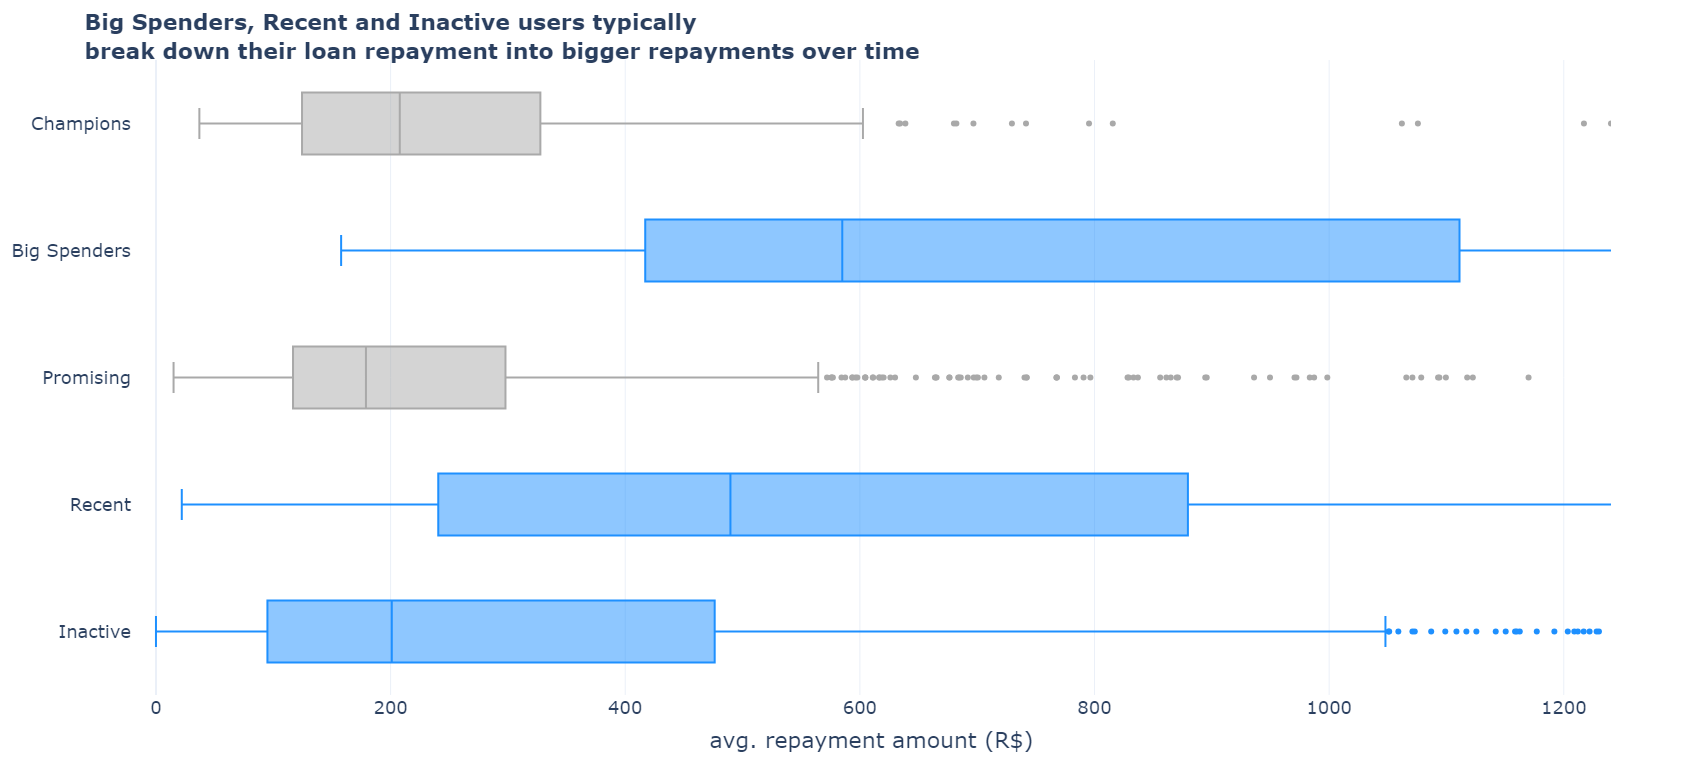

In [144]:
df = (
    df_user_repayments_overall
    .groupby('rfm_segment_desc', as_index=False)
    .agg(avg_repayment_amount=("user_avg_repayment_amount", "mean"))
)

fig = px.bar(
    df,
    y="rfm_segment_desc",
    x="avg_repayment_amount",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_gray"], colors["dark_blue"], colors["dark_gray"], colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Big Spenders, Recent and Inactive users typically<br>break down their loan repayment into bigger repayments over time</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. repayment amount (R$)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)
fig.update_traces(
    texttemplate='%{x:.0f}',
    textposition='inside'
)

fig.show()

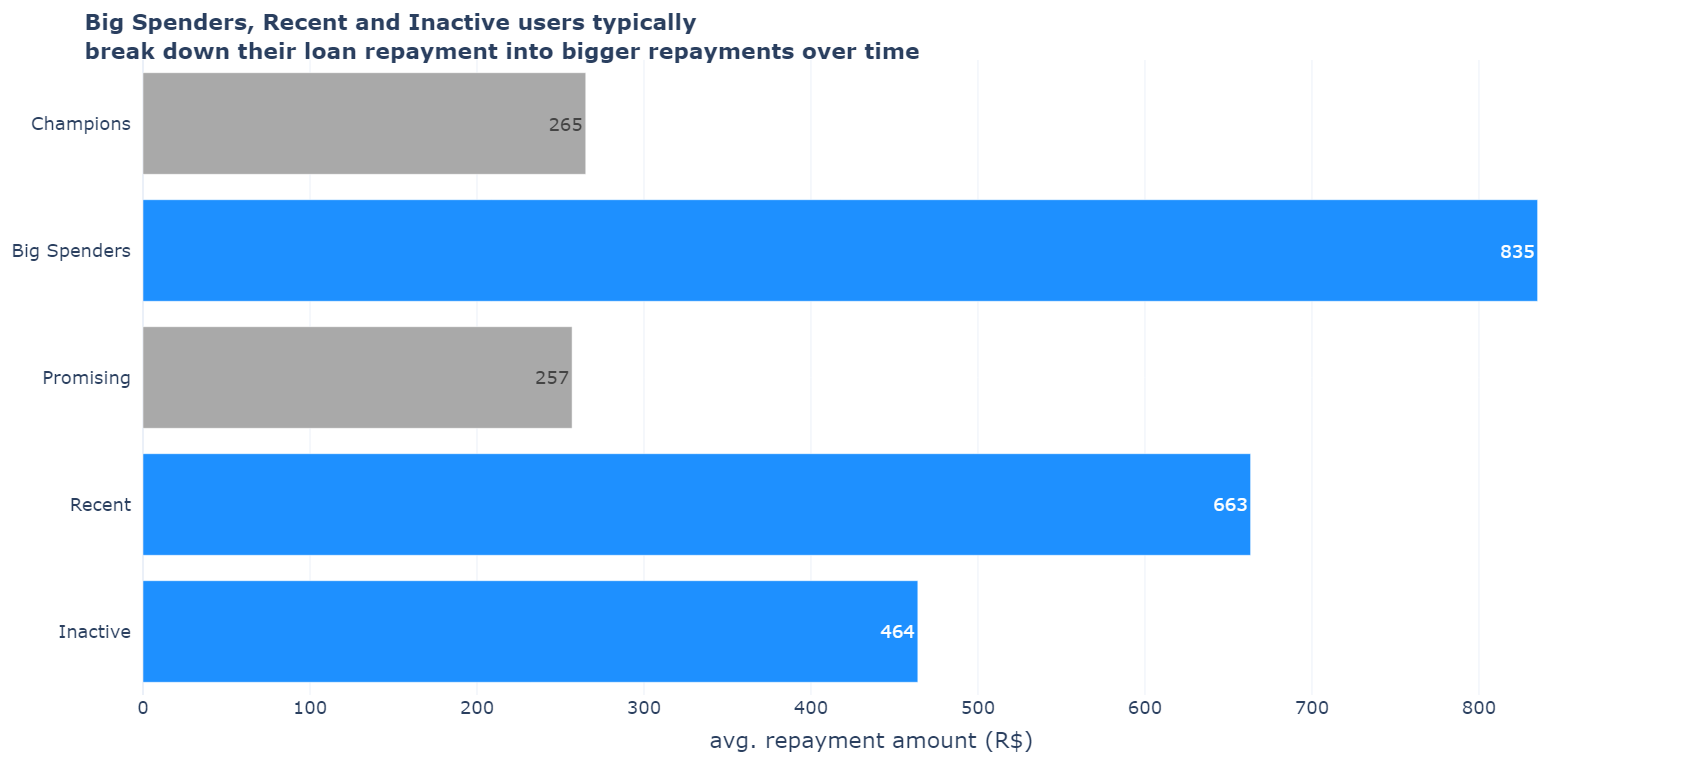

In [146]:
# Users, regardles of the segment they belong to, have frequent repayments
df_user_repayments_overall.groupby("rfm_segment_desc", as_index=False)["user_avg_lag_repayment"].describe()

rfm_segment_desc   count      mean       std  min  25%  50%   75%    max
0     Big Spenders    84.0  4.309524  2.862201  1.0  3.0  4.0   5.0   22.0
1        Champions   234.0  2.162393  0.698954  1.0  2.0  2.0   2.0    9.0
2         Inactive  1453.0  7.397798  8.874161  0.0  3.0  5.0   8.0  104.0
3        Promising  1079.0  2.886932  2.100050  1.0  2.0  2.0   3.0   36.0
4           Recent   193.0  7.860104  4.409520  1.0  5.0  7.0  10.0   30.0

## User Default Rate

**Notes:**
- Frequent users exhibit a higher tendency towards defaulting
- However, infrequent users exhibit higher repayment uncertainty

In [148]:
fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["has_defaulted"] == "has defaulted")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_purple"],
        orientation="h",
        name="has defaulted"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["has_defaulted"] == "hasn't defaulted")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="hasn't defaulted"
    ),
])

fig.update_layout(
    title="<b>Frequent users exhibit a higher tendency towards defaulting</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of users",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

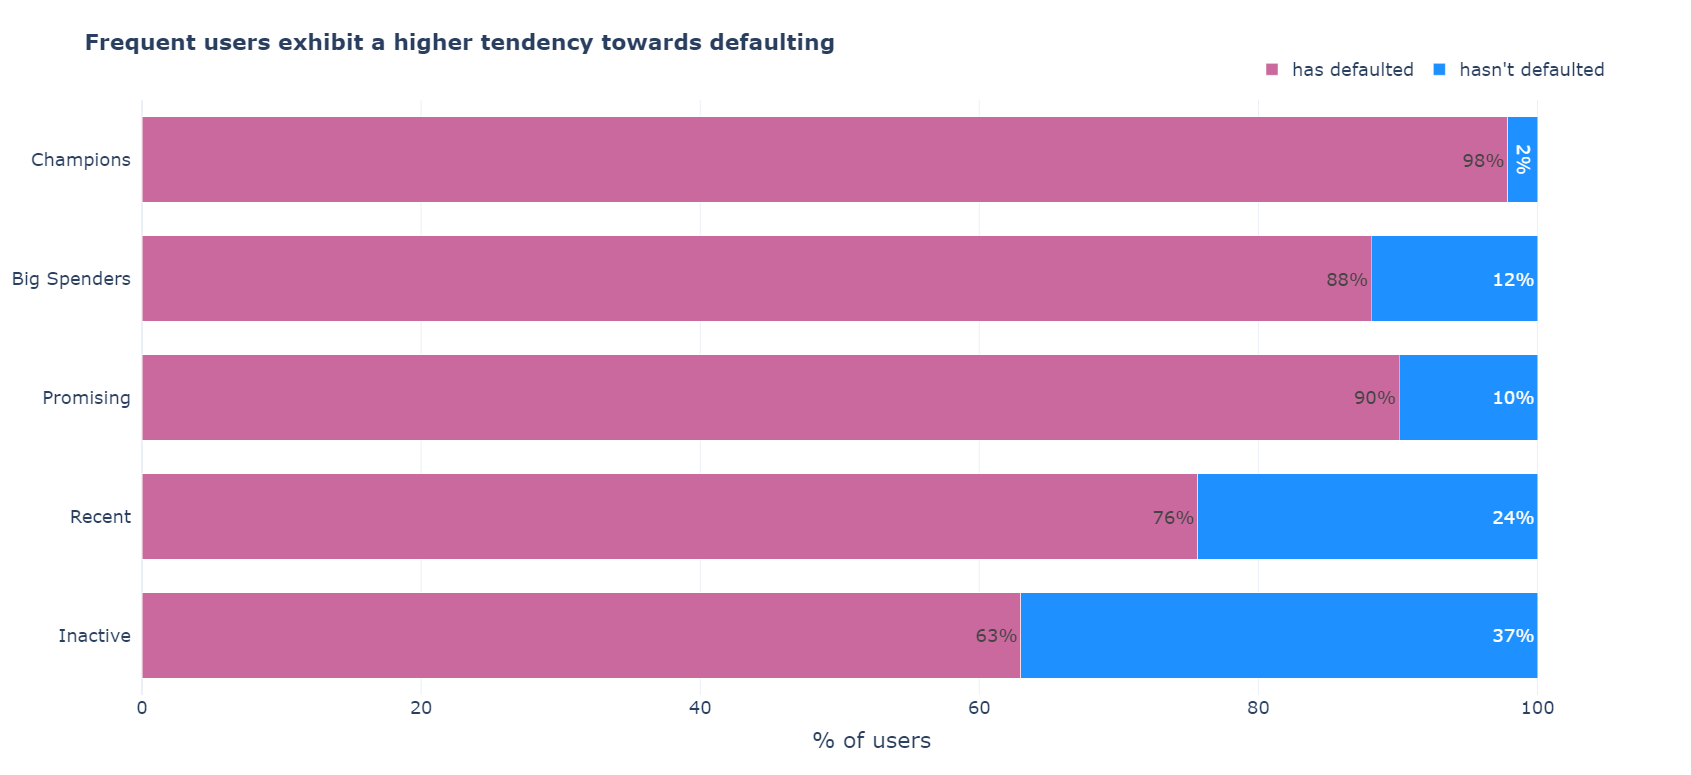

In [150]:
fig = px.box(
    df_user_repayments_overall[df_user_repayments_overall["has_defaulted"] == "has defaulted"], 
    x="user_avg_rate_default", 
    y="rfm_segment_desc",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_purple"], colors["dark_blue"], colors["dark_blue"], colors["dark_blue"], colors["dark_purple"]]
)

fig.update_layout(
    title='<b>Infrequent users exhibit higher repayment uncertainty</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="avg. default rate (%)",
    yaxis_title=None,
    showlegend=False,
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=['Inactive', 'Recent', 'Promising', 'Big Spenders', 'Champions',]
)

fig.show()

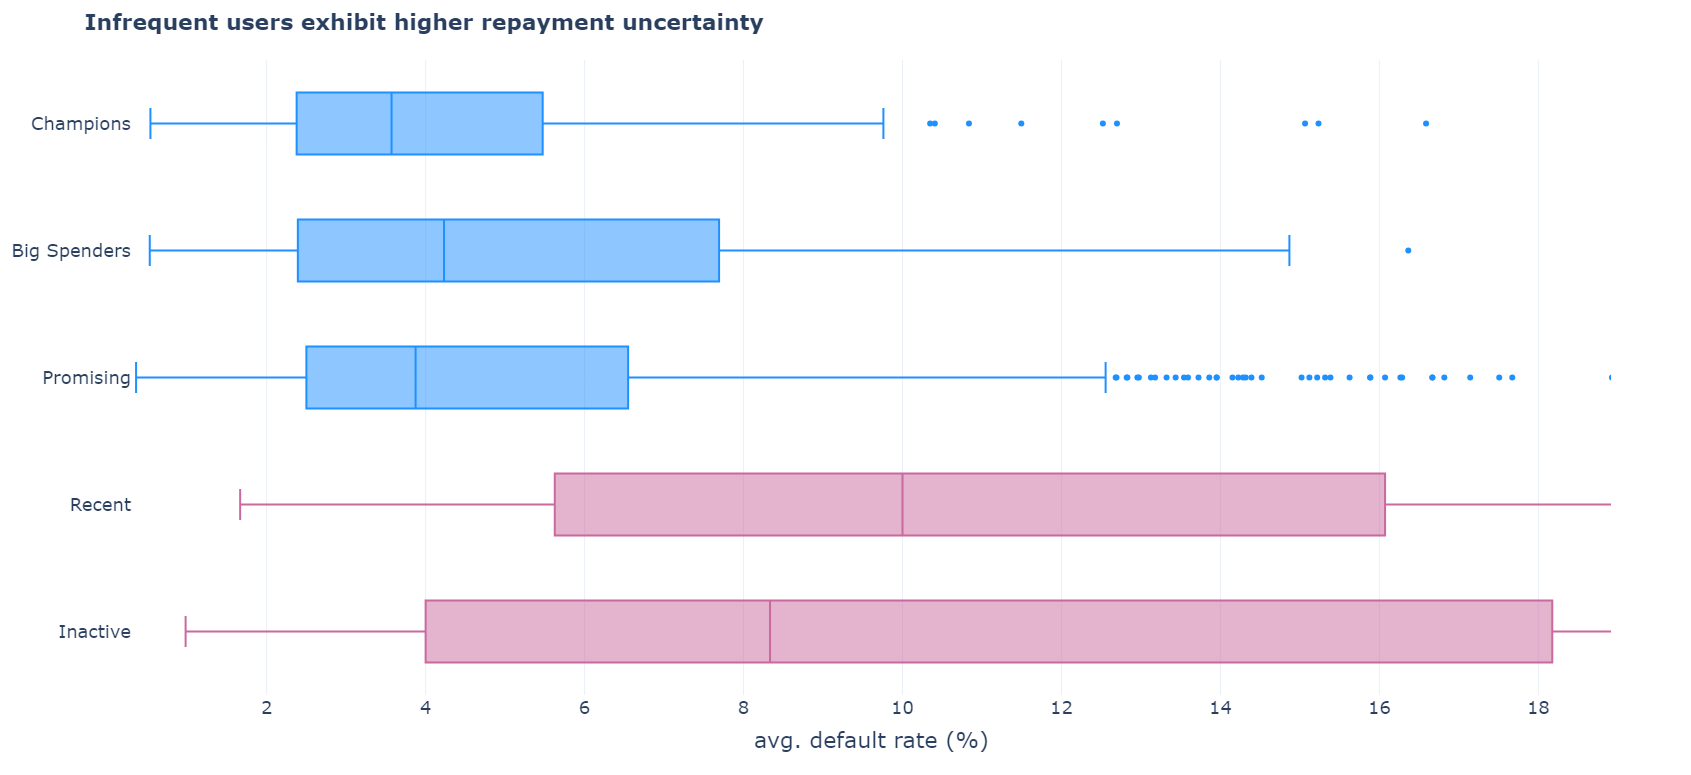

## User Overdue

**Notes:** Customers with low to moderate spending habits are likely to fall behind the due date

In [153]:
fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["has_exceeded_due_date"] == "overdue")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_purple"],
        orientation="h",
        name="overdue"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["has_exceeded_due_date"] == "on time")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="on time"
    ),
])

fig.update_layout(
    title="<b>Users with low to moderate spending habits are likely to fall behind the due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of users",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

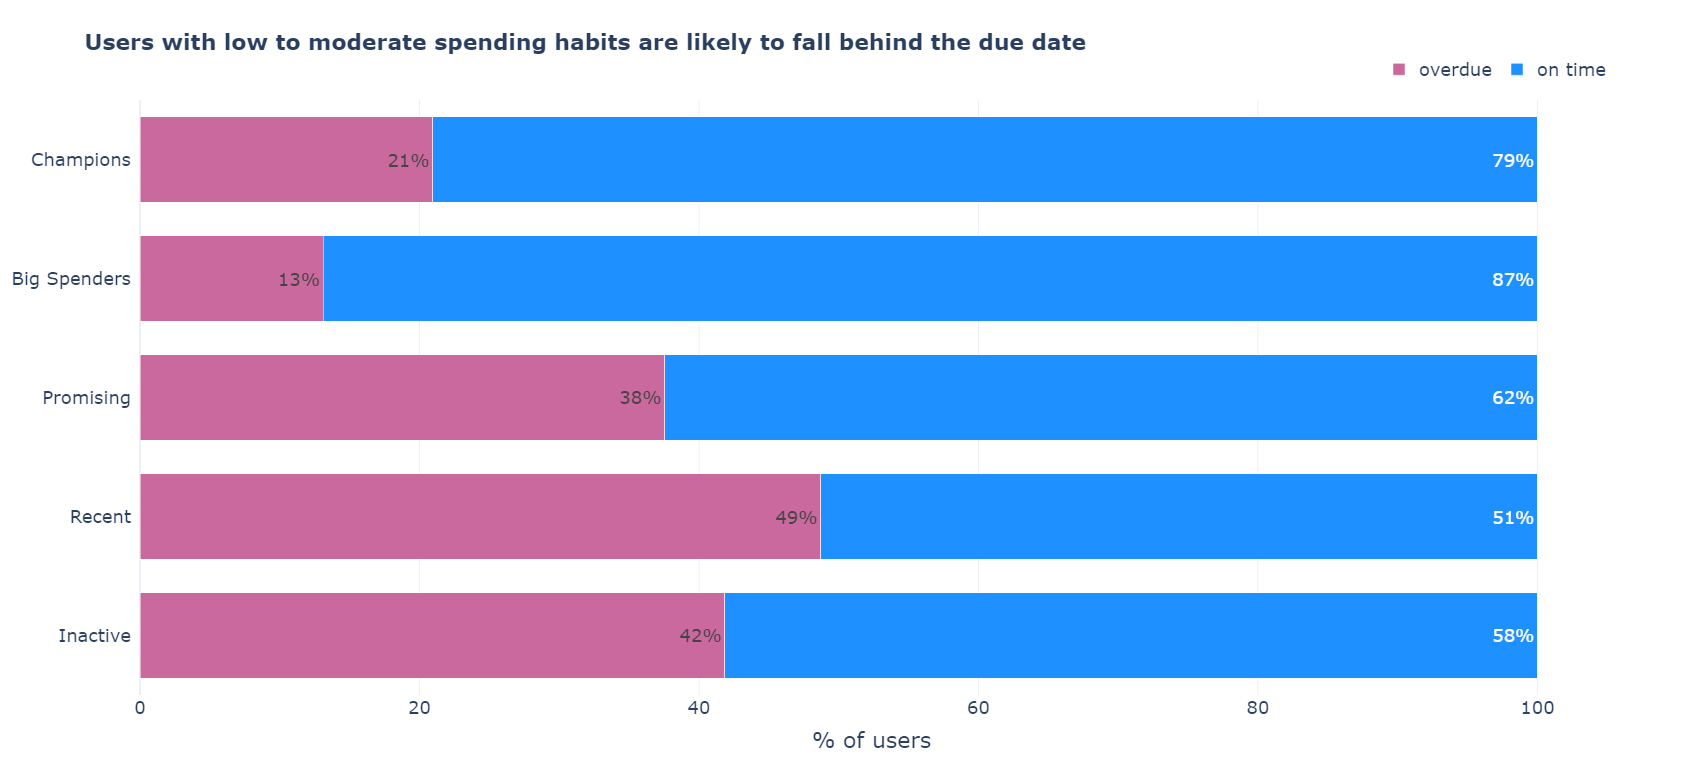

## Repayment Type Preference

**Notes:** Infrequent users prefer manual repayments over an automated plan

In [156]:
fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["preference_repayment_type"] == "manual")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_green"],
        orientation="h",
        name="manual repayments"
    ),
    go.Bar(
        y=labels,
        x=[
            df_user_repayments_overall[
                (df_user_repayments_overall["rfm_segment_desc"] == label) & 
                (df_user_repayments_overall["preference_repayment_type"] == "automated")
            ]["user_id"].count() / \
            df_user_repayments_overall[
                df_user_repayments_overall["rfm_segment_desc"] == label
            ]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["medium_green"],
        orientation="h",
        name="automated repayments"
    ),
])

fig.update_layout(
    title="<b>Infrequent users prefer manual repayments over an automated plan</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of users",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

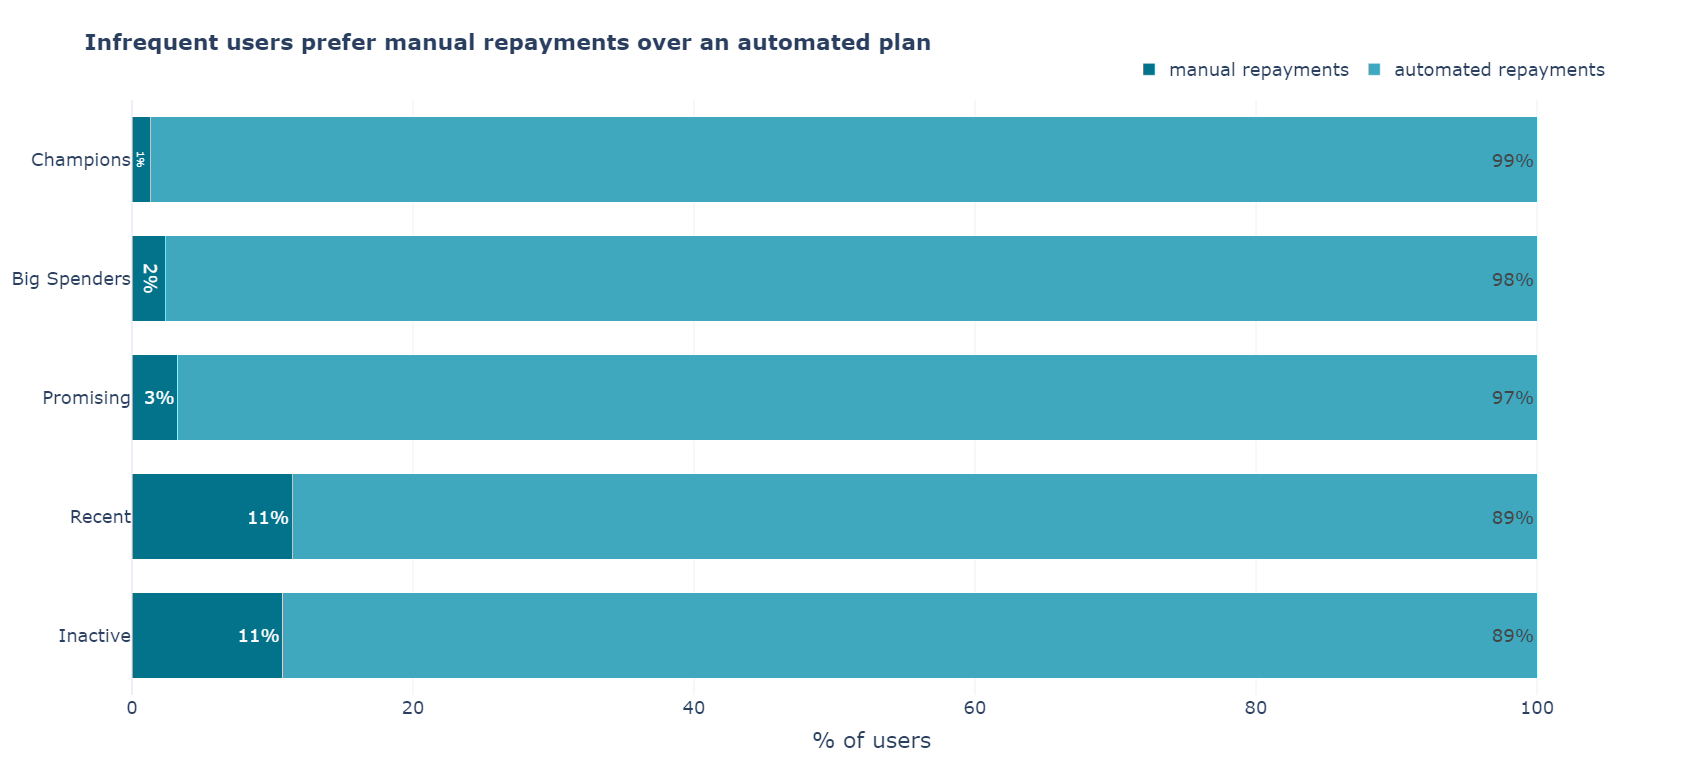

# Segment Loan Eligibility

In [159]:
df_loans = df_loans[['id', 'user_id', 'created_at', 'loan_quality', 'status_cleaned', 'loan_term', 'loan_fees', 'principal_amount_cat', 'interest_rate_cat']]

df_user_repayments_overall = df_user_repayments_overall[['user_id', 'loan_debt', 'user_ratio_unpaid_loans', 'user_avg_pct_debt', 'user_avg_num_repayments',
                                                         'user_avg_repayment_amount', 'user_avg_lag_repayment', 'has_defaulted', 'user_avg_rate_default',
                                                         'has_exceeded_due_date', 'user_rate_due_date_exceeded', 'user_avg_max_repayment_delay',
                                                         'preference_repayment_type', 'user_avg_rate_manual_repayments',]]

df_user_transactions = df_user_transactions[['user_id', 'rfm_segment_desc', 'rate_denied', 'preference_purchase_mode', 'preference_purchase_online',]]

df_data = df_loans.merge(df_user_transactions, how="left", on="user_id")
df_data = df_data.merge(df_user_repayments_overall, how="left", on="user_id")

In [160]:
df_data = df_data[~df_data["rfm_segment_desc"].isna()]

## Loan Quality

**Note:** 
- Recent and Inactive users pose a significant lending risk
- Low-quality loans are more likely to lead to debt by Promising, Recent, and Inactive users

In [162]:
labels = ["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]

fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_data[(df_data["rfm_segment_desc"] == label) & (df_data["loan_quality"] == "low")]["id"].count() / \
            df_data[df_data["rfm_segment_desc"] == label]["user_id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_purple"],
        orientation="h",
        name="low quality loans"
    ),
    go.Bar(
        y=labels,
        x=[
            df_data[(df_data["rfm_segment_desc"] == label) & (df_data["loan_quality"] == "high")]["id"].count() / \
            df_data[df_data["rfm_segment_desc"] == label]["id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="high quality loans"
    ),
])

fig.update_layout(
    title="<b>Recent and Inactive users pose a significant lending risk</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of loans",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

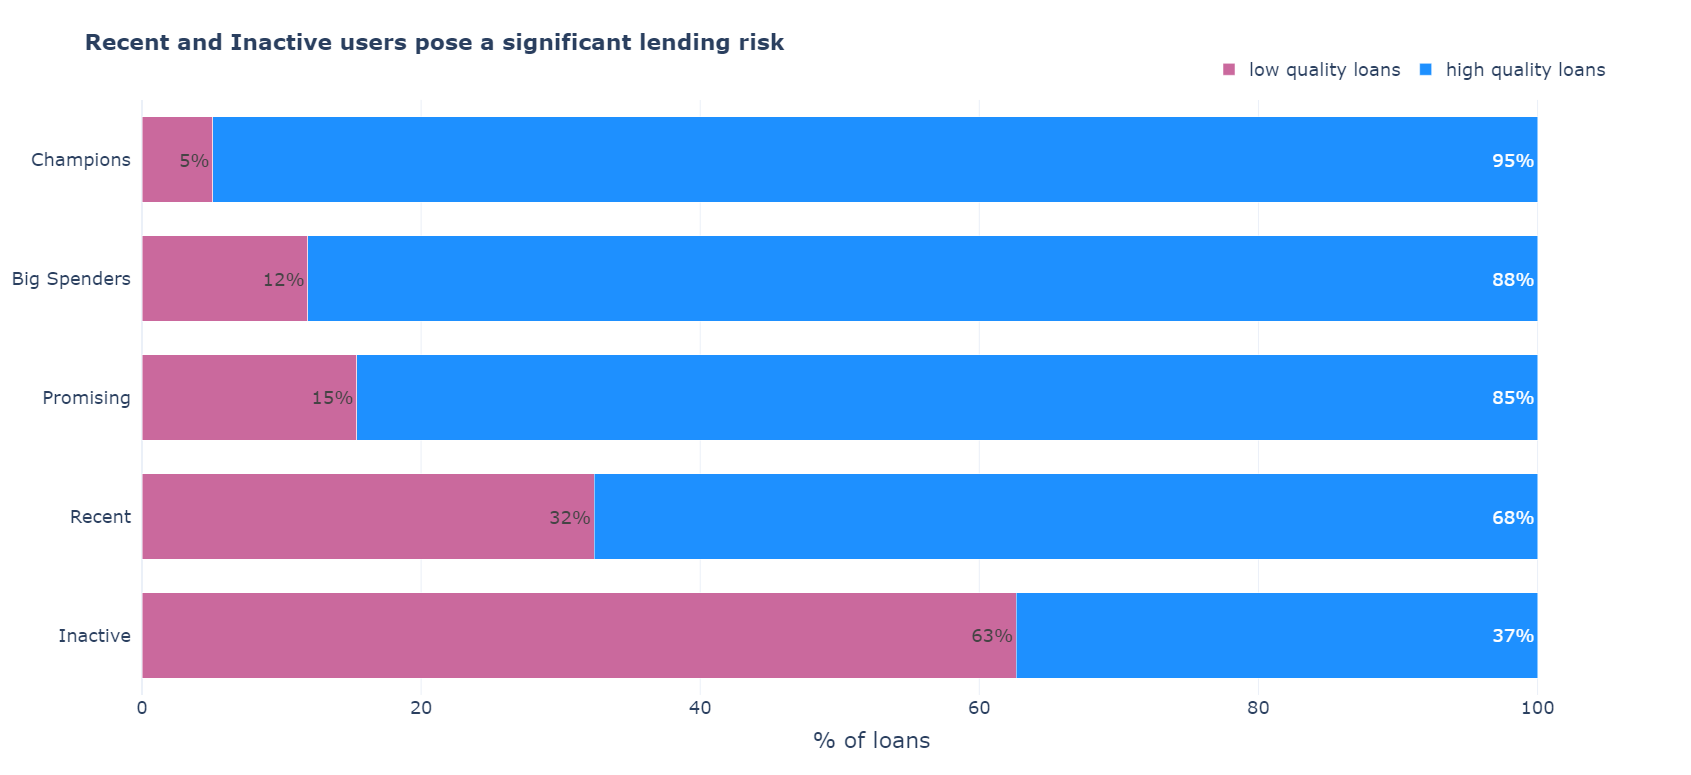

In [164]:
labels = ["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]

fig = go.Figure([
    go.Bar(
        y=labels,
        x=[
            df_data[(df_data["rfm_segment_desc"] == label) & (df_data["loan_quality"] == "low") & (df_data["status_cleaned"] == "debt")]["id"].count() / \
            df_data[(df_data["rfm_segment_desc"] == label) & (df_data["loan_quality"] == "low")]["id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_purple"],
        orientation="h",
        name="loan debt"
    ),
    go.Bar(
        y=labels,
        x=[
            df_data[(df_data["rfm_segment_desc"] == label) & (df_data["loan_quality"] == "low") & (df_data["status_cleaned"] == "repaid")]["id"].count() / \
            df_data[(df_data["rfm_segment_desc"] == label) & (df_data["loan_quality"] == "low")]["id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="repaid loans"
    )
])

fig.update_layout(
    title="<b>Low-quality loans are more likely to lead to debt by Promising, Recent, and Inactive users</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of low quality loans",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

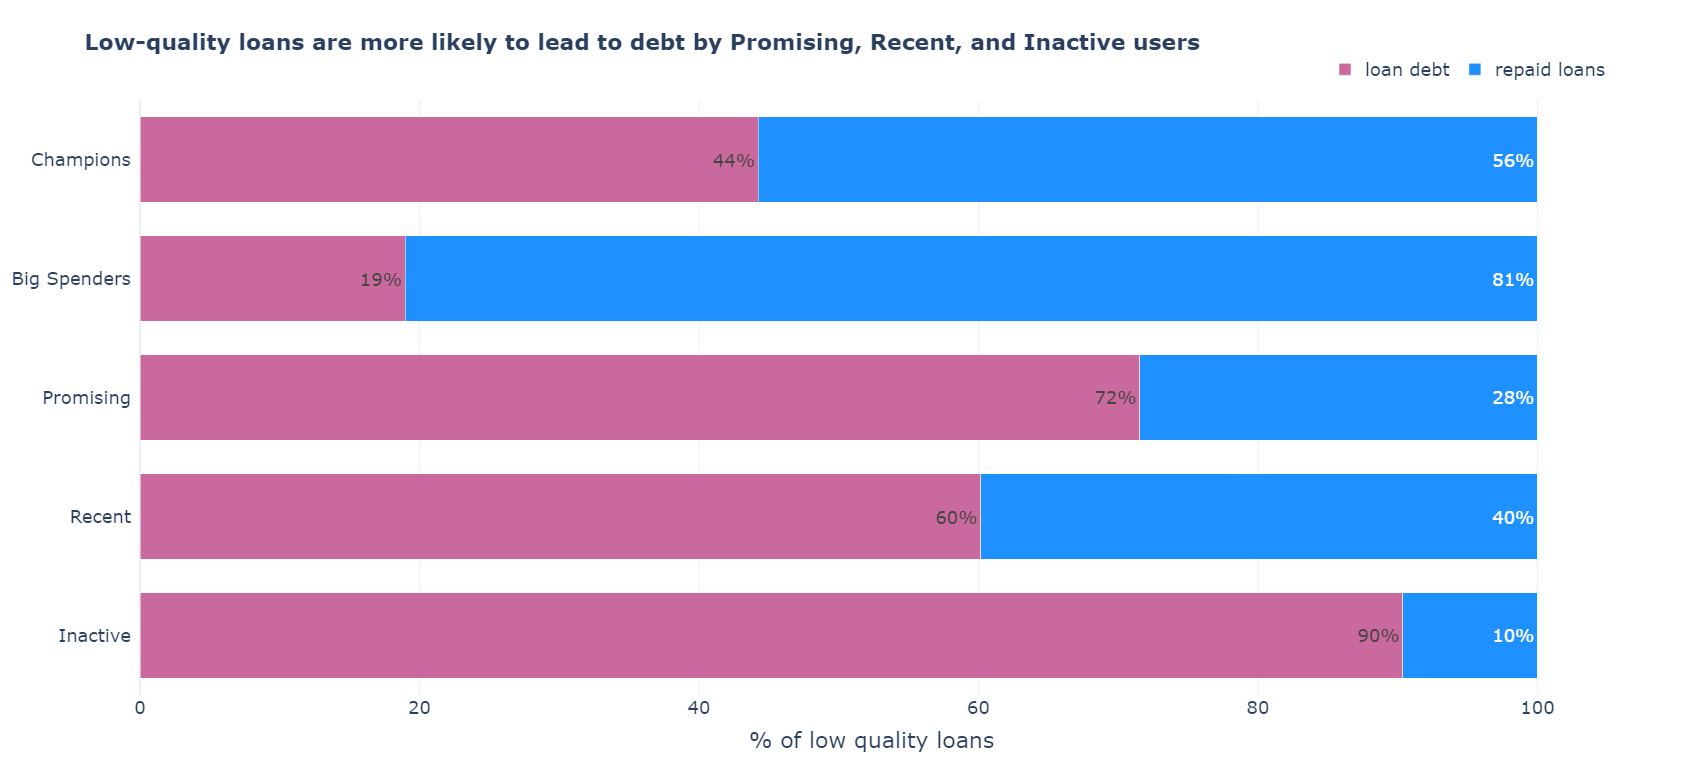

## Loan Portfolio

**Note:** 
- Risk increases as the loan amount increases, with Recent and Inactive users exhibiting significantly poor repayment behavior
- Risk increases as the interest rate increases, with Recent and Inactive users exhibiting significantly poor repayment behavior

In [167]:
labels = ["small", "medium", "large"]
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[
               df_data.query(f"principal_amount_cat == '{label}' & rfm_segment_desc == '{segment}' & loan_quality == 'high'")["id"].count() \
               / df_data.query(f"principal_amount_cat == '{label}' & rfm_segment_desc == '{segment}'")["id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_blue"],
            name="high quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[
               df_data.query(f"principal_amount_cat == '{label}' & rfm_segment_desc == '{segment}' & loan_quality == 'low'")["id"].count() \
               / df_data.query(f"principal_amount_cat == '{label}' & rfm_segment_desc == '{segment}'")["id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_purple"],
            name="low quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Risk increases as the loan amount increases,<br>with Recent and Inactive users exhibiting significantly poor repayment behavior</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="% of loans",
    barmode="stack",
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0%}",
    textposition="inside"
)
fig.update_annotations(font_size=font_size)

fig.show()

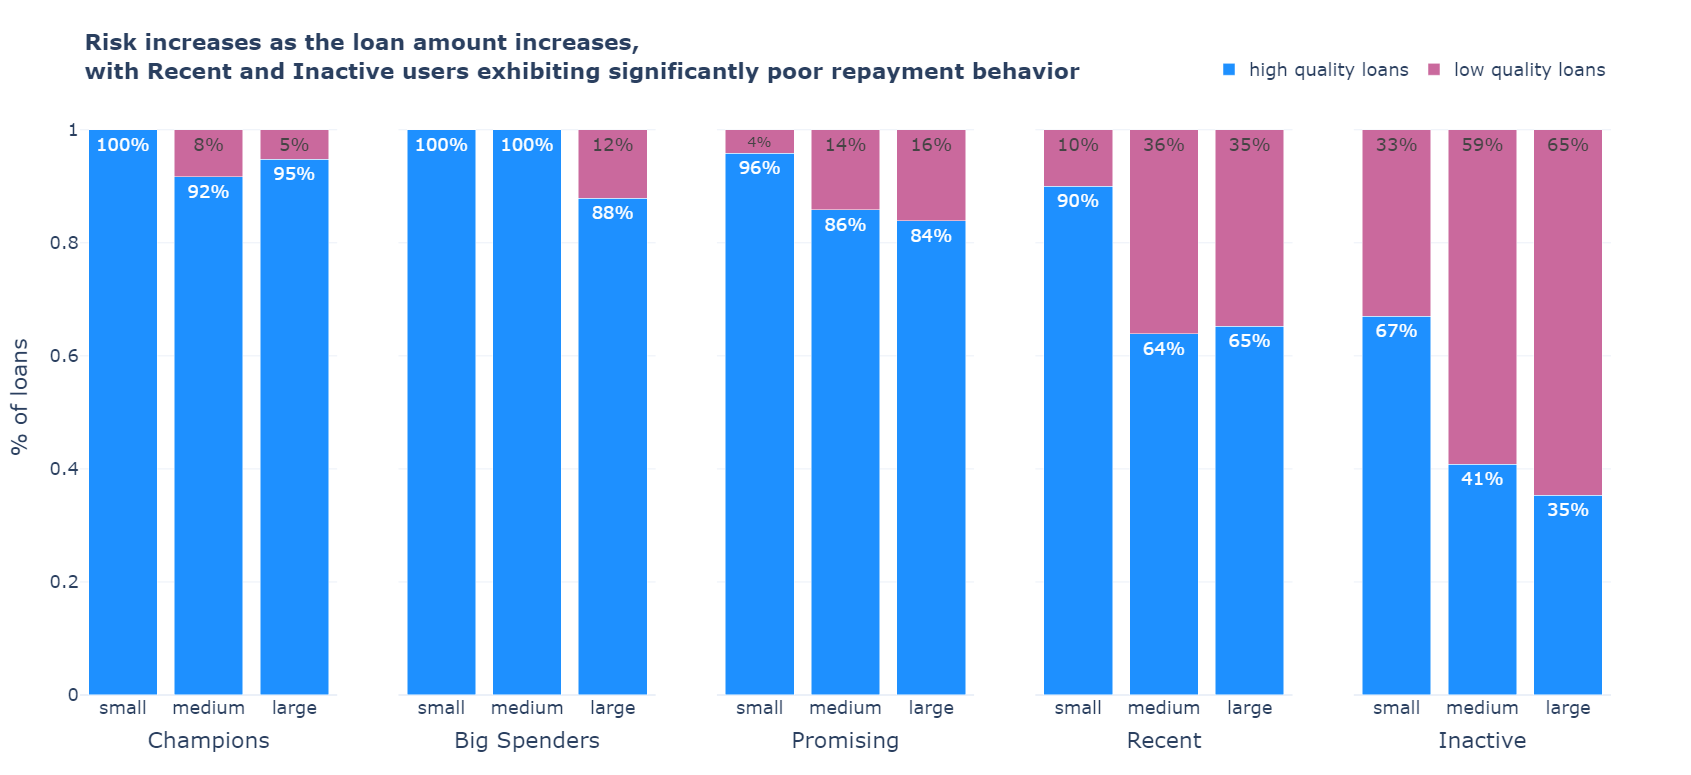

In [169]:
labels = ["small", "medium", "large"]
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[
               df_data.query(f"interest_rate_cat == '{label}' & rfm_segment_desc == '{segment}' & loan_quality == 'high'")["id"].count() \
               / df_data.query(f"interest_rate_cat == '{label}' & rfm_segment_desc == '{segment}'")["id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_blue"],
            name="high quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[
               df_data.query(f"interest_rate_cat == '{label}' & rfm_segment_desc == '{segment}' & loan_quality == 'low'")["id"].count() \
               / df_data.query(f"interest_rate_cat == '{label}' & rfm_segment_desc == '{segment}'")["id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_purple"],
            name="low quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Risk increases as the interest rate increases,<br>with Recent and Inactive users exhibiting significantly poor repayment behavior</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="% of loans",
    barmode="stack",
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0%}",
    textposition="inside"
)
fig.update_annotations(font_size=font_size)

fig.show()

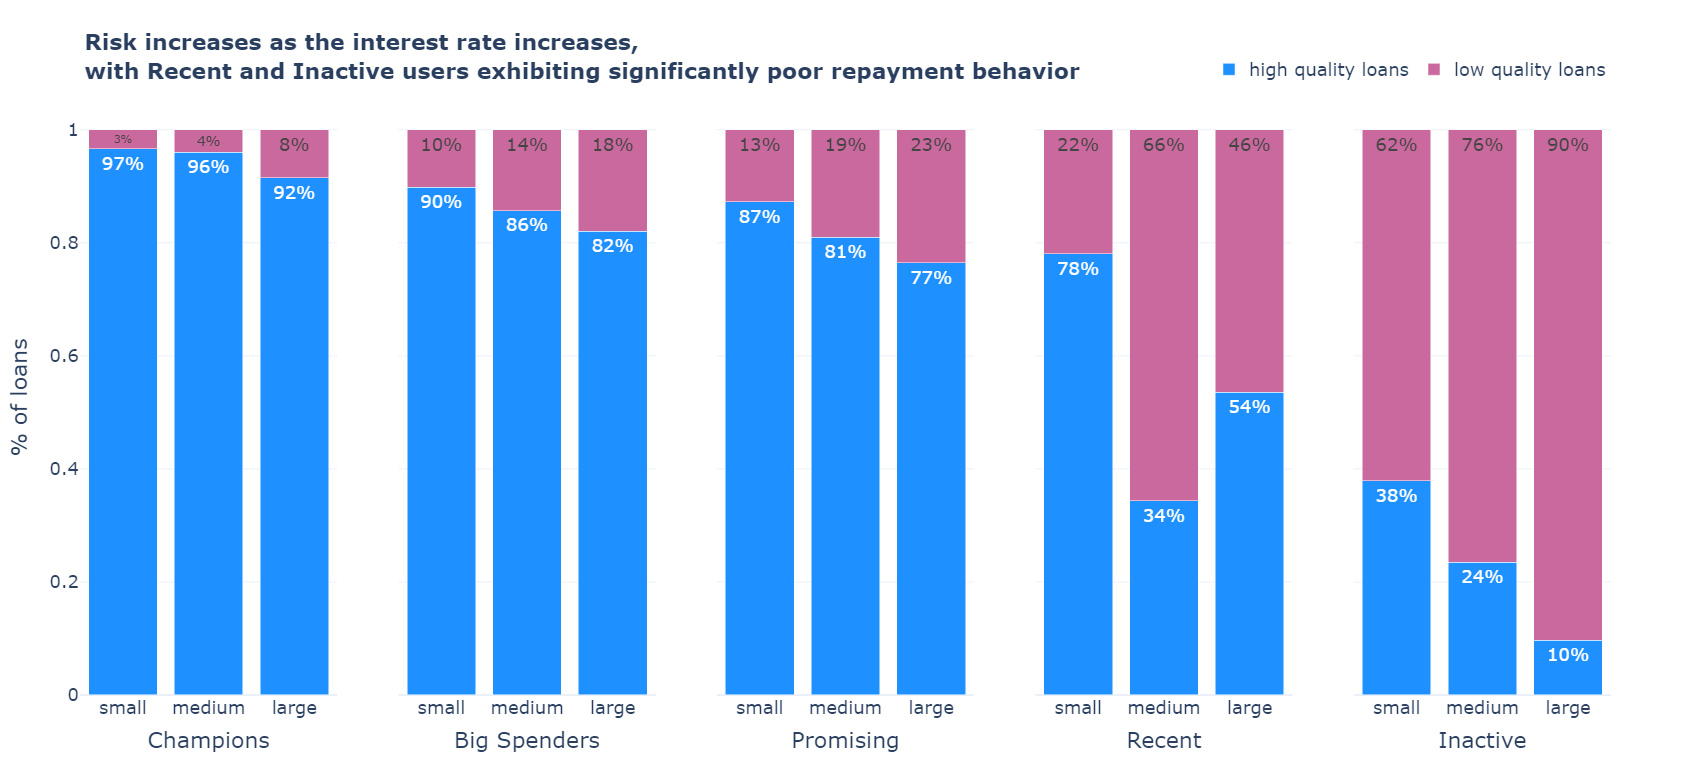

## User Debt

**Note:** Users with a great repayment debt history, particularly Recent and Inactive users, exhibit poor repayment behavior

In [277]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    shared_xaxes=True,
    vertical_spacing=0.001,
)

for i, segment in enumerate(segments):
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "high") & (df_data["user_avg_pct_debt"] > 0)]["user_avg_pct_debt"],
            showlegend=False,
            marker_color=colors["dark_blue"],
            name="high quality<br>loans"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "low") & (df_data["user_avg_pct_debt"] > 0)]["user_avg_pct_debt"], 
            showlegend=False,
            marker_color=colors["dark_purple"],
            name="low quality<br>loans"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Users with a great repayment debt history, particularly Recent and Inactive users, exhibit poor repayment behavior</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="repayment debt (%)",
    template=template,
)
fig.update_annotations(font_size=title_font_size)

fig.show()

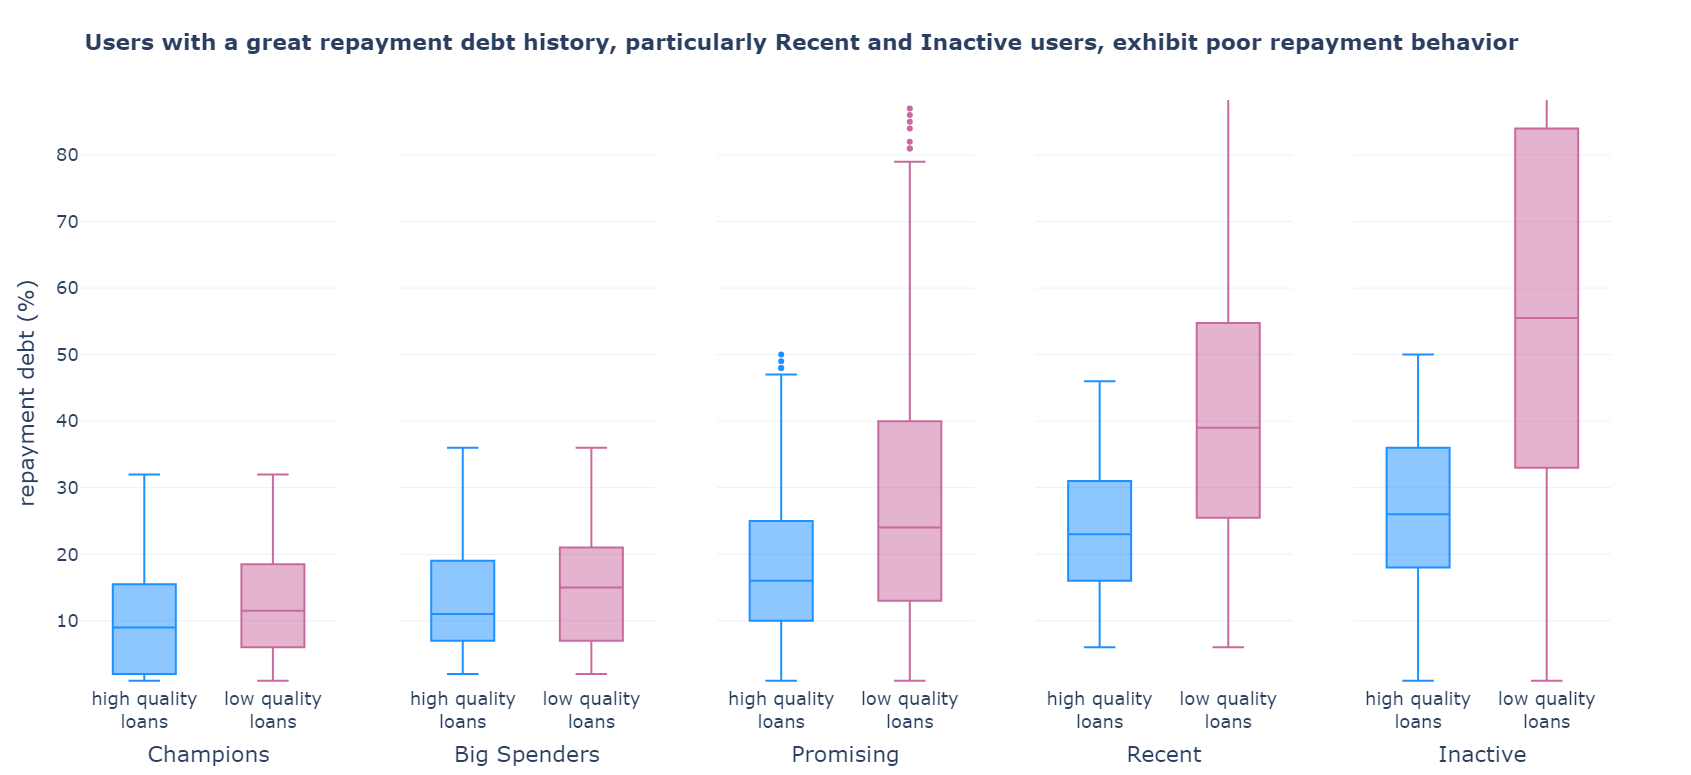

In [283]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "high") & (df_data["user_avg_pct_debt"] > 0)]["user_avg_pct_debt"].mean()],
            x=["high quality<br>loans"],
            showlegend=False,
            marker_color=colors["dark_blue"],
            name="high quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "low") & (df_data["user_avg_pct_debt"] > 0)]["user_avg_pct_debt"].mean()], 
            x=["low quality<br>loans"],
            showlegend=False,
            marker_color=colors["dark_purple"],
            name="low quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Users with a great repayment debt history, particularly Recent and Inactive users, exhibit poor repayment behavior</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="avg. repayment debt (%)",
    barmode="group",
    bargroupgap=0.1,
    showlegend=False,
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0f}%",
    textposition="inside"
)
fig.update_annotations(font_size=font_size)

fig.show()

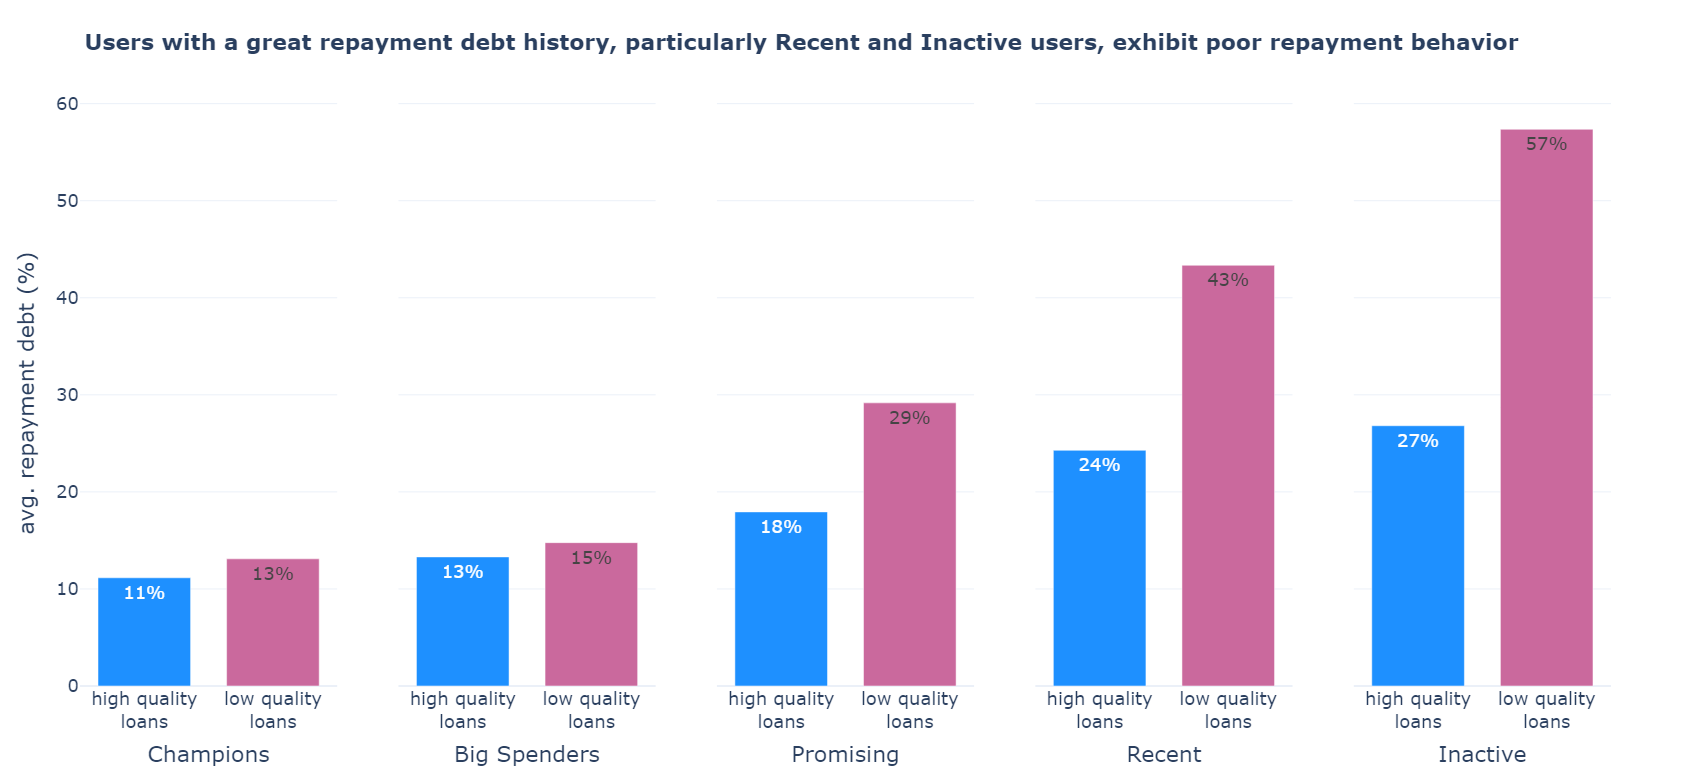

## User Default Rate

**Note:** Risk increases as the default rate increases, with Recent and Inactive users demonstrating significantly poor repayment behavior

In [287]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "high")]["user_avg_rate_default"].median()], 
            x=["high quality<br>loans"],
            marker_color=colors["dark_blue"],
            name="high quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "low")]["user_avg_rate_default"].median()], 
            x=["low quality<br>loans"],
            marker_color=colors["dark_purple"],
            name="low quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Risk increases as the default rate increases, with Recent and Inactive users<br>demonstrating significantly poor repayment behavior</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="avg. default rate (%)",
    barmode="group",
    bargroupgap=0.1,
    showlegend=False,
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0f}%",
    textposition="inside"
)
fig.update_annotations(font_size=font_size)

fig.show()

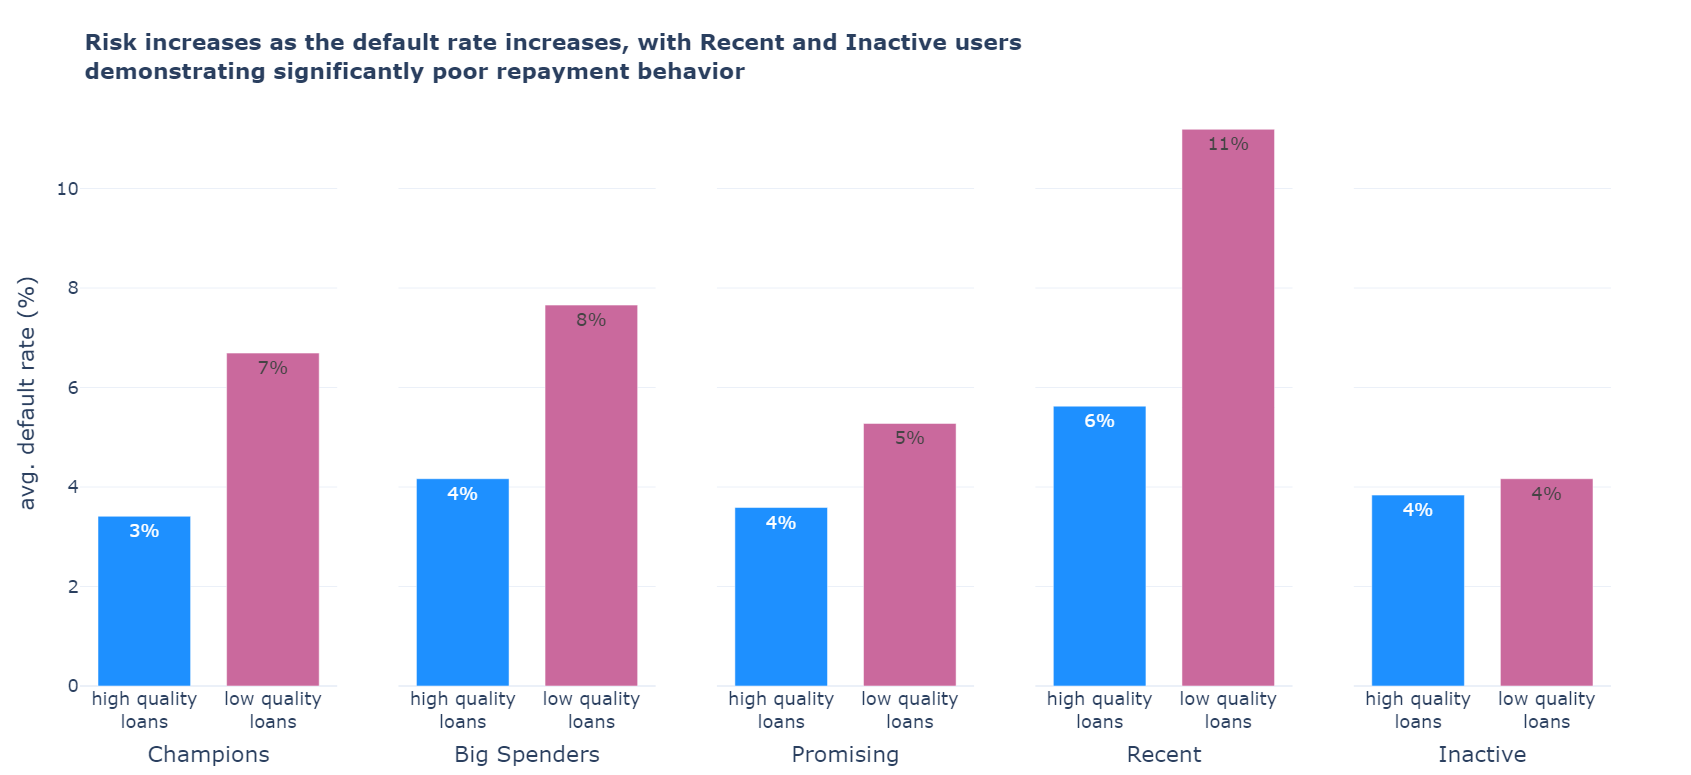

## User Overdue

**Note:** 
- Users who exceed the repayment due dates are typically associated with low-quality loans
- Recent and Inactive customers have shown a higher propensity to miss their due dates (see sample description)
- Promising, Recent and Inactive users, who have historically exhibited significant repayment delays, are often linked to low-quality loans

In [180]:
labels = ["on time", "overdue"]
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[
               df_data[(df_data["has_exceeded_due_date"] == label) & (df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "high")]["id"].count() /\
               df_data[(df_data["has_exceeded_due_date"] == label) & (df_data["rfm_segment_desc"] == segment)]["id"].count() * 100 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_blue"],
            name="high quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[
               df_data[(df_data["has_exceeded_due_date"] == label) & (df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "low")]["id"].count() /\
               df_data[(df_data["has_exceeded_due_date"] == label) & (df_data["rfm_segment_desc"] == segment)]["id"].count() * 100
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_purple"],
            name="low quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Users who exceed the repayment due dates are typically associated with low-quality loans<br><sub>Recent and Inactive customers have shown in general a higher propensity to miss their due dates</sub></b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="% of loans",
    barmode="stack",
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0f}%",
    textposition="inside"
)
fig.update_annotations(font_size=font_size)

fig.show()

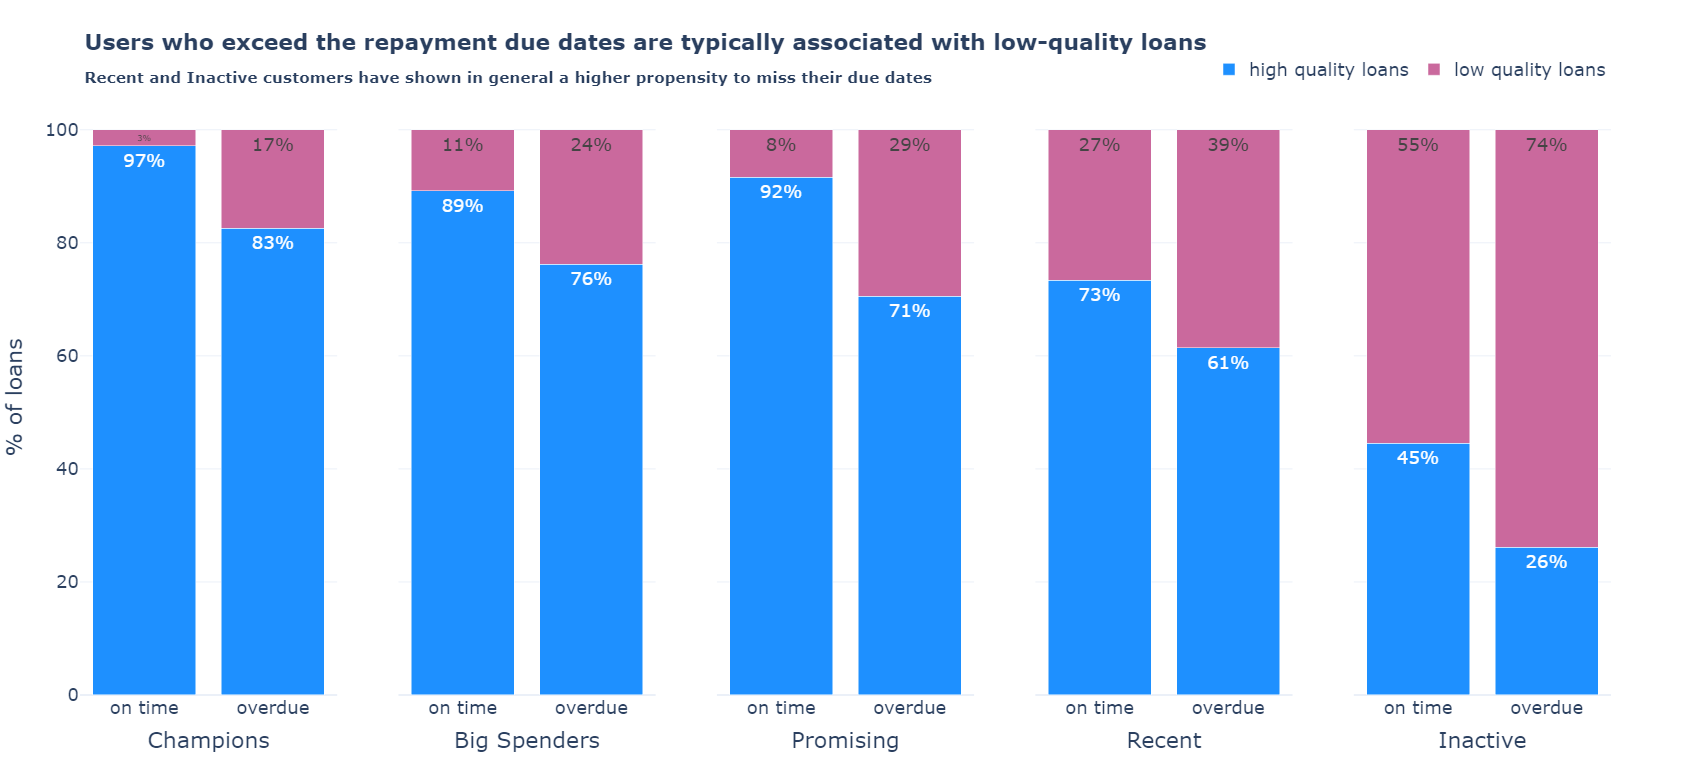

In [182]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[
                df_data.query(f"user_avg_max_repayment_delay > 0 & rfm_segment_desc == '{segment}' & loan_quality == 'high'")["user_avg_max_repayment_delay"].mean()
            ], 
            x=["high quality"],
            marker_color=colors["dark_blue"],
            name="high quality"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[
                df_data.query(f"user_avg_max_repayment_delay > 0 & rfm_segment_desc == '{segment}' & loan_quality == 'low'")["user_avg_max_repayment_delay"].mean()
            ], 
            x=["low quality"],
            marker_color=colors["dark_purple"],
            name="low quality"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Promising, Recent and Inactive users, who have historically exhibited significant repayment delays,<br>are often linked to low-quality loans</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="user avg.<br>max repayment delay (days)",
    barmode="group",
    bargroupgap=0.1,
    showlegend=False,
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0f}",
    textposition="inside"
)
fig.update_annotations(font_size=font_size)

fig.show()

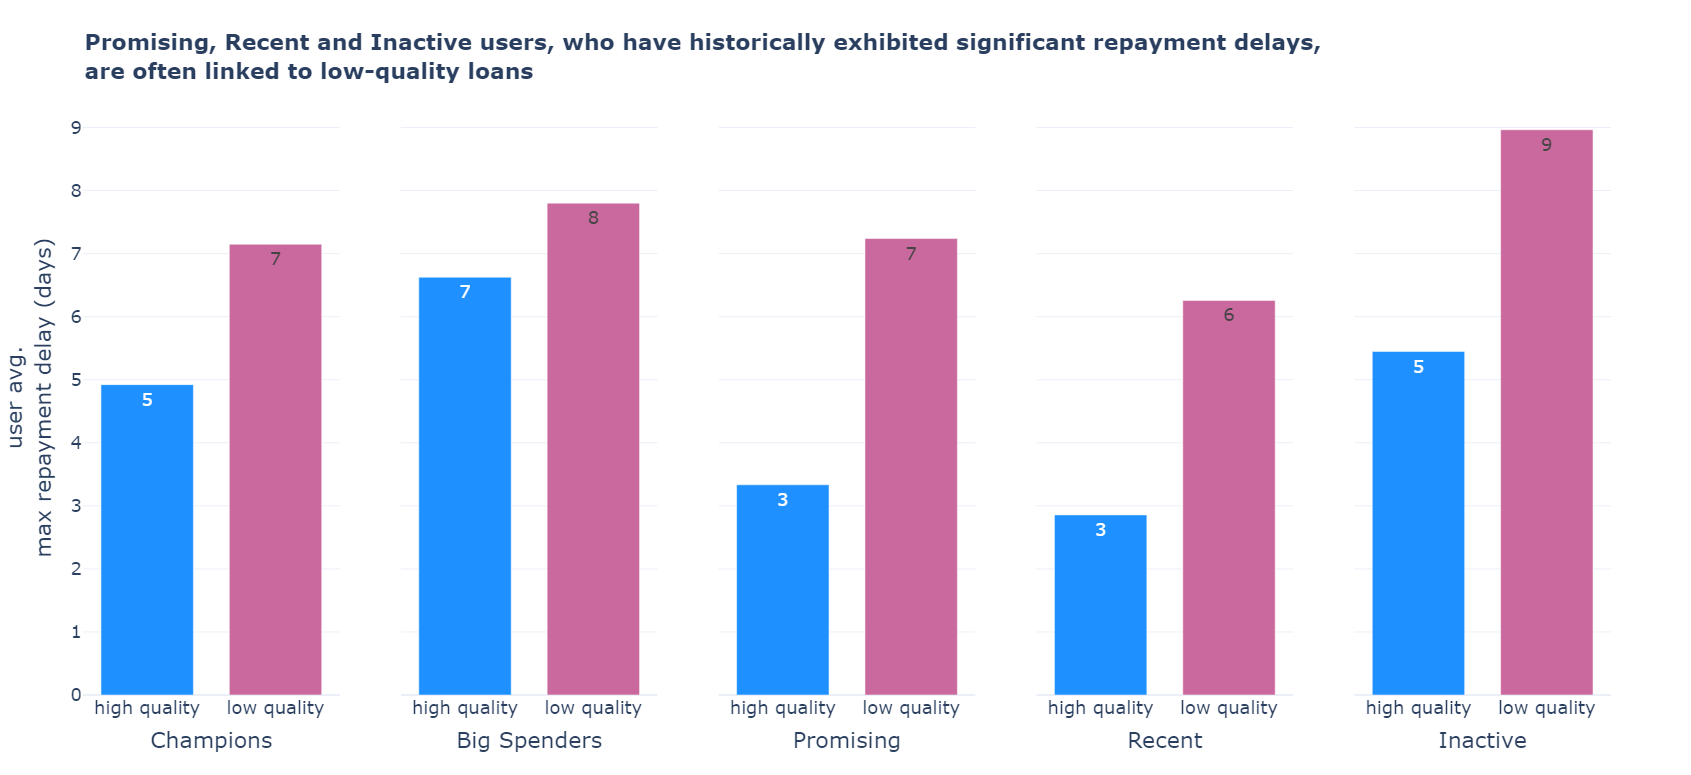

## Denied Transactions

**Note:** The repayment behavior of each user segment isn't significantly impacted by the users' transaction rejection rate

In [185]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "high")]["rate_denied"].mean()], 
            x=["high quality<br>loans"],
            marker_color=colors["dark_blue"],
            name="high quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["loan_quality"] == "low")]["rate_denied"].mean()], 
            x=["low quality<br>loans"],
            marker_color=colors["dark_purple"],
            name="low quality loans"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>The repayment behavior of each user segment<br>isn't significantly impacted by the users' transaction rejection rate</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="avg.<br>transaction rejection rate (%)",
    barmode="group",
    bargroupgap=0.1,
    showlegend=False,
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0f}%",
    textposition="inside"
)
fig.update_annotations(font_size=font_size)

fig.show()

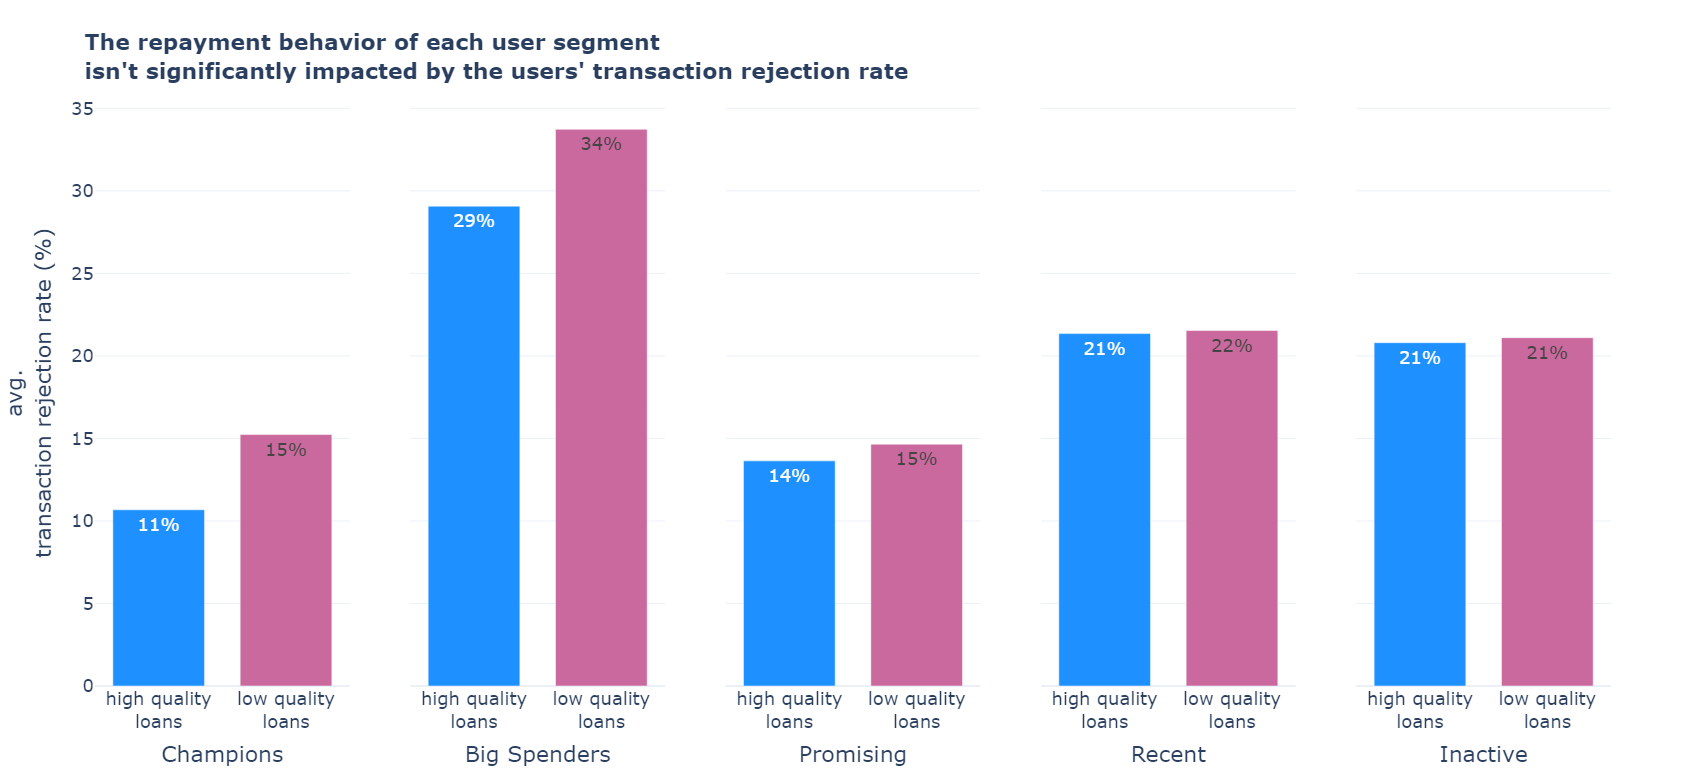

## Purchases Mode

**Note:** Users with online spending habits exhibit slightly poor repayment behavior

In [188]:
labels = ["online", "in-person"]

fig = go.Figure([
    go.Bar(
        y=[f"{label}<br>purchase<br>preference" for label in labels],
        x=[
            df_data[(df_data["preference_purchase_mode"] == label) & (df_data["loan_quality"] == "low")]["id"].count() /\
            df_data[df_data["preference_purchase_mode"] == label]["id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_purple"],
        orientation="h",
        name="low quality loans"
    ),
    go.Bar(
        y=[f"{label}<br>purchase<br>preference" for label in labels],
        x=[
            df_data[(df_data["preference_purchase_mode"] == label) & (df_data["loan_quality"] == "high")]["id"].count() /\
            df_data[df_data["preference_purchase_mode"] == label]["id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="high quality loans"
    ),

])

fig.update_layout(
    title="<b>Users with online spending habits exhibit slightly poor repayment behavior</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of loans",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

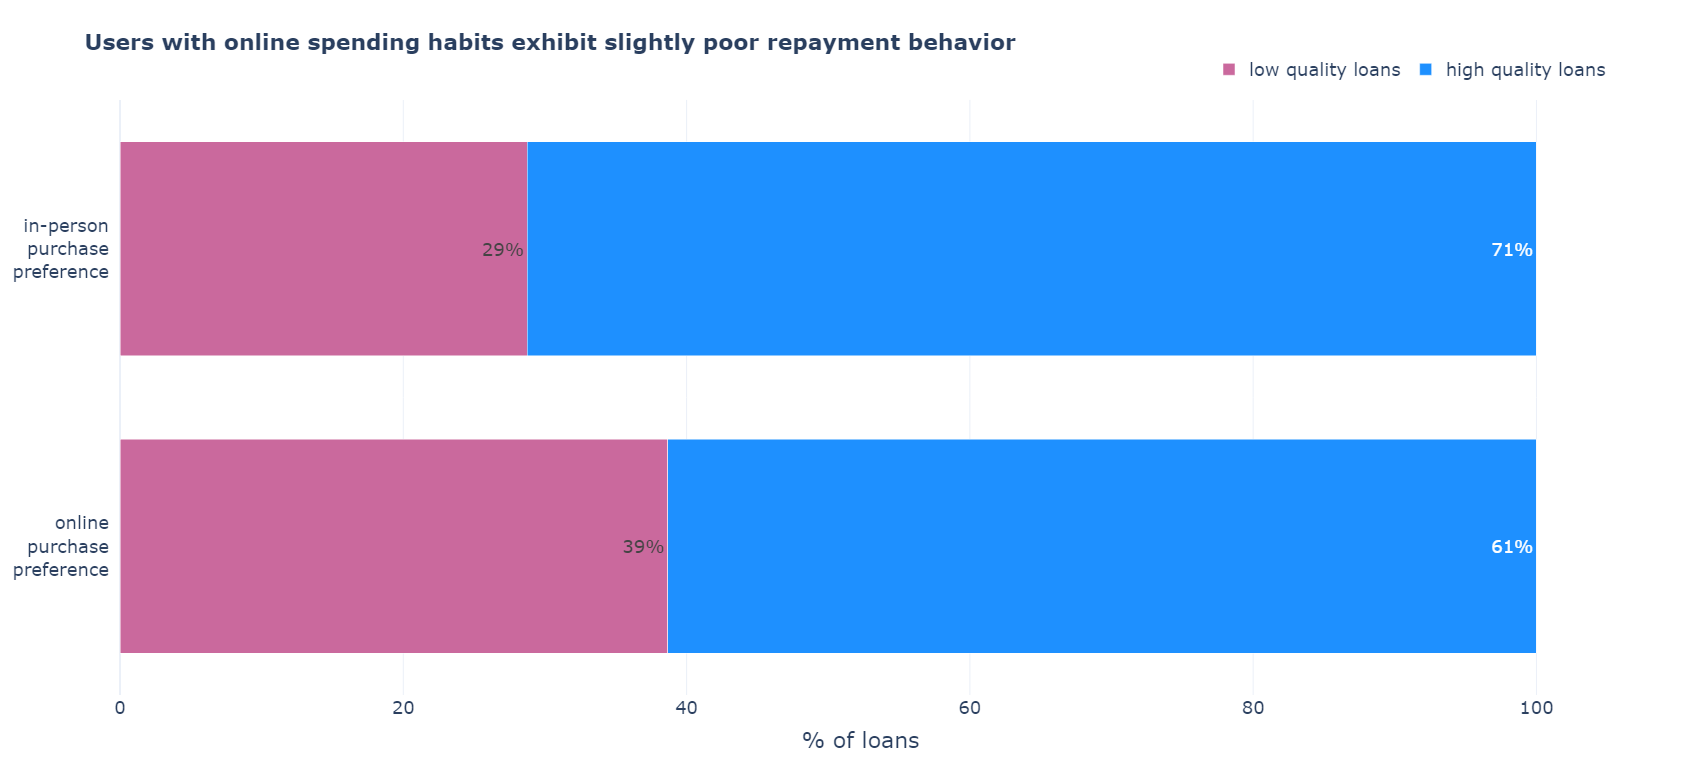

## Repayment Type Preference

**Note:** Users who prefer to make manual repayments are more likely to exhibit riskier repayment behavior 

In [191]:
labels = ["manual", "automated"]

fig = go.Figure([
    go.Bar(
        y=[f"{label}<br>repayment<br>preference" for label in labels],
        x=[
            df_data[(df_data["preference_repayment_type"] == label) & (df_data["loan_quality"] == "low")]["id"].count() /\
            df_data[df_data["preference_repayment_type"] == label]["id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_purple"],
        orientation="h",
        name="low quality loans"
    ),
    go.Bar(
        y=[f"{label}<br>repayment<br>preference" for label in labels],
        x=[
            df_data[(df_data["preference_repayment_type"] == label) & (df_data["loan_quality"] == "high")]["id"].count() /\
            df_data[df_data["preference_repayment_type"] == label]["id"].count() * 100
            for label in labels
        ],
        marker_color=colors["dark_blue"],
        orientation="h",
        name="high quality loans"
    ),

])

fig.update_layout(
    title="<b>Users who prefer to make manual repayments<br>are more likely to exhibit riskier repayment behavior</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of loans",
    yaxis_title=None,
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        title=None,
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0f}%",
    textposition="inside"
)

fig.show()

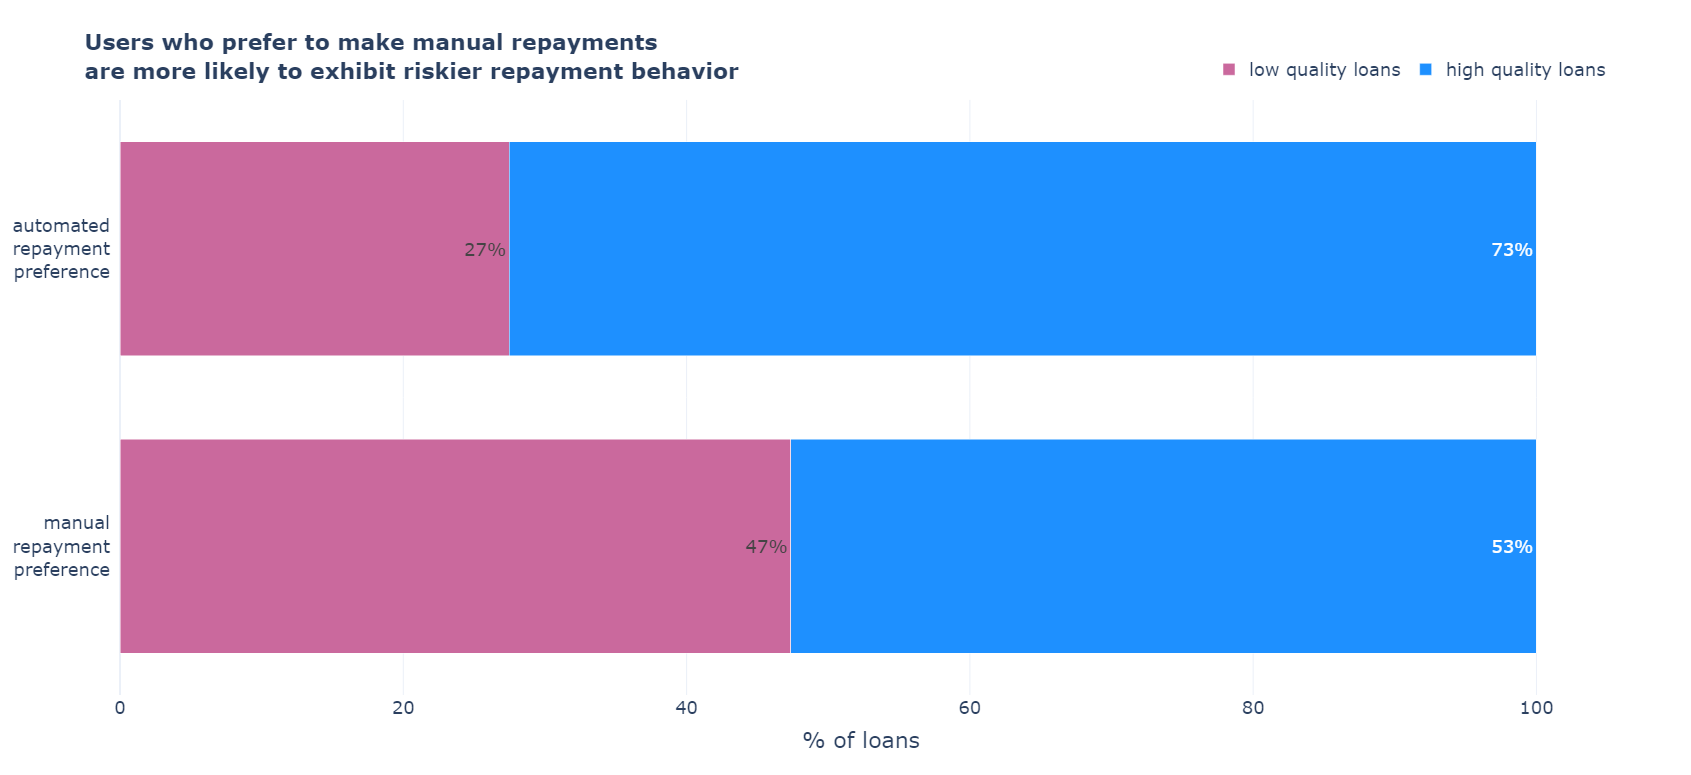